# Water Quality Analysis for AR Water Age Project

This worksheet was created by Hannah Greenwald based off a worksheet made by Lauren Kennedy. The code corresponds to analysis and figures included in the manuscript titled Responses of Drinking Water Bulk and Biofilm Microbiota to Elevated Water Age in Bench-scale Simulated Distribution Systems.

# 1. Importing libraries and data

In [109]:
# install and load stuff
#can install packages in here in the future. install.packages("packagenamehere"). then delete that line and uncomment the library for that package

# install.packages("DescTools")
# install.packages("stargazer")
# install.packages("psych")
# install.packages("Cairo")
# library(ggiraphExtra)
# install.packages("ggplot2")
library(ggplot2)
# install.packages("reshape2")
library(reshape2)
# install.packages("dplyr")
# library(plyr)
library(dplyr)
library(scales)
library(httpuv)
library(gridExtra)
# install.packages("googlesheets4")
# install.packages("googledrive")
library(googlesheets4)
library(googledrive)
library (data.table)
library(tidyr)
library(ggpubr)
library(lme4)
library(knitr)
library(IRdisplay)
# options(kableExtra.latex.load_packages = FALSE)
# library (kableExtra) #pretty tables
# library(docxtools)
# library(magick)
# library(psych)
library(Hmisc)
# library(ggcorrplot)
# install.packages("stargazer")
library(stargazer)#tables
# library(qwraps2)#easily customizable summary tables
library(DescTools) #geometric mean and stdev
# #tried these
# #library(arsenal)
# #library(huxtable)
# #library(stringr)
library("psych")                   # Load psych package

# suppressMessages(library(dplyr))

# #pca stuff
# library(FactoMineR)
# library(factoextra)
library("corrplot")

library(extrafont)
# extrafont::font_import()
# font_import()
# loadfonts()
# options(warn=-1)# turn off warnings to print
# #options(warn=0) #turn back on warnings
options(jupyter.plot_mimetypes = c("text/plain", "image/png" )) #to make conversion to pdf work properly
# #colorblind color vector for plots 
# install.packages("viridis")
library(viridis)#great color options designed to be visible to people with colorblindness
library(httr)

colors <- c("#89C5DA", "#DA5724", "#74D944", "#CE50CA", "#3F4921", "#C0717C", "#CBD588", "#5F7FC7", 
            "#673770", "#D3D93E", "#38333E", "#508578", "#D7C1B1", "#689030", "#AD6F3B", "#CD9BCD", 
            "#D14285", "#6DDE88", "#652926", "#7FDCC0", "#C84248", "#8569D5", "#5E738F", "#D1A33D", 
            "#8A7C64", "#599861")

blue<- c("#89C5DA","#5F7FC7","#508578","#5E738F","#7FDCC0")
pinks<- c("#8569D5","#CE50CA","#C0717C","#673770","#D14285")
brown<- c("#DA5724", "#AD6F3B", "#652926","#C84248","#D1A33D")
green<- c("#74D944","#3F4921","#CBD588","#689030","#599861")

blue_s<- c("#29453E","#7DD1BC","#508577","#579183", "#406B60")
pink_s<- c("#E97CFC","#AE5CBD","#683770","#733D7D","#502A57")
green_s<- c("#35593A", "#87E694","#5A9963","#62A66B","#4B8052")
brown_s<- c("#F2645C", "#B34944","#662A27","#732F2C","#4D1F1D")
grey_s<- c("#4A4235", "#D6C09A","#8A7C63","#96876C","#706551")

# install.packages("DescTools")
# install.packages('extrafont')
# font_import()
# loadfonts()
# fonts()
# install.packages("httr")
# install.packages("data.table")
# install.packages("psych")          # Install psych package

# set plot conventions for all of jupyter
library(extrafont)
# extrafont::font_import()
# loadfonts(device = "postscript")
# theme_set(theme_classic(base_size=16, base_family="Arial"))
theme_set(theme_classic(base_size=16))

sessionInfo()

R version 4.1.3 (2022-03-10)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Big Sur/Monterey 10.16

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.1/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.1/Resources/lib/libRlapack.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] psych_2.2.5         httr_1.4.4          viridis_0.6.2      
 [4] viridisLite_0.4.1   extrafont_0.18      corrplot_0.92      
 [7] DescTools_0.99.45   stargazer_5.2.3     Hmisc_4.6-0        
[10] Formula_1.2-4       survival_3.3-1      lattice_0.20-45    
[13] IRdisplay_1.1       knitr_1.40          lme4_1.1-29        
[16] Matrix_1.4-0        ggpubr_0.4.0        tidyr_1.2.0        
[19] data.table_1.14.2   googledrive_2.0.0   googlesheets4_1.0.0
[22] gridExtra_2.3       httpuv_1.6

In [110]:
# set location to save plots (change this for your own folder structure)
fig_dir <- '/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/DPR_AR_Research/AR_figures/'

# 2. Data Import and Functions

In [111]:
#google drive authorize AND googlesheets4 authorize-- must create a project under google API and then download credentials
#see authentication section in the following article
#https://medium.com/@bretcameron/how-to-use-the-google-drive-api-with-javascript-57a6cc9e5262
drive_auth(path="/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/DPR_AR_Research/AR-Water-Quality-Data/access-to-jupyter-21919fd4c701.json", cache=TRUE)
gs4_auth(path="/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/DPR_AR_Research/AR-Water-Quality-Data/access-to-jupyter-21919fd4c701.json")


In [112]:
#Important dates
ar6_start_date= as.Date("8/27/2019", "%m/%d/%y")
ars_start_date= as.Date("9/30/2019", "%m/%d/%y")

#Berkeley campus shuts down
close_date = as.Date("3/10/2020", "%m/%d/%y")
#after day 162

#Bay Area wide shelter in place begins
shelter_date = as.Date("3/17/2020", "%m/%d/%y")

#date that AR 2,3,5 switched from 50 rpm to 25 rpm (ARs 1 and 4 stayed at 50)
fullstag_date = as.Date("10/21/2020", "%m/%d/%y")

#experiment end date 
ars_end_date= as.Date("10/20/2029", "%m/%d/%y")

ar6_start_date
ars_start_date
fullstag_date

[1] "2020-08-27"

[1] "2020-09-30"

[1] "2020-10-21"

### Upload data from Google Sheets


In [113]:
# set up google drive variables- must use project email address 
# open json credentials and find client_email(mine: hannah.greenwald@access-via-jupiter-notebook.iam.gserviceaccount.com) give that address permission on the spreadsheet you want to use
# drive_find(n_max=30)#uncomment to see what you have permission to access currently

master_sampling <- drive_get("AR MasterDataSheet") 

#read in data sheet
arbf <- master_sampling %>% read_sheet(sheet= "ARBF_data")
arbf <-as.data.frame(arbf)
# arbf <- arbf[c("sample_date","replicate","type", "day", "sampling_week", "sample_id","sample_id_old", "sampling_event", "AR", "extr_date", "extr_notes", "qubit_clean", "sterivex_filtered_vol", "shear_rpm", "FCM_vol", "type", "pH", "temp", "cl_total", "cl_free", "TCC1", "TCC2", "TCC3", "ICC1", "ICC2", "ICC3", "FCM_dilution", "ATPt_avg_nM", "ATPe_avg_nM", "ATPi_avg_nM", "flow_rate_mL.min")]
arbf <- nulltoNA(arbf) #make null values into NA

#read in water use data
water_use <- master_sampling %>% read_sheet(sheet= "water_use")

#read in qPCR data
qpcr <- master_sampling %>% read_sheet(sheet= "AR_qPCR")

# str(arbf)
head(arbf, n=3)
#head(arbf, n=3)
# str(ATP_cal)



✔ The input `path` resolved to exactly 1 file.

✔ Reading from AR MasterDataSheet.

✔ Range ''ARBF_data''.

✔ Reading from AR MasterDataSheet.

✔ Range ''water_use''.

✔ Reading from AR MasterDataSheet.

✔ Range ''AR_qPCR''.



sample_id ARBF type day sample_id_old month_date sample_date sampling_week
1 AR5_3     AR   AR   3   AR_5_3        2019-10-01 2019-10-03  1            
2 AR2_4     AR   AR   4   AR_2_4        2019-10-01 2019-10-04  1            
3 AR3_4     AR   AR   4   AR_3_4        2019-10-01 2019-10-04  1            
  AR_num AR  ⋯ ATPe_avg_RLU bf_ATPe_avg_nmol.cm2 bf_ATPi_avg_nmol.cm2
1 5      AR5 ⋯ NA           NA                   NA                  
2 2      AR2 ⋯ NA           NA                   NA                  
3 3      AR3 ⋯ NA           NA                   NA                  
  ATPe_avg_nM ATPi_avg_nM flow_rate_mL.min residence_time_h length.cm 8/27/2019
1 NA          NA            NA                NA            NA        NA       
2 NA          NA          1.32             12.63            NA        NA       
3 NA          NA          0.91             18.32            NA        NA       
  9/30/2019
1 NA       
2 NA       
3 NA

In [114]:
#read in csv from biofilm CLSM quantitative image analysis
df_clsm1 <- read.csv(file= "/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/DPR_AR_Research/CLSM_Analysis/analyzed_clsm_outputs/analyzed_biofilm_clsm1.csv", header= TRUE)
df_clsm2 <- read.csv(file= "/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/DPR_AR_Research/CLSM_Analysis/analyzed_clsm_outputs/analyzed_biofilm_clsm2.csv", header= TRUE)
df_clsm3 <- read.csv(file= "/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/DPR_AR_Research/CLSM_Analysis/analyzed_clsm_outputs/analyzed_biofilm_clsm3.csv", header= TRUE)
df_clsm4 <- read.csv(file= "/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/DPR_AR_Research/CLSM_Analysis/analyzed_clsm_outputs/analyzed_biofilm_clsm4.csv", header= TRUE)
df_clsm5 <- read.csv(file= "/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/DPR_AR_Research/CLSM_Analysis/analyzed_clsm_outputs/analyzed_biofilm_clsm5.csv", header= TRUE)
df_clsm6 <- read.csv(file= "/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/DPR_AR_Research/CLSM_Analysis/analyzed_clsm_outputs/analyzed_biofilm_clsm6.csv", header= TRUE)
df_clsm7 <- read.csv(file= "/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/DPR_AR_Research/CLSM_Analysis/analyzed_clsm_outputs/analyzed_biofilm_clsm7.csv", header= TRUE)
df_clsm8a <- read.csv(file= "/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/DPR_AR_Research/CLSM_Analysis/analyzed_clsm_outputs/analyzed_biofilm_clsm8a.csv", header= TRUE)
df_clsm8b <- read.csv(file= "/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/DPR_AR_Research/CLSM_Analysis/analyzed_clsm_outputs/analyzed_biofilm_clsm8b.csv", header= TRUE)
df_clsm9 <- read.csv(file= "/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/DPR_AR_Research/CLSM_Analysis/analyzed_clsm_outputs/analyzed_biofilm_clsm9.csv", header= TRUE)
df_clsm10 <- read.csv(file= "/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/DPR_AR_Research/CLSM_Analysis/analyzed_clsm_outputs/analyzed_biofilm_clsm10.csv", header= TRUE)
df_clsm11 <- read.csv(file= "/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/DPR_AR_Research/CLSM_Analysis/analyzed_clsm_outputs/analyzed_biofilm_clsm11.csv", header= TRUE)
df_clsm12 <- read.csv(file= "/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/DPR_AR_Research/CLSM_Analysis/analyzed_clsm_outputs/analyzed_biofilm_clsm12.csv", header= TRUE)
df_clsm13 <- read.csv(file= "/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/DPR_AR_Research/CLSM_Analysis/analyzed_clsm_outputs/analyzed_biofilm_clsm13.csv", header= TRUE)
df_clsm13 <- df_clsm13 %>% dplyr::select(-round2)
# df_clsm197 <- read.csv(file= "/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/DPR_AR_Research/CLSM_Analysis/analyzed_clsm_outputs/analyzed_biofilm_clsm197.csv", header= TRUE)

df_clsm <- rbind(df_clsm1, df_clsm2, df_clsm3, df_clsm4, df_clsm5, df_clsm6, df_clsm7, df_clsm8a, df_clsm8b, df_clsm9, df_clsm10, df_clsm11, df_clsm12, df_clsm13)
df_clsm$date <- (as.character(df_clsm$date))
df_clsm$day[df_clsm$date == '22120'] <- 141
df_clsm$day[df_clsm$date == '100520'] <- 372
df_clsm$day[df_clsm$date == '101920'] <- 386
df_clsm$day[df_clsm$date == '102020'] <- 387
df_clsm$day[df_clsm$date == '112119'] <- 49
df_clsm$day[df_clsm$date == '121919'] <- 77
df_clsm$day[df_clsm$date == '42220'] <- 203
df_clsm$day[df_clsm$date == '10420'] <- 105 #these files are actually from 1/14/20 (typo in file names)
# as.Date(as.character(df_clsm$date), format= '%m%d%y')
# df_clsm
#missing the one image file that wasn't working in python


### Functions 

In [115]:
#Calculate gmean and gstd of triplicates
geo_m <- function(a,b,c,d){
    x<- c(a,b,c)
    if(is.na(d)){
    return(Gmean(x, na.rm=TRUE))   
    }
    else{
    x<-x*d  
    return(Gmean(x, na.rm=TRUE))
    }
    
}

geo_s <- function(a,b,c,d){
    x<- c(a,b,c)
    if(is.na(d)){
    return(Gsd(x, na.rm=TRUE))   
    }
    else{
    x<-x*d  
    return(Gsd(x, na.rm=TRUE))
    }
    
}

#geom_pointrange(aes(ymin=HPC_gmean_MPN_per_100mL/HPC_gstd_MPN_per_100mL,
                  #  ymax=HPC_gmean_MPN_per_100mL*HPC_gstd_MPN_per_100mL))+

In [116]:
#function to be used throughout

nulltoNA <- function(x) {
    x[sapply(x, is.null)] <- NA
    return(x)
}

# 3. Data Prep
Prepare data calculations for bulk water, biofilm, and calibration

In [117]:
## Make a table of what's been extracted 

extracted_bulk <- arbf %>% filter(ARBF == "AR" ) %>% filter(!is.na(extr_date)) %>% select(sample_date, sample_id, extr_date, extr_notes, qubit_clean, sterivex_filtered_vol)
length(extracted_bulk$sample_id)

extracted_bf <- arbf %>% filter(ARBF == "BF") %>%  filter(!is.na(extr_date)) %>% select(sample_date, sample_id, extr_date, extr_notes, qubit_clean)
length(extracted_bf$sample_id)

[1] 30

[1] 26

In [118]:
## Prepare Bulk FCM Data

#convert cells/sample --> cells/mL
arbf$TCC1_cells.mL <- arbf$TCC1/arbf$FCM_vol*1000*arbf$FCM_dilution
arbf$TCC2_cells.mL <- arbf$TCC2/arbf$FCM_vol*1000*arbf$FCM_dilution
arbf$TCC3_cells.mL <- arbf$TCC3/arbf$FCM_vol*1000*arbf$FCM_dilution

arbf$ICC1_cells.mL <- arbf$ICC1/arbf$FCM_vol*1000*arbf$FCM_dilution
arbf$ICC2_cells.mL <- arbf$ICC2/arbf$FCM_vol*1000*arbf$FCM_dilution
arbf$ICC3_cells.mL <- arbf$ICC3/arbf$FCM_vol*1000*arbf$FCM_dilution

#Find Geometric mean and std dev of FCM data
arbf$TCC_gmean<-mapply(geo_m, arbf$TCC1_cells.mL, arbf$TCC2_cells.mL, arbf$TCC3_cells.mL, NA)
arbf$TCC_gstdv<-mapply(geo_s,arbf$TCC1_cells.mL,arbf$TCC2_cells.mL,arbf$TCC3_cells.mL, NA)

arbf$ICC_gmean<-mapply(geo_m,arbf$ICC1_cells.mL,arbf$ICC2_cells.mL,arbf$ICC3_cells.mL, NA)
arbf$ICC_gstdv<-mapply(geo_s,arbf$ICC1_cells.mL,arbf$ICC2_cells.mL,arbf$ICC3_cells.mL, NA)


In [119]:
## Prepare Biofilm FCM Data

#convert cells/70 mL homogenized biofilm sample --> cells/cm2
#NEED TO ACCOUNT FOR WIDTH OF SLIDES UNLESS IT IS 1 CM

arbf$TCC1_cells.cm2 <- arbf$bf_TCC1/arbf$length.cm*20*arbf$bf_total_homog_vol*arbf$bf_fcm_dilution
arbf$TCC2_cells.cm2 <- arbf$bf_TCC2/arbf$length.cm*20*arbf$bf_total_homog_vol*arbf$bf_fcm_dilution
arbf$TCC3_cells.cm2 <- arbf$bf_TCC3/arbf$length.cm*20*arbf$bf_total_homog_vol*arbf$bf_fcm_dilution

arbf$ICC1_cells.cm2 <- arbf$bf_ICC1/arbf$length.cm*20*arbf$bf_total_homog_vol*arbf$bf_fcm_dilution
arbf$ICC2_cells.cm2 <- arbf$bf_ICC2/arbf$length.cm*20*arbf$bf_total_homog_vol*arbf$bf_fcm_dilution
arbf$ICC3_cells.cm2 <- arbf$bf_ICC3/arbf$length.cm*20*arbf$bf_total_homog_vol*arbf$bf_fcm_dilution

#Find Geometric mean and std dev of FCM data
arbf$bf_TCC_gmean<-mapply(geo_m,arbf$TCC1_cells.cm2,arbf$TCC2_cells.cm2,arbf$TCC3_cells.cm2, NA)
arbf$bf_TCC_gstdv<-mapply(geo_s,arbf$TCC1_cells.cm2,arbf$TCC2_cells.cm2,arbf$TCC3_cells.cm2, NA)

arbf$bf_ICC_gmean<-mapply(geo_m,arbf$ICC1_cells.cm2,arbf$ICC2_cells.cm2,arbf$ICC3_cells.cm2, NA)
arbf$bf_ICC_gstdv<-mapply(geo_s,arbf$ICC1_cells.cm2,arbf$ICC2_cells.cm2,arbf$ICC3_cells.cm2, NA)


In [120]:
#merge main df with water use

arbf_wateruse <- merge(arbf, water_use, by= "month_date", all=T)
head(arbf_wateruse)


month_date sample_id ARBF type day sample_id_old sample_date sampling_week
1 2018-07-01 NA        NA   NA   NA  NA            <NA>        NA           
2 2018-08-01 NA        NA   NA   NA  NA            <NA>        NA           
3 2018-09-01 NA        NA   NA   NA  NA            <NA>        NA           
4 2018-10-01 NA        NA   NA   NA  NA            <NA>        NA           
5 2018-11-01 NA        NA   NA   NA  NA            <NA>        NA           
6 2018-12-01 NA        NA   NA   NA  NA            <NA>        NA           
  AR_num AR ⋯ ICC3_cells.cm2 bf_TCC_gmean bf_TCC_gstdv bf_ICC_gmean
1 NA     NA ⋯ NA             NA           NA           NA          
2 NA     NA ⋯ NA             NA           NA           NA          
3 NA     NA ⋯ NA             NA           NA           NA          
4 NA     NA ⋯ NA             NA           NA           NA          
5 NA     NA ⋯ NA             NA           NA           NA          
6 NA     NA ⋯ NA             NA           NA           NA          
  bf_ICC_gstdv year month water_use_CF water_use_rel_prior_year water_use_gal
1 NA           2018 JUL   2891         NA                       21626.18     
2 NA           2018 AUG   3007         NA                       22493.92     
3 NA           2018 SEP   5794         NA                       43342.13     
4 NA           2018 OCT   5381         NA                       40252.68     
5 NA           2018 NOV   3442         NA                       25747.95     
6 NA           2018 DEC   2209         NA                       16524.47

In [121]:
# merge df_clsm with main df
height_df <- df_clsm %>% group_by(file_name) %>% dplyr::summarise(height_max = max(ch1_height_0, ch2_height_0, ch3_height_0))
df_clsm <- merge(df_clsm, height_df, by= "file_name", all= T)

arbf_clsm <- merge(arbf, df_clsm, by.x= c("day", 'AR_num', 'replicate'),by.y= c('day', 'AR', 'replicate') , all.y=T)
select_cols= c('EPS_vol', 'total_vol', 'ch2_vol', 'ch1_vol','ch3_vol','ch2v1_vol', 'ch2v3_vol', 'ch1_height_0','ch2_height_0','ch3_height_0', 'height_max',
               'ch1_spread', 'ch2_spread','ch3_spread','ch3_area_max','ch2_area_max','ch1_area_max',
              'ch1_height','ch2_height','ch3_height', 'stack_count_total', 'bf_ICC_gmean', 'ICC_gmean',
              'ATPt_avg_nM', 'ATPi_avg_nM', 'bf_ATPt_avg_nmol.cm2', 'bf_ATPi_avg_nmol.cm2', 'cl_total', 'EPS_frac', 'total_area_max', 'max_frac_area')
arbf_clsm <- arbf_clsm %>% dplyr::mutate(EPS_frac = EPS_vol/total_vol) %>% dplyr::mutate(max_frac_area = total_area_max/(212.5*212.5))
arbf_clsm_long <-  pivot_longer(arbf_clsm,
                        cols = all_of(select_cols), names_to = 'assay', values_to = 'value')
head(arbf_clsm_long)

day AR_num replicate sample_id ARBF type sample_id_old month_date sample_date
1 49  1      A         BF1_49    BF   BF   bf_1_11       2019-11-01 2019-11-21 
2 49  1      A         BF1_49    BF   BF   bf_1_11       2019-11-01 2019-11-21 
3 49  1      A         BF1_49    BF   BF   bf_1_11       2019-11-01 2019-11-21 
4 49  1      A         BF1_49    BF   BF   bf_1_11       2019-11-01 2019-11-21 
5 49  1      A         BF1_49    BF   BF   bf_1_11       2019-11-01 2019-11-21 
6 49  1      A         BF1_49    BF   BF   bf_1_11       2019-11-01 2019-11-21 
  sampling_week ⋯ ICC3_cells.cm2 bf_TCC_gmean bf_TCC_gstdv bf_ICC_gstdv
1 8             ⋯ 68460          247255.8     1.019527     1.035529    
2 8             ⋯ 68460          247255.8     1.019527     1.035529    
3 8             ⋯ 68460          247255.8     1.019527     1.035529    
4 8             ⋯ 68460          247255.8     1.019527     1.035529    
5 8             ⋯ 68460          247255.8     1.019527     1.035529    
6 8             ⋯ 68460          247255.8     1.019527     1.035529    
  file_name                         date   control_or_sample micr_replicate
1 19_1121_AR1_conA_Syto_sypro_1.czi 112119 sample            1             
2 19_1121_AR1_conA_Syto_sypro_1.czi 112119 sample            1             
3 19_1121_AR1_conA_Syto_sypro_1.czi 112119 sample            1             
4 19_1121_AR1_conA_Syto_sypro_1.czi 112119 sample            1             
5 19_1121_AR1_conA_Syto_sypro_1.czi 112119 sample            1             
6 19_1121_AR1_conA_Syto_sypro_1.czi 112119 sample            1             
  assay     value     
1 EPS_vol   13413.1257
2 total_vol 13657.6451
3 ch2_vol    1445.4120
4 ch1_vol    6836.9833
5 ch3_vol    7522.2233
6 ch2v1_vol   142.6722

In [122]:
#save csv
df <- apply(arbf,2,as.character)
write.csv(df, "/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/AR_metagenomics/arbf_polished.csv", row.names=FALSE)


# 4. qPCR processing

In [123]:
#clean qPCR data
qPCR_data<- qpcr %>%
    filter(Task == "Unknown") %>%
    filter(study == "AR") %>%
    mutate(Quantity = as.numeric(Quantity))%>% 
    mutate(template_vol = as.numeric(template_vol))%>% 
    mutate(elution_vol = as.numeric(elution_vol))


In [124]:
#LoD and LoQ as defined by MIQE / EMMI
amoA_LoD <- 9
amoA_LoQ <- 9
mip_LoD <- 4.1
mip_LoQ <- 4.4
Ps_LoD <- 9
Ps_LoQ <- 53
MAC_LoD <- 4.3
MAC_LoQ <- 5.7

In [125]:
nulltoNA <- function(x) {
  x[sapply(x, is.null)] <- NA
  return(x)
}

qPCR_data$Quantity <- nulltoNA(qPCR_data$Quantity)

In [126]:
#find gmean of qPCR replicates and create a new column for # pos wells 
qPCR_clean <- qPCR_data %>%
  mutate(pos_well = ifelse(Cq=="Undetermined",0,1)) %>% #column for undetermined wells
  group_by(sample_id_old, Target) %>%
  mutate(posreps=sum(pos_well))  %>%
  mutate(quantity_gmean= exp(mean(log(Quantity),na.rm=TRUE))) %>% 
  dplyr::summarise(avg_gc=mean(quantity_gmean), n=n(), sd=sd(Quantity), template_vol= mean(template_vol), elution_vol= mean(elution_vol), posreps= mean(posreps)) %>%
    ungroup() 

`summarise()` has grouped output by 'sample_id_old'. You can override using the
`.groups` argument.


In [127]:
#create column to describe if has 1 pos rep, 2, 3, >LoD, or >LoQ
qPCR_clean["positivity"]<- 5

#positivity for all assays is 0 reps or 1 rep if 1 or 0 technical reps amplified, respectively
qPCR_clean$positivity[qPCR_clean$posreps == 0] <- "0 reps"
qPCR_clean$positivity[qPCR_clean$posreps == 1] <- "<LoD"

#if 2 or more reps amplified, then can either be > or < LoD depending on gmean and assay LoD
qPCR_clean$positivity[qPCR_clean$Target== "AmoA" & qPCR_clean$posreps >=2 & qPCR_clean$avg_gc<amoA_LoD ] <- "<LoD" 
qPCR_clean$positivity[qPCR_clean$Target== "mip" & qPCR_clean$posreps >=2 & qPCR_clean$avg_gc<mip_LoD ] <- "<LoD" 
qPCR_clean$positivity[qPCR_clean$Target== "Ps" & qPCR_clean$posreps >=2 & qPCR_clean$avg_gc<Ps_LoD ] <- "<LoD" 
qPCR_clean$positivity[qPCR_clean$Target== "MAC" & qPCR_clean$posreps >=2 & qPCR_clean$avg_gc<MAC_LoD ] <- "<LoD" 

#if 2 or more reps amplified and it's greater than the LoD, then can either be > or < LoQ depending on gmean and assay LoQ
qPCR_clean$positivity[qPCR_clean$Target== "AmoA" & qPCR_clean$posreps >=2 & qPCR_clean$avg_gc>=amoA_LoD & qPCR_clean$avg_gc<amoA_LoQ ] <- "<LoQ" 
qPCR_clean$positivity[qPCR_clean$Target== "AmoA" & qPCR_clean$posreps >=2 & qPCR_clean$avg_gc>=amoA_LoQ ] <- "quantifiable" 

qPCR_clean$positivity[qPCR_clean$Target== "mip" & qPCR_clean$posreps >=2 & qPCR_clean$avg_gc>=mip_LoD & qPCR_clean$avg_gc<mip_LoQ ] <- "<LoQ" 
qPCR_clean$positivity[qPCR_clean$Target== "mip" & qPCR_clean$posreps >=2 & qPCR_clean$avg_gc>=mip_LoQ ] <- "quantifiable" 

qPCR_clean$positivity[qPCR_clean$Target== "Ps" & qPCR_clean$posreps >=2 & qPCR_clean$avg_gc>=Ps_LoD & qPCR_clean$avg_gc<Ps_LoQ ] <- "<LoQ" 
qPCR_clean$positivity[qPCR_clean$Target== "Ps" & qPCR_clean$posreps >=2 & qPCR_clean$avg_gc>=Ps_LoQ ] <- "quantifiable" 

qPCR_clean$positivity[qPCR_clean$Target== "MAC" & qPCR_clean$posreps >=2 & qPCR_clean$avg_gc>=MAC_LoD & qPCR_clean$avg_gc<MAC_LoQ ] <- "<LoQ" 
qPCR_clean$positivity[qPCR_clean$Target== "MAC" & qPCR_clean$posreps >=2 & qPCR_clean$avg_gc>=MAC_LoQ ] <- "quantifiable" 


#summarize counts (this includes controls)
qPCR_summary <- qPCR_clean %>% group_by(Target, positivity) %>% dplyr::summarise(n=n())
# qPCR_clean %>% filter(positivity == "1 rep")


`summarise()` has grouped output by 'Target'. You can override using the
`.groups` argument.


In [128]:
#make qPCR df wide before merging

qPCR_clean_merge <- qPCR_clean %>% select(sample_id_old, Target, avg_gc, positivity)

qPCR_wide <- qPCR_clean_merge %>% 
    pivot_wider(names_from = Target, values_from =c(avg_gc, positivity))

qPCR_wide <- as.data.frame(lapply(qPCR_wide, unlist))

# str(qPCR_wide)
# head(qPCR_wide)


In [129]:
#make a second df with columns needed to calculate concentrations

#make qPCR df wide before merging
qPCR_clean_merge2 <- qPCR_clean %>% select(sample_id_old, Target, avg_gc, positivity, template_vol, elution_vol)

qPCR_wide2 <- qPCR_clean_merge2 %>% 
    pivot_wider(names_from = Target, values_from =c(avg_gc, positivity))

qPCR_wide2 <- as.data.frame(lapply(qPCR_wide2, unlist))


In [130]:
qPCR_wide2 %>% dplyr::select(sample_id_old, positivity_AmoA) %>% drop_na(positivity_AmoA)

sample_id_old          positivity_AmoA
1  AR_1_41                <LoD           
2  bf_1_40                <LoD           
3  bf_1_41                <LoD           
4  AR_2_41                <LoD           
5  bf_2_40                <LoD           
6  bf_2_41                <LoD           
7  AR_3_41                <LoD           
8  bf_3_40                <LoD           
9  bf_3_41                <LoD           
10 AR_4_41                <LoD           
11 bf_4_40                <LoD           
12 bf_4_41                <LoD           
13 AR_5_41                <LoD           
14 bf_5_40                <LoD           
15 bf_5_41                <LoD           
16 tapres_tapres_41       <LoD           
17 bf_manifold_control_40 0 reps         
18 bf_slide_control_41    0 reps         
19 control_manifB_41      0 reps         
20 bf_manifold_control_41 0 reps         
21 bf_filter_control_41   0 reps         
22 AR_1_23                <LoD           
23 AR_1_27                <LoD           
24 AR_1_40                <LoD           
25 AR_2_23                quantifiable   
26 AR_2_27                <LoD           
27 AR_2_40                <LoD           
28 AR_3_23                <LoD           
29 AR_3_27                <LoD           
30 AR_3_40                <LoD           
31 AR_4_23                <LoD           
32 AR_4_27                <LoD           
33 AR_4_40                <LoD           
34 AR_5_23                <LoD           
35 AR_5_27                <LoD           
36 AR_5_40                <LoD           
37 tapres_tapres_23       <LoD           
38 tapres_tapres_27       <LoD           
39 tapres_tapres_40       <LoD           
40 control_manifB_40      0 reps

In [131]:
#merge main df with qpcr df
data_all <- merge(arbf, qPCR_wide, by= "sample_id_old", all=T)
data_all2 <- merge(arbf, qPCR_wide2, by= "sample_id_old", all=T)
# data_all 

head(data_all2)

sample_id_old sample_id ARBF type day month_date sample_date sampling_week
1 AR_1_10       AR1_43    AR   AR   43  2019-11-01 2019-11-12   7           
2 AR_1_11       AR1_49    AR   AR   49  2019-11-01 2019-11-18   7           
3 AR_1_12       AR1_56    AR   AR   56  2019-11-01 2019-11-25   8           
4 AR_1_13       AR1_63    AR   AR   63  2019-12-01 2019-12-02   9           
5 AR_1_14       AR1_70    AR   AR   70  2019-12-01 2019-12-09  10           
6 AR_1_15       AR1_77    AR   AR   77  2019-12-01 2019-12-16  11           
  AR_num AR  ⋯ template_vol elution_vol avg_gc_AmoA avg_gc_MAC avg_gc_mip
1 1      AR1 ⋯ NA           NA          NA          NA         NA        
2 1      AR1 ⋯ NA           NA          NA          NA         NA        
3 1      AR1 ⋯ NA           NA          NA          NA         NA        
4 1      AR1 ⋯ NA           NA          NA          NA         NA        
5 1      AR1 ⋯ NA           NA          NA          NA         NA        
6 1      AR1 ⋯ NA           NA          NA          NA         NA        
  avg_gc_Ps positivity_AmoA positivity_MAC positivity_mip positivity_Ps
1 NA        NA              NA             NA             NA           
2 NA        NA              NA             NA             NA           
3 NA        NA              NA             NA             NA           
4 NA        NA              NA             NA             NA           
5 NA        NA              NA             NA             NA           
6 NA        NA              NA             NA             NA

In [132]:
## convert from gc/rxcn to gc/L
data_all2 <- data_all2 %>%
  mutate(gc_L_AmoA=avg_gc_AmoA/template_vol*elution_vol/sterivex_filtered_vol) %>%
mutate(gc_L_mip=avg_gc_mip/template_vol*elution_vol/sterivex_filtered_vol)

In [133]:
## LoD and LoQ of AmoA in units of gc/L of original sample
LoD_gc_AmoA <- 9
elution_vol <- 100
template_vol <- 5 #5 for amoA, less for other assays
sterivex_filtered_vol <- 3 #aimed for 3 L from reactors, 10L from tap

LoD_gcL_AmoA=LoD_gc_AmoA/template_vol*elution_vol/sterivex_filtered_vol
LoD_gcL_AmoA

[1] 60

In [134]:
#summary table of quantifiable values

data_all2 %>% filter(type != "control") %>% select(sample_id, positivity_AmoA, gc_L_AmoA) %>% filter(positivity_AmoA == "quantifiable")


sample_id positivity_AmoA gc_L_AmoA
1 AR2_134   quantifiable    87.70473

In [135]:
#summarize counts (this includes controls)
qPCR_summary_amoA <- data_all %>% filter(type != "control") %>% select(positivity_AmoA)%>% filter(!is.na(positivity_AmoA)) %>% group_by(positivity_AmoA) %>% dplyr::summarise(n=n())
qPCR_summary_MAC <- data_all %>% filter(type != "control") %>% select(positivity_MAC) %>% filter(!is.na(positivity_MAC))%>% group_by(positivity_MAC) %>% dplyr::summarise(n=n())
qPCR_summary_mip <- data_all %>% filter(type != "control") %>% select(positivity_mip)%>% filter(!is.na(positivity_mip)) %>% group_by(positivity_mip) %>% dplyr::summarise(n=n())
qPCR_summary_Ps <- data_all %>% filter(type != "control") %>% select(positivity_Ps) %>% filter(!is.na(positivity_Ps))%>% group_by(positivity_Ps) %>% dplyr::summarise(n=n())

qPCR_summary_event <- data_all %>% filter(type != "control") %>% select(AR, positivity_AmoA) %>% filter(positivity_AmoA != NaN) %>% group_by(AR) %>% dplyr::summarise(n=n())
# qPCR_summary_event

qPCR_summary_amoA
qPCR_summary_MAC
qPCR_summary_mip
qPCR_summary_Ps

qPCR_count_amoA <- data_all %>% filter(type != "control") %>% select(sample_id, positivity_AmoA)%>% filter(!is.na(positivity_AmoA)) 
(unique(qPCR_count_amoA$sample_id))


positivity_AmoA n 
1 <LoD            46
2 quantifiable     1

positivity_MAC n 
1 <LoD            3
2 0 reps         44

positivity_mip n 
1 0 reps         47

positivity_Ps n 
1 <LoD           2
2 0 reps        45

[1] "AR1_134"    "AR1_162"    "AR1_372"    "AR1_387"    "AR2_134"   
 [6] "AR2_162"    "AR2_372"    "AR2_387"    "AR3_134"    "AR3_163"   
[11] "AR3_162"    "AR3_372"    "AR3_387"    "AR4_134"    "AR4_162"   
[16] "AR4_163"    "AR4_372"    "AR4_387"    "AR5_134"    "AR5_162"   
[21] "AR5_163"    "AR5_372"    "AR5_387"    "BF1_372"    "BF1_387"   
[26] "BF2_372"    "BF2_387"    "BF3_372"    "BF3_387"    "BF4_372"   
[31] "BF4_387"    "BF5_372"    "BF5_387"    "tapres_134" "tapres_162"
[36] "tapres_372" "tapres_387"

In [136]:
#get sample counts for qPCR
qPCR_counts <- data_all  %>% select(positivity_AmoA, type, day)%>% filter(!is.na(positivity_AmoA)) %>% group_by(type, day) %>% dplyr::summarise(n=n())
qPCR_counts

`summarise()` has grouped output by 'type'. You can override using the
`.groups` argument.


type    day n 
1  AR      134  5
2  AR      162  5
3  AR      163  3
4  AR      372  5
5  AR      387  5
6  BF      372  5
7  BF      387 15
8  control 372  1
9  control 387  1
10 tapres  134  1
11 tapres  162  1
12 tapres  372  1
13 tapres  387  1
14 NA       NA  4

# 5. Data Tidying

In [137]:
# create long df

arbf_long <- arbf %>% 
            dplyr::select(sample_id, AR, day, type, ICC_gmean, TCC_gmean, bf_ICC_gmean, bf_TCC_gmean) %>% 
            pivot_longer( cols = c(ICC_gmean, TCC_gmean,bf_ICC_gmean, bf_TCC_gmean), names_to = 'assay', values_to = 'value') %>% 
            filter(!is.na(value))
head(arbf_long)


sample_id AR  day type assay     value    
1 AR1_8     AR1 8   AR   ICC_gmean  5038.677
2 AR1_8     AR1 8   AR   TCC_gmean 10885.431
3 AR2_8     AR2 8   AR   ICC_gmean  8364.591
4 AR2_8     AR2 8   AR   TCC_gmean 20209.268
5 AR3_8     AR3 8   AR   ICC_gmean 11871.064
6 AR3_8     AR3 8   AR   TCC_gmean 20362.459

In [138]:
#find mean of each time point of all the reactors on each date

ar_full <- arbf %>%  subset(type== "AR" | type== "BF")

gaveraged <- ar_full %>%
  group_by(day,  AR_num) %>%
  summarise_at(vars(TCC_gmean, ICC_gmean, bf_TCC_gmean, bf_ICC_gmean), list(~Gmean(., na.rm=TRUE), ~Gsd(., na.rm=TRUE))) %>% 
  ungroup() %>% rename(TCC= TCC_gmean_Gmean, ICC= ICC_gmean_Gmean, bf_TCC= bf_TCC_gmean_Gmean, bf_ICC = bf_ICC_gmean_Gmean)

averaged <- ar_full %>%
  group_by(day,  AR_num) %>%
  summarise_at(vars(ATPt_avg_nM,  ATPe_avg_nM, ATPi_avg_nM, bf_ATPt_avg_nmol.cm2, bf_ATPe_avg_nmol.cm2, bf_ATPi_avg_nmol.cm2, qubit_clean, pH, temp, cl_total, cl_free), list(~mean(., na.rm=TRUE), ~sd(., na.rm=TRUE))) %>% 
  ungroup() %>% rename(ATPt_nM= ATPt_avg_nM_mean, ATPe_nM= ATPe_avg_nM_mean, ATPi_nM= ATPi_avg_nM_mean, ATPt_nM_sd= ATPt_avg_nM_sd, ATPe_nM_sd= ATPe_avg_nM_sd, ATPi_nM_sd= ATPi_avg_nM_sd,
                      ATPt_nmol.cm2= bf_ATPt_avg_nmol.cm2_mean, ATPi_nmol.cm2= bf_ATPi_avg_nmol.cm2_mean,ATPe_nmol.cm2= bf_ATPe_avg_nmol.cm2_mean,ATPt_nmol.cm_sd= bf_ATPt_avg_nmol.cm2_sd, ATPi_nmol.cm2_sd= bf_ATPi_avg_nmol.cm2_sd, 
                       ATPe_nmol.cm2_sd= bf_ATPe_avg_nmol.cm2_sd )

AR12345_event <- merge(gaveraged, averaged, by= c("day", "AR_num"), all= TRUE)




In [139]:
## Convert main df to long format 

ar_long <- pivot_longer(ar_full,
                        cols = c('qubit_clean','pH','temp','cl_total','cl_free','ATPt_avg_nM','ATPe_avg_nM','ATPi_avg_nM','flow_rate_mL.min','TCC_gmean','ICC_gmean','bf_TCC_gmean','bf_ICC_gmean', 'bf_ATPi_avg_nmol.cm2', 'bf_ATPt_avg_nmol.cm2'),
                        names_to = 'assay',
                        values_to = 'value')
# ar_long <- subset(ar_long, select= -c(type))
arbf_long <- pivot_longer(arbf,
                        cols = c('qubit_clean','pH','temp','cl_total','cl_free','ATPt_avg_nM','ATPe_avg_nM','ATPi_avg_nM','flow_rate_mL.min','TCC_gmean','ICC_gmean','bf_TCC_gmean','bf_ICC_gmean', 'bf_ATPi_avg_nmol.cm2', 'bf_ATPt_avg_nmol.cm2'),
                        names_to = 'assay',
                        values_to = 'value')

head(ar_long)


sample_id ARBF type day sample_id_old month_date sample_date sampling_week
1 AR5_3     AR   AR   3   AR_5_3        2019-10-01 2019-10-03  1            
2 AR5_3     AR   AR   3   AR_5_3        2019-10-01 2019-10-03  1            
3 AR5_3     AR   AR   3   AR_5_3        2019-10-01 2019-10-03  1            
4 AR5_3     AR   AR   3   AR_5_3        2019-10-01 2019-10-03  1            
5 AR5_3     AR   AR   3   AR_5_3        2019-10-01 2019-10-03  1            
6 AR5_3     AR   AR   3   AR_5_3        2019-10-01 2019-10-03  1            
  AR_num AR  ⋯ TCC1_cells.cm2 TCC2_cells.cm2 TCC3_cells.cm2 ICC1_cells.cm2
1 5      AR5 ⋯ NA             NA             NA             NA            
2 5      AR5 ⋯ NA             NA             NA             NA            
3 5      AR5 ⋯ NA             NA             NA             NA            
4 5      AR5 ⋯ NA             NA             NA             NA            
5 5      AR5 ⋯ NA             NA             NA             NA            
6 5      AR5 ⋯ NA             NA             NA             NA            
  ICC2_cells.cm2 ICC3_cells.cm2 bf_TCC_gstdv bf_ICC_gstdv assay       value
1 NA             NA             NA           NA           qubit_clean   NA 
2 NA             NA             NA           NA           pH            NA 
3 NA             NA             NA           NA           temp          NA 
4 NA             NA             NA           NA           cl_total    0.65 
5 NA             NA             NA           NA           cl_free       NA 
6 NA             NA             NA           NA           ATPt_avg_nM   NA

# 6. Sample Count Tables

In [140]:
#create df of unique sampling_events with associated dates and days to merge with when they drop from subsetting
event_count <- arbf %>% filter(type != "control") %>% select(sampling_event, sample_date, day) %>% distinct()

nrow(event_count)
head(arbf)

[1] 50

sample_id ARBF type day sample_id_old month_date sample_date sampling_week
1 AR5_3     AR   AR   3   AR_5_3        2019-10-01 2019-10-03  1            
2 AR2_4     AR   AR   4   AR_2_4        2019-10-01 2019-10-04  1            
3 AR3_4     AR   AR   4   AR_3_4        2019-10-01 2019-10-04  1            
4 AR4_4     AR   AR   4   AR_4_4        2019-10-01 2019-10-04  1            
5 AR5_4     AR   AR   4   AR_5_4        2019-10-01 2019-10-04  1            
6 AR1_8     AR   AR   8   AR_1_5        2019-10-01 2019-10-08  2            
  AR_num AR  ⋯ TCC1_cells.cm2 TCC2_cells.cm2 TCC3_cells.cm2 ICC1_cells.cm2
1 5      AR5 ⋯ NA             NA             NA             NA            
2 2      AR2 ⋯ NA             NA             NA             NA            
3 3      AR3 ⋯ NA             NA             NA             NA            
4 4      AR4 ⋯ NA             NA             NA             NA            
5 5      AR5 ⋯ NA             NA             NA             NA            
6 1      AR1 ⋯ NA             NA             NA             NA            
  ICC2_cells.cm2 ICC3_cells.cm2 bf_TCC_gmean bf_TCC_gstdv bf_ICC_gmean
1 NA             NA             NaN          NA           NaN         
2 NA             NA             NaN          NA           NaN         
3 NA             NA             NaN          NA           NaN         
4 NA             NA             NaN          NA           NaN         
5 NA             NA             NaN          NA           NaN         
6 NA             NA             NaN          NA           NaN         
  bf_ICC_gstdv
1 NA          
2 NA          
3 NA          
4 NA          
5 NA          
6 NA

In [141]:
#summarize counts (this includes controls)
count_summary_long <- arbf  %>% filter(replicate == "A") %>% pivot_longer(cols= c("cl_total", "ICC_gmean", "bf_ICC_gmean", "TCC_gmean", "bf_TCC_gmean", "temp", "ATPt_avg_nM", "ATPi_avg_nM"), names_to= 'assay', values_to= 'value') %>% filter(!is.na(value))
count_summary <- count_summary_long %>% group_by(phase, type, assay) %>% dplyr::summarise(n=n())
(pivot_wider(count_summary, names_from = assay, values_from=n))

#total sample counts based on ICC: AR= 117 p1, 72 p2, tapres= 23 p1 and 14 p2, tap


`summarise()` has grouped output by 'phase', 'type'. You can override using the
`.groups` argument.


phase type    ATPi_avg_nM ATPt_avg_nM cl_total ICC_gmean TCC_gmean temp
1  1     AR      85          120         116      117       117       115 
2  1     tap      5           10          10        6         6        10 
3  1     tapres  17           23          23       23        23        23 
4  1     BF      NA           NA          NA       NA        NA        NA 
5  2     AR      70           70          70       70        70        65 
6  2     evian    1            2          NA       10        10        NA 
7  2     MQ       2            2          NA        1         1        NA 
8  2     tap     12           14          13       13        13        11 
9  2     tapres  14           14          14       14        14        13 
10 2     BF      NA           NA          NA       NA        NA        NA 
11 2     control NA           NA          NA       NA        NA        NA 
   bf_ICC_gmean bf_TCC_gmean
1  NA           NA          
2  NA           NA          
3  NA           NA          
4  20           20          
5  NA           NA          
6  NA           NA          
7  NA           NA          
8  NA           NA          
9  NA           NA          
10 15           15          
11  2            2

In [142]:
#summarize counts (this includes controls)
count_summary_long <- arbf  %>% filter(AR_num != "6") %>% filter(type == "AR" | type== "BF" | type== "tapres" | type== "tap") %>% pivot_longer(cols= c("cl_total", "ICC_gmean", "bf_ICC_gmean", "TCC_gmean", "bf_TCC_gmean", "temp", "ATPt_avg_nM", "ATPi_avg_nM"), names_to= 'assay', values_to= 'value') %>% filter(!is.na(value))
count_summary <- count_summary_long %>% group_by(day, assay) %>% dplyr::summarise(n=n())
count_table <- (pivot_wider(count_summary, names_from = assay, values_from=n))

#total sample counts based on ICC: AR= 117 p1, 72 p2, tapres= 23 p1 and 14 p2, tap
write.csv(count_table, '/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/DPR_AR_Research/count_table.csv')

`summarise()` has grouped output by 'day'. You can override using the `.groups`
argument.


In [143]:
arbf %>% select(day, ATPt_avg_nM, sample_id, type) %>% filter(arbf$day == 203)

count_summary_long <- arbf  %>% filter(AR_num != "6") %>% filter(type== "tap") %>% pivot_longer(cols= c("cl_total", "ICC_gmean", "bf_ICC_gmean", "TCC_gmean", "bf_TCC_gmean", "temp", "ATPt_avg_nM", "ATPi_avg_nM"), names_to= 'assay', values_to= 'value') %>% filter(!is.na(value))
count_summary <- count_summary_long %>% group_by(day, assay) %>% dplyr::summarise(n=n())
count_table <- (pivot_wider(count_summary, names_from = assay, values_from=n))
count_table

day ATPt_avg_nM sample_id            type   
1  203 0.016113671 AR1_203              AR     
2  203 0.023318928 AR2_203              AR     
3  203 0.012998908 AR3_203              AR     
4  203 0.016335339 AR4_203              AR     
5  203 0.018708984 AR5_203              AR     
6  203          NA BF1_203              BF     
7  203          NA BF2_203              BF     
8  203          NA BF3_203              BF     
9  203          NA BF4_203              BF     
10 203          NA BF5_203              BF     
11 203 0.000000000 evian_203            evian  
12 203          NA filteredevian0.1_203 control
13 203          NA filteredtap0.2_203   control
14 203 0.000000000 MQ_203               MQ     
15 203 0.001492168 tap_203              tap    
16 203 0.001054456 tapres_203           tapres

`summarise()` has grouped output by 'day'. You can override using the `.groups`
argument.


day ATPt_avg_nM ICC_gmean TCC_gmean cl_total temp ATPi_avg_nM
1   15  1           1         1        NA       NA   NA         
2   98 NA          NA        NA         1        1   NA         
3  105  1           1         1         1        1    1         
4  112  1          NA        NA         1        1   NA         
5  120  1           1         1         1        1    1         
6  127  1          NA        NA         1        1   NA         
7  134  1           1         1         1        1    1         
8  141  1          NA        NA         1        1   NA         
9  148  1           1         1         1        1    1         
10 155  1          NA        NA         1        1   NA         
11 162  1           1         1         1        1    1         
12 176  1           1         1        NA       NA   NA         
13 193  1          NA        NA         1       NA   NA         
14 203  1           1         1         1        1    1         
15 217  1           1         1         1        1    1         
16 230  1           1         1         1       NA    1         
17 242  1           1         1         1        1    1         
18 259  1           1         1         1        1    1         
19 284  1           1         1         1        1    1         
20 308  1           1         1         1        1    1         
21 329  1           1         1         1        1    1         
22 343  1           1         1         1        1    1         
23 357  1           1         1         1        1    1         
24 372  1           1         1         1        1    1         
25 387  1           1         1         1        1    1

In [144]:
# count table not divided by phase
count_summary_long <- arbf  %>% filter(replicate == "A") %>% pivot_longer(cols= c("cl_total", "ICC_gmean", "bf_ICC_gmean", "TCC_gmean", "bf_TCC_gmean", "temp", "ATPt_avg_nM", "ATPi_avg_nM"), names_to= 'assay', values_to= 'value') %>% filter(!is.na(value))
count_summary <- count_summary_long %>% group_by(type, assay) %>% dplyr::summarise(n=n())
summary_table <- (pivot_wider(count_summary, names_from = assay, values_from=n))
summary_table
sum(summary_table$ICC_gmean, na.rm= TRUE) #226 without evian and tap


`summarise()` has grouped output by 'type'. You can override using the
`.groups` argument.


type    ATPi_avg_nM ATPt_avg_nM cl_total ICC_gmean TCC_gmean temp
1 AR      155         190         186      187       187       180 
2 BF       NA          NA          NA       NA        NA        NA 
3 control  NA          NA          NA       NA        NA        NA 
4 evian     1           2          NA       10        10        NA 
5 MQ        2           2          NA        1         1        NA 
6 tap      17          24          23       19        19        21 
7 tapres   31          37          37       37        37        36 
  bf_ICC_gmean bf_TCC_gmean
1 NA           NA          
2 35           35          
3  2            2          
4 NA           NA          
5 NA           NA          
6 NA           NA          
7 NA           NA

[1] 254

In [145]:
#number of bulk sampling events
days_bulk <- arbf %>% filter(type == "AR" | type == "tapres") %>% filter(replicate == "A") %>% filter(!is.na(ICC_gmean))
length(unique(days_bulk$day))

days_bf <- arbf %>% filter(type == "BF") %>% filter(replicate == "A") %>% filter(!is.na(bf_ICC_gmean))
length(unique(days_bf$day))

[1] 39

[1] 7

In [146]:
arbf_summary <- arbf %>% subset(type == "AR") %>% select( cl_total, pH, conductivity, temp)
summary(arbf_summary)
tap_summary <- arbf %>% subset(type == "tapres") %>% select( cl_total, pH, conductivity, temp)
summary(tap_summary)

    cl_total            pH         conductivity         temp      
 Min.   :0.0000   Min.   :6.180   Min.   : 74.55   Min.   :20.70  
 1st Qu.:0.0800   1st Qu.:7.577   1st Qu.: 77.98   1st Qu.:22.10  
 Median :0.4050   Median :7.805   Median :106.40   Median :22.45  
 Mean   :0.4203   Mean   :7.747   Mean   : 99.39   Mean   :22.80  
 3rd Qu.:0.6000   3rd Qu.:7.940   3rd Qu.:117.70   3rd Qu.:23.00  
 Max.   :1.5800   Max.   :8.340   Max.   :120.20   Max.   :26.30  
 NA's   :14       NA's   :20      NA's   :185      NA's   :20     

    cl_total           pH         conductivity         temp      
 Min.   :0.080   Min.   :8.360   Min.   : 69.91   Min.   :21.00  
 1st Qu.:0.800   1st Qu.:8.723   1st Qu.: 75.55   1st Qu.:22.38  
 Median :1.340   Median :8.845   Median : 92.86   Median :22.75  
 Mean   :1.212   Mean   :8.820   Mean   : 96.71   Mean   :23.03  
 3rd Qu.:1.640   3rd Qu.:8.947   3rd Qu.:114.03   3rd Qu.:23.50  
 Max.   :1.980   Max.   :9.210   Max.   :131.20   Max.   :26.30  
 NA's   :2       NA's   :3       NA's   :35       NA's   :3      

In [147]:
arbf_summary <- arbf %>% subset(type == "AR")%>% filter(!is.na(sample_id)) %>% select( ICC_gmean, TCC_gmean)
summary(arbf_summary)
arbf %>% filter(ICC_gmean > 1237195) %>% filter(ICC_gmean < 1237197)
arbf %>% filter(TCC_gmean > 1661362) %>% filter(TCC_gmean < 1661364)

   ICC_gmean         TCC_gmean      
 Min.   :   2397   Min.   :   6311  
 1st Qu.:  19708   1st Qu.:  34645  
 Median :  34678   Median :  59924  
 Mean   : 114616   Mean   : 152970  
 3rd Qu.:  86371   3rd Qu.: 128039  
 Max.   :1237196   Max.   :1661363  
 NA's   :13        NA's   :13       

sample_id ARBF type day sample_id_old month_date sample_date sampling_week
1 AR5_343   AR   AR   343 AR_5_38       2020-09-01 2020-09-07  49           
  AR_num AR  ⋯ TCC1_cells.cm2 TCC2_cells.cm2 TCC3_cells.cm2 ICC1_cells.cm2
1 5      AR5 ⋯ NA             NA             NA             NA            
  ICC2_cells.cm2 ICC3_cells.cm2 bf_TCC_gmean bf_TCC_gstdv bf_ICC_gmean
1 NA             NA             NaN          NA           NaN         
  bf_ICC_gstdv
1 NA

sample_id ARBF type day sample_id_old month_date sample_date sampling_week
1 AR5_343   AR   AR   343 AR_5_38       2020-09-01 2020-09-07  49           
  AR_num AR  ⋯ TCC1_cells.cm2 TCC2_cells.cm2 TCC3_cells.cm2 ICC1_cells.cm2
1 5      AR5 ⋯ NA             NA             NA             NA            
  ICC2_cells.cm2 ICC3_cells.cm2 bf_TCC_gmean bf_TCC_gstdv bf_ICC_gmean
1 NA             NA             NaN          NA           NaN         
  bf_ICC_gstdv
1 NA

# 7. Mass Balance 

## With Accumulation

dM/dt = ([sum of intact cells in reactor at t2] - [total cells in reactor at t1])/change in time = [avg tapres conc]*[flowrate] - [avg conc in reactor bulk]*[flowrate] + [net growth/decay rate in bulk and biofilm]

total cells in reactor at t1 = (ICC at t1)*volume + (bf_ICC)*surface area, where volume = 1000 mL and surface area= 

Units:
* volumes in mL (ICC is in cells/mL; reactor volume 1000 mL)
* area in cm (bf_ICC is in cells/cm2)
* time in days (flowrate converted to mL/day)

Assumptions:
* CFSTR model assumes concentration out equals the concentration anywhere in the fully mixed reactor
* Only surface area with biofilm is the surface area of the PVC slides
* Assume cell counts change linearly over t1 to t2 (hence just an average of cell counts over each time period as input)

In [148]:
# declaring an empty data frame
mb = data.frame(
  AR_num = character(), t1 = numeric(),t2 = numeric(),dt = numeric(), AR_ICC_gmean= numeric(), tapres_ICC_gmean = numeric(),
    AR_ICC_t1 = numeric(), AR_ICC_t2 = numeric(),tapres_ICC_t1 = numeric(), tapres_ICC_t2 = numeric(),bf_ICC_t1 = numeric(),bf_ICC_t2 = numeric(), 
    stringsAsFactors = FALSE)
 
#loop to create new data frame for time points t1 and t2
# days_list <- arbf$day[(arbf$AR_num == "tapres") & !is.na(arbf$ICC_gmean)]
days_list <- arbf %>% filter(type == "tapres" | type == "AR" |type == "BF") %>% filter( !is.na(bf_ICC_gmean)) %>% select(day) %>% unlist()
days_list <- unique(days_list)
l= length(days_list)
flowrate= 2.1*1440 # 2.1 mL/min * 1440 min/day
surf_area = 20*15*1.5 #there are 20 slides that are 15 cm long and 1.5 cm wide
volume= 1000

for (x in 1:5) {
    for (d in 1:6) {
        t1 <- days_list[d]
        t2 <- days_list[(d+1)]
        
        arbf_tapres <- arbf %>% subset( type == "tapres") %>% filter(!is.na(ICC_gmean)) 
        tapres_ICC_gmean <- Gmean(arbf_tapres$ICC_gmean[arbf_tapres$day >=t1 & arbf_tapres$day <= t2])
        
        arbf_subset <- arbf %>% filter(AR_num == x) %>% filter(!is.na(ICC_gmean)) 
        
        arbf_AR <- arbf_subset %>% subset( type == "AR") 
        AR_ICC_gmean <- Gmean(arbf_AR$ICC_gmean[arbf_AR$day >=t1 & arbf_AR$day <= t2])
        
        arbf_subset <- arbf_subset %>% filter(!is.na(bf_ICC_gmean)) 
        
        tapres_ICC_t1<- arbf$ICC_gmean[arbf$day== t1 & arbf$AR == "tapres"][1]
        tapres_ICC_t2<- arbf$ICC_gmean[arbf$day== t2 & arbf$AR == "tapres"][1]
        dt <- t2-t1
        AR_ICC_t1 <- arbf$ICC_gmean[(arbf$AR_num == x) & (arbf$day == t1)][1]
        AR_ICC_t2 <- arbf$ICC_gmean[(arbf$AR_num == x) & (arbf$day == t2)][1]
        bf_ICC_t1<- arbf$bf_ICC_gmean[(arbf$AR_num == x) & (arbf$day == t1)& (arbf$replicate == "A")][2]
        bf_ICC_t2 <- arbf$bf_ICC_gmean[(arbf$AR_num == x) & (arbf$day == t2)& (arbf$replicate == "A")][2]
 
        vec <- c(x, t1, t2, dt, AR_ICC_gmean, tapres_ICC_gmean, AR_ICC_t1, AR_ICC_t2, tapres_ICC_t1, tapres_ICC_t2, bf_ICC_t1, bf_ICC_t2)    
        # assigning this vector to ith row
        i=d+(6*(x-1))
        mb[i, ] <- vec    
    }
}




In [149]:
#this calculates averages on the RHS of the equation in between two timepoints

# # calculate new parameters 
# mb["total_cells_t1"] <- (mb$AR_ICC_t1*volume) + (mb$bf_ICC_t1*surf_area)
# mb["total_cells_t2"] <- (mb$AR_ICC_t2*volume) + (mb$bf_ICC_t2*surf_area)
# mb["dM.dt"] = (mb$total_cells_t2 - mb$total_cells_t1)/mb$dt
# mb["tap_IN"] = (Gmean(mb$tapres_ICC_t1, mb$tapres_ICC_t2))*flowrate
# mb["AR_OUT"] = (Gmean(mb$AR_ICC_t1, mb$AR_ICC_t2))*flowrate #geometric mean of AR ICC at two timepoints
# mb["net_growth"] <- mb["dM.dt"] + mb["AR_OUT"]- mb["tap_IN"] #units of intact cells per day
# mb["phase"] <- "1"
# mb$phase[mb$t2 > 162] <- "2"

# # calculate the relative contribution of the tapres to the change in biomass
# mb["tap_vs_growth"] <- mb$tap_IN/mb$net_growth
# mb



In [150]:
# this calculates the average AR and tapres ICC on RHS using ALL timepoints between t1 and t2

#create column for ICC gmean through each time range
mb["tapres_ICC_gmean"] = ""
arbf_tap <- arbf %>% subset( type == "tapres") %>% subset(!is.na(ICC_gmean))
mb$tapres_ICC_gmean[mb$t2 == 77] <- Gmean(arbf_tap$ICC_gmean[arbf_tap$day >=49 & arbf_tap$day <= 77])
mb$tapres_ICC_gmean[mb$t2 == 105] <- Gmean(arbf_tap$ICC_gmean[arbf_tap$day >=77 & arbf_tap$day <= 105])
mb$tapres_ICC_gmean[mb$t2 == 141] <- Gmean(arbf_tap$ICC_gmean[arbf_tap$day >=105 & arbf_tap$day <= 141])
mb$tapres_ICC_gmean[mb$t2 == 203] <- Gmean(arbf_tap$ICC_gmean[arbf_tap$day >=141 & arbf_tap$day <= 203])
mb$tapres_ICC_gmean[mb$t2 == 372] <- Gmean(arbf_tap$ICC_gmean[arbf_tap$day >=203 & arbf_tap$day <= 372])
mb$tapres_ICC_gmean[mb$t2 == 387] <- Gmean(arbf_tap$ICC_gmean[arbf_tap$day >=372 & arbf_tap$day <= 387])


#calculate new parameters 
mb["total_cells_t1"] <- (mb$AR_ICC_t1*volume) + (mb$bf_ICC_t1*surf_area)
mb["total_cells_t2"] <- (mb$AR_ICC_t2*volume) + (mb$bf_ICC_t2*surf_area)
mb["dM.dt"] = (mb$total_cells_t2 - mb$total_cells_t1)/mb$dt
mb["dM.dt_bulk"] = ((mb$AR_ICC_t2*volume) - (mb$AR_ICC_t1*volume))/mb$dt
mb["dM.dt_bf"] = ((mb$bf_ICC_t2*surf_area) - (mb$bf_ICC_t1*surf_area))/mb$dt
mb["tap_IN"] = as.numeric(mb$tapres_ICC_gmean)*flowrate 
mb["AR_OUT"] = mb$AR_ICC_gmean*flowrate #geometric mean of AR ICC at two timepoints
mb["NGTR"] <- mb["dM.dt"] + mb["AR_OUT"]- mb["tap_IN"] #units of intact cells per day
mb["phase"] <- "1"
mb$phase[mb$t2 > 162] <- "2"

# calculate the relative contribution of the tapres to the change in biomass
mb["tap_vs_growth"] <- mb$tap_IN/mb$NGTR
mb


AR_num t1  t2  dt  AR_ICC_gmean tapres_ICC_gmean AR_ICC_t1  AR_ICC_t2 
1  1       49  77  28  35677.861   665.380389829581  35808.794  30085.345
2  1       77 105  28  34266.106   809.074985218415  30085.345  28945.727
3  1      105 141  36  12184.516   1200.45902405706  28945.727   6413.450
4  1      141 203  62  12382.230   1552.90523274919   6413.450 150917.290
5  1      203 372 169 172101.349   2940.36100107665 150917.290 704296.606
6  1      372 387  15 680798.838   1247.43891817285 704296.606 658085.037
7  2       49  77  28  35631.106   665.380389829581  33031.178  26788.196
8  2       77 105  28  40395.034   809.074985218415  26788.196  39899.234
9  2      105 141  36  35957.074   1200.45902405706  39899.234  26883.130
10 2      141 203  62  35628.013   1552.90523274919  26883.130  48246.038
11 2      203 372 169 179679.750   2940.36100107665  48246.038 917449.603
12 2      372 387  15 734206.945   1247.43891817285 917449.603 587563.432
13 3       49  77  28  37082.259   665.380389829581  52592.355  25487.311
14 3       77 105  28  27317.744   809.074985218415  25487.311  30556.714
15 3      105 141  36  18632.576   1200.45902405706  30556.714  11323.608
16 3      141 203  62  13753.234   1552.90523274919  11323.608  24376.745
17 3      203 372 169  95108.949   2940.36100107665  24376.745 297753.500
18 3      372 387  15 377282.112   1247.43891817285 297753.500 478052.456
19 4       49  77  28  20710.232   665.380389829581  38124.670  10790.845
20 4       77 105  28  11744.799   809.074985218415  10790.845  17433.497
21 4      105 141  36  10170.398   1200.45902405706  17433.497   4763.219
22 4      141 203  62   7681.125   1552.90523274919   4763.219  26612.967
23 4      203 372 169 124485.546   2940.36100107665  26612.967 425990.528
24 4      372 387  15 448913.919   1247.43891817285 425990.528 473070.862
25 5       49  77  28  30724.065   665.380389829581  32533.006  29803.135
26 5       77 105  28  27659.436   809.074985218415  29803.135  31163.960
27 5      105 141  36  16587.242   1200.45902405706  31163.960   6018.911
28 5      141 203  62  17558.055   1552.90523274919   6018.911  40278.647
29 5      203 372 169 341477.458   2940.36100107665  40278.647 645744.407
30 5      372 387  15 525720.421   1247.43891817285 645744.407 428005.195
   tapres_ICC_t1 tapres_ICC_t2 ⋯ total_cells_t1 total_cells_t2 dM.dt      
1   986.3461      476.0909     ⋯   67274922      102559059       1260147.8
2   476.0909     2033.4430     ⋯  102559059      264896575       5797768.4
3  2033.4430     2828.7274     ⋯  264896575       41129620      -6215748.8
4  2828.7274     1683.2590     ⋯   41129620      248511254       3344865.1
5  1683.2590     1157.5414     ⋯  248511254     1031095078       4630673.5
6  1157.5414     1344.3181     ⋯ 1031095078      942268354      -5921781.6
7   986.3461      476.0909     ⋯   78173432       61191233       -606507.1
8   476.0909     2033.4430     ⋯   61191233      164254615       3680835.1
9  2033.4430     2828.7274     ⋯  164254615       80821267      -2317593.0
10 2828.7274     1683.2590     ⋯   80821267      190569120       1770126.7
11 1683.2590     1157.5414     ⋯  190569120     1371884924       6990034.3
12 1157.5414     1344.3181     ⋯ 1371884924     1122150050     -16648991.6
13  986.3461      476.0909     ⋯   81584116       70355037       -401038.5
14  476.0909     2033.4430     ⋯   70355037       61448159       -318102.8
15 2033.4430     2828.7274     ⋯   61448159       40831662       -572680.5
16 2828.7274     1683.2590     ⋯   40831662      160898662       1936564.5
17 1683.2590     1157.5414     ⋯  160898662      642613202       2850381.9
18 1157.5414     1344.3181     ⋯  642613202      713885518       4751487.7
19  986.3461      476.0909     ⋯  147599472       38611812      -3892416.4
20  476.0909     2033.4430     ⋯   38611812       58045262        694051.8
21 2033.4430     2828.7274     ⋯   58045262       19035760      -1083597.3
22 2828.7274     1683.2590     ⋯   19035760       74956913 

In [151]:
# make df long for plotting purposes 
mb_long <- pivot_longer(mb,
                        cols = c('AR_ICC_t1','AR_ICC_t2','tapres_ICC_t1','tapres_ICC_t2','bf_ICC_t1','bf_ICC_t2','total_cells_t1','total_cells_t2',
                                 'dM.dt','tap_IN','AR_OUT','NGTR','tap_vs_growth', 'dM.dt_bulk', 'dM.dt_bf'),
                        names_to = 'assay',
                        values_to = 'value')
head(mb_long)



AR_num t1 t2 dt AR_ICC_gmean tapres_ICC_gmean phase assay         value      
1 1      49 77 28 35677.86     665.380389829581 1     AR_ICC_t1      35808.7937
2 1      49 77 28 35677.86     665.380389829581 1     AR_ICC_t2      30085.3451
3 1      49 77 28 35677.86     665.380389829581 1     tapres_ICC_t1    986.3461
4 1      49 77 28 35677.86     665.380389829581 1     tapres_ICC_t2    476.0909
5 1      49 77 28 35677.86     665.380389829581 1     bf_ICC_t1      69924.7298
6 1      49 77 28 35677.86     665.380389829581 1     bf_ICC_t2     161052.6985

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
`geom_smooth()` using formula 'y ~ x'



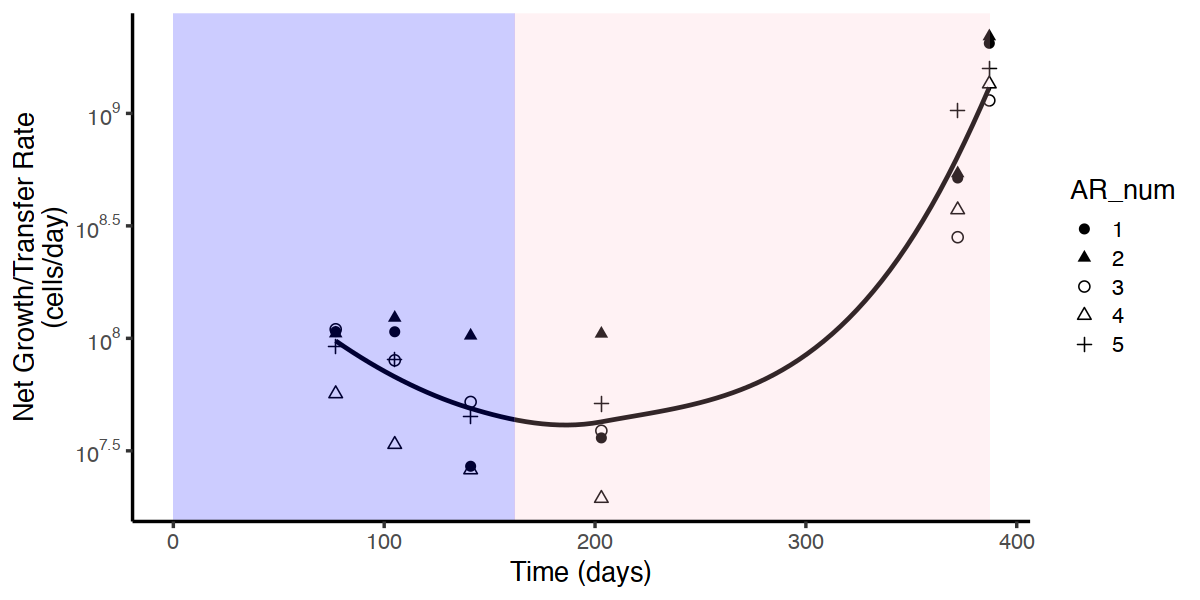

In [152]:
# Plotting
options(repr.plot.width = 10, repr.plot.height = 5)
nssmb_growth_fig <- ggplot(mb, aes(x= t2, y= NGTR))+
    geom_point(aes(shape= AR_num), size= 2.5)+
    scale_shape_manual(values=c(16,17,1,2,3))+
    geom_smooth(method= "loess", se=FALSE, lwd=1, colour= "black")+
#     geom_rect(aes(xmin=0,xmax=50,ymin=-Inf,ymax=Inf),alpha=0.1,fill="green")+
    annotate("rect", xmin = 0, xmax = 162, ymin = 0, ymax = Inf, alpha = 0.2, fill = "blue") +
    annotate("rect", xmin = 162, xmax = 387, ymin = 0, ymax = Inf, alpha = 0.2, fill = "pink") +
    ylab("Net Growth/Transfer Rate\n(cells/day)") + xlab("Time (days)")+ 
scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x),  labels = trans_format("log10", math_format(10^.x)))
                                    
nssmb_growth_fig
# ggplot(mb, aes(x= as.character(t2), y= net_growth))+
#     geom_boxplot()+
#     # annotate("rect", xmin = 0, xmax = 162, ymin = 0, ymax = Inf, alpha = 0.2, fill = "green") +
#     # annotate("rect", xmin = 162, xmax = 387, ymin = 0, ymax = Inf, alpha = 0.2, fill = "pink") +
# scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), labels = trans_format("log10", math_format(10^.x)))

Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 40 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 40 rows containing missing values (geom_point).”


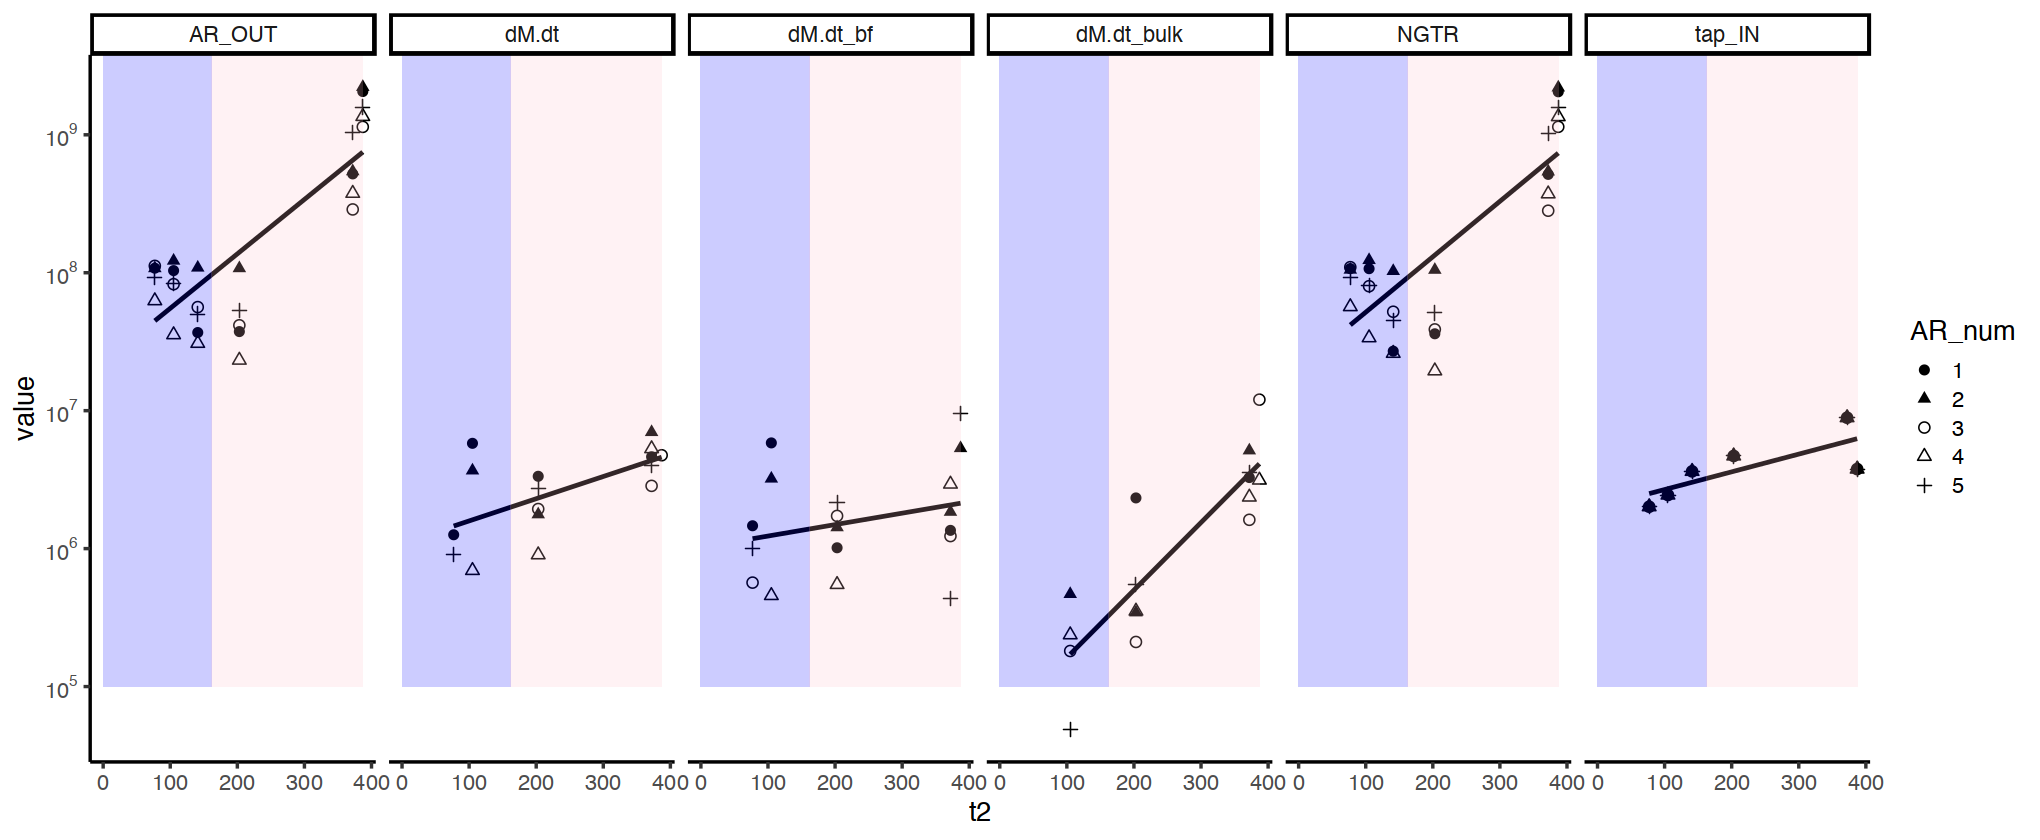

In [153]:
# Plotting multiple parameters (log scale)

a <- mb_long %>% subset( assay == 'tap_IN' | assay == 'AR_OUT'| assay == 'NGTR' | assay == 'dM.dt' | assay == 'dM.dt_bulk' | assay == 'dM.dt_bf')
options(repr.plot.width = 17, repr.plot.height = 7)
ggplot(a, aes(x= t2, y= value))+
    geom_point(aes(shape= AR_num), size= 2.5)+
    scale_shape_manual(values=c(16,17,1,2,3))+
    geom_smooth(method= "lm", se=FALSE, lwd=1, colour= "black")+ #aes(color= phase)
    annotate("rect", xmin = 0, xmax = 162, ymin = 100000, ymax = Inf, alpha = 0.2, fill = "blue") +
    annotate("rect", xmin = 162, xmax = 387, ymin = 100000, ymax = Inf, alpha = 0.2, fill = "pink") +
    scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), labels = trans_format("log10", math_format(10^.x)))+
    facet_wrap(~assay, scales= "fixed", ncol=6)
    

Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 27 rows containing non-finite values (stat_boxplot).”


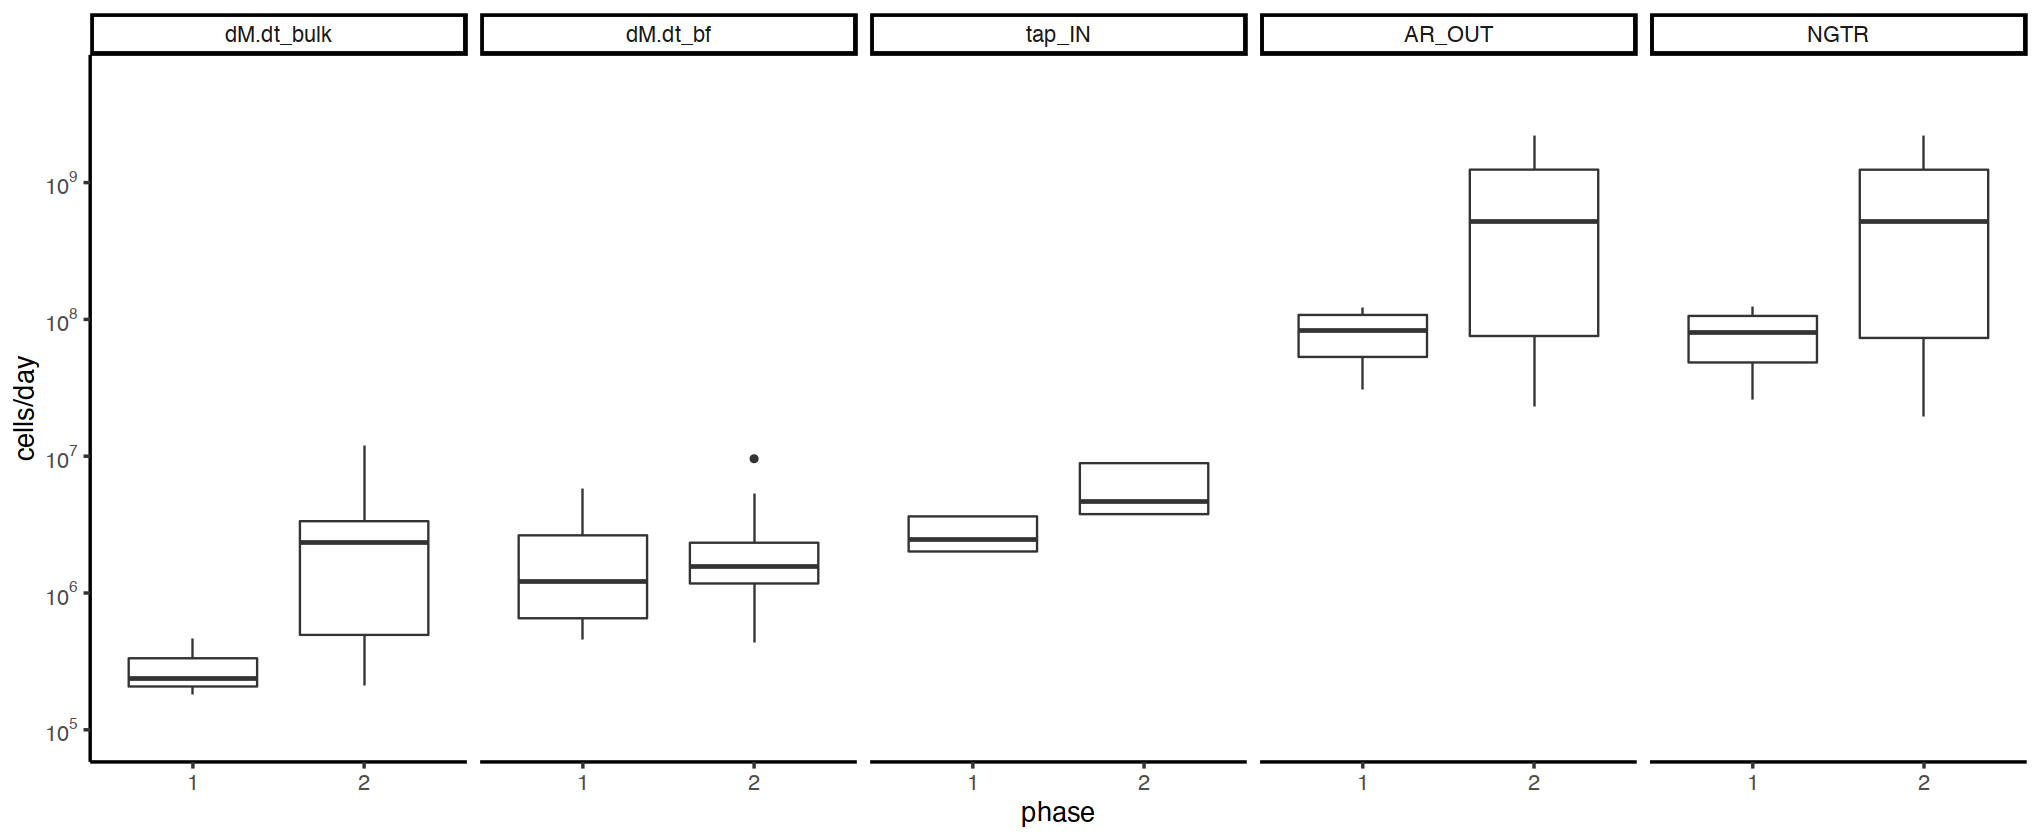

In [154]:
# Plotting multiple parameters (log scale)

mb_long$assay <- factor(mb_long$assay, levels= c('dM.dt_bulk', 'dM.dt_bf', 'tap_IN', 'AR_OUT', 'NGTR'))

a <- mb_long %>% subset( assay == 'tap_IN' | assay == 'AR_OUT'| assay == 'NGTR'  | assay == 'dM.dt_bulk' | assay == 'dM.dt_bf')
options(repr.plot.width = 17, repr.plot.height = 7)
nss_fig <- ggplot(a, aes(x= phase, y= value))+
    geom_boxplot()+ #aes(color= AR_num)
    # annotate("rect", xmin = 0, xmax = 162, ymin = 100000, ymax = Inf, alpha = 0.2, fill = "blue") +
    # annotate("rect", xmin = 162, xmax = 387, ymin = 100000, ymax = Inf, alpha = 0.2, fill = "pink") +
    scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), limits= c(1E5, 5E9), labels = trans_format("log10", math_format(10^.x)))+ 
      ylab('cells/day')+
    facet_wrap(~assay, scales= "fixed", ncol=6)
nss_fig 

`geom_smooth()` using formula 'y ~ x'



[1] 0.0496127

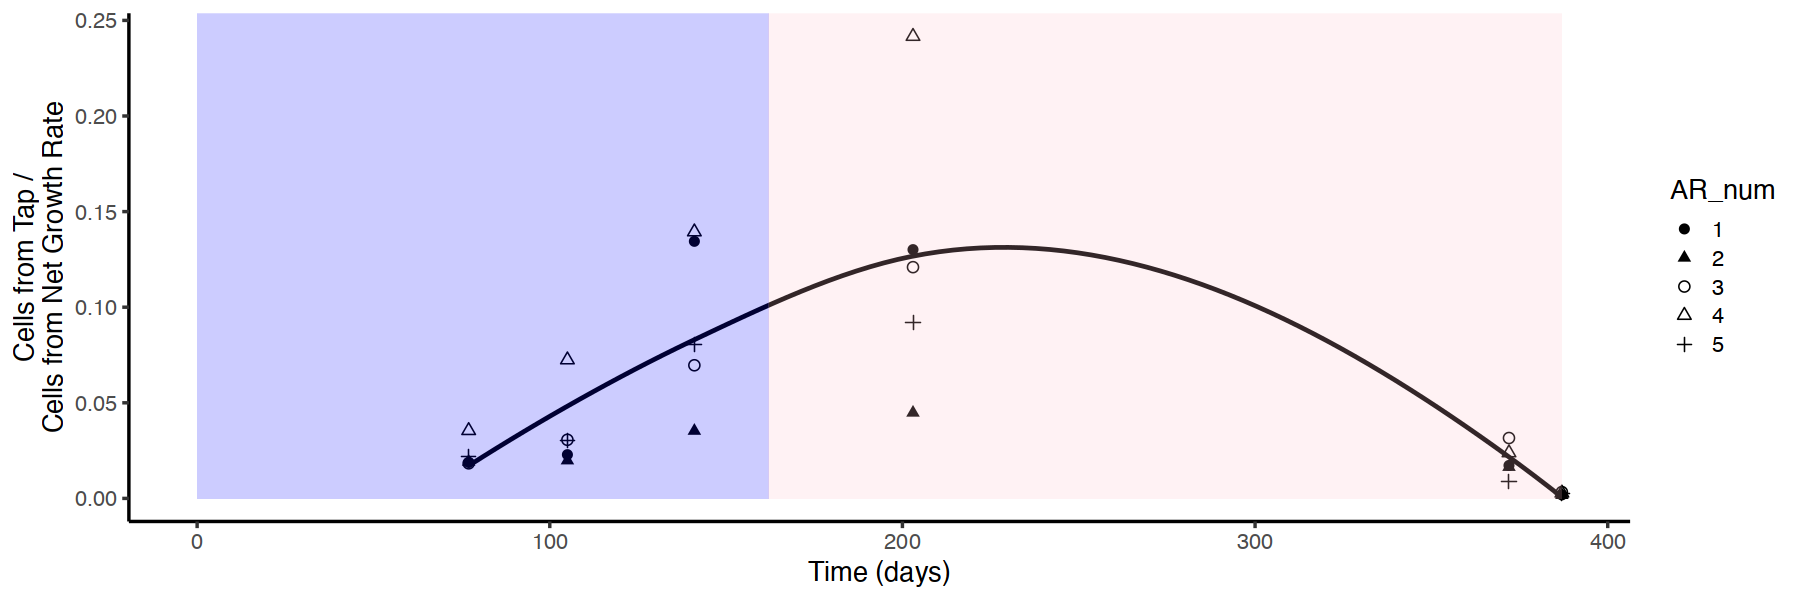

In [155]:
# Plotting multiple parameters (not log scale)

options(repr.plot.width = 12, repr.plot.height = 10)
nssmb_tapfrac_fig <- ggplot(mb, aes(x= t2, y= tap_vs_growth))+
    geom_point(aes(shape= AR_num), size= 2.5)+
    scale_shape_manual(values=c(16,17,1,2,3))+
    geom_smooth(method= "loess", se=FALSE, lwd=1, colour= "black")+
     # ylim(c(0, 0.02))+
    annotate("rect", xmin = 0, xmax = 162, ymin = 0, ymax = Inf, alpha = 0.2, fill = "blue") +
    annotate("rect", xmin = 162, xmax = 387, ymin = 0, ymax = Inf, alpha = 0.2, fill = "pink") +
    xlab("Time (days)") + ylab("Cells from Tap /\nCells from Net Growth Rate")

a <- mb_long %>% subset(assay == 'dM.dt')
# a["log.dM"] <- log10(abs(a$dM.dt))
# a$log.dM[a$dM.dt <0] <- (-1)*abs(a$dM.dt)
options(repr.plot.width = 15, repr.plot.height = 5)
plot_dM <- ggplot(a, aes(x= t2, y= value))+
    geom_point(aes(color= AR_num))+
    geom_smooth(method= "lm", se=FALSE, lwd=1, aes(color= phase))+
    annotate("rect", xmin = 0, xmax = 162, ymin = Inf, ymax = Inf, alpha = 0.2, fill = "blue") +
    annotate("rect", xmin = 162, xmax = 387, ymin = Inf, ymax = Inf, alpha = 0.2, fill = "pink") 

nssmb_tapfrac_fig
mean(mb$tap_vs_growth)

In [156]:
#arrange plots for figure together
# options(repr.plot.width = 12, repr.plot.height = 10)
# fig_2<- ggarrange(fig_2a,fig_2b,fig_2c, fig_2d, ncol=4, nrow=1, labels= c("A", "B", "C", "D"), font.label = list(size = 10, color = "black", face = "bold", family = NULL), legend = "top", common.legend = T, align = c("hv"))
# fig_2

# ggsave(paste0(fig_dir, 'qpcr.jpeg'), width=12, height=10)

## Steady State

0  = [tapres conc]*[flowrate] - [conc in reactor bulk]*[flowrate] + [net growth/decay rate in bulk and biofilm]

total cells in reactor at t1 = (ICC at t1)*volume + (bf_ICC)*surface area, where volume = 1000 mL and surface area= 

Units:
* volumes in mL (ICC is in cells/mL; reactor volume 1000 mL)
* area in cm (bf_ICC is in cells/cm2)
* time in days (flowrate converted to mL/day)

Assumptions:
* Assume steady state for the small period of time around each sample
* CFSTR model assumes concentration out equals the concentration anywhere in the fully mixed reactor
* Only surface area with biofilm is the surface area of the PVC slides
* Assume cell counts change linearly over t1 to t2 (hence just an average of cell counts over each time period as input)

In [157]:
arbf_subset <- arbf %>% filter(!is.na(ICC_gmean)) %>% filter(type== "AR") %>% filter(AR_num != "tap") %>% filter(AR_num != "MQ")%>% select(c(ICC_gmean, day, AR_num)) 
tap_subset <- arbf %>% filter(type == "tapres") %>% select(c(ICC_gmean, day)) %>% rename(tapres_ICC_gmean = ICC_gmean)
mb_ss <- merge(arbf_subset, tap_subset, by= "day") %>% filter(day >22) 
# head(arbf_subset)
# head(tap_subset)

flowrate = 2.1*1440 # 2.1 mL/min * 1440 min/day
surf_area = 20*15*1.5 #there are 20 slides that are 15 cm long and 1.5 cm wide
volume= 1000
mb_ss["tap_IN"] = (mb_ss$tapres_ICC_gmean)*flowrate
mb_ss["AR_OUT"] = (mb_ss$ICC_gmean)*flowrate
mb_ss["NGTR"] <- mb_ss["AR_OUT"]- mb_ss["tap_IN"] #units of intact cells per day
mb_ss["phase"] <- "1"
mb_ss$phase[mb_ss$day > 162] <- "2"

# calculate the relative contribution of the tapres to the change in biomass
mb_ss["tap_vs_growth"] <- mb_ss$tap_IN/mb_ss$NGTR

head(mb_ss)

day ICC_gmean AR_num tapres_ICC_gmean tap_IN  AR_OUT    NGTR      phase
1 30  47691.73  1      2024.080         6120819 144219778 138098959 1    
2 30  40645.18  2      2024.080         6120819 122911024 116790205 1    
3 30  34677.95  3      2024.080         6120819 104866122  98745303 1    
4 30  27037.96  5      2024.080         6120819  81762796  75641977 1    
5 30  22264.12  4      2024.080         6120819  67326693  61205875 1    
6 36  41716.72  1      1449.917         4384548 126151356 121766808 1    
  tap_vs_growth
1 0.04432198   
2 0.05240866   
3 0.06198592   
4 0.08091828   
5 0.10000378   
6 0.03600775

In [158]:
# make df long for plotting purposes 
mb_long <- pivot_longer(mb_ss,
                        cols = c('ICC_gmean','tapres_ICC_gmean', 'tap_IN','AR_OUT','NGTR','tap_vs_growth'),
                        names_to = 'assay',
                        values_to = 'value')
mb_long[mb_long$value < 0, ]


day AR_num phase assay value
1  NA  NA     NA    NA    NA   
2  NA  NA     NA    NA    NA   
3  NA  NA     NA    NA    NA   
4  NA  NA     NA    NA    NA   
5  NA  NA     NA    NA    NA   
6  NA  NA     NA    NA    NA   
7  NA  NA     NA    NA    NA   
8  NA  NA     NA    NA    NA   
9  NA  NA     NA    NA    NA   
10 NA  NA     NA    NA    NA   
11 NA  NA     NA    NA    NA   
12 NA  NA     NA    NA    NA   
13 NA  NA     NA    NA    NA   
14 NA  NA     NA    NA    NA   
15 NA  NA     NA    NA    NA   
16 NA  NA     NA    NA    NA   
17 NA  NA     NA    NA    NA   
18 NA  NA     NA    NA    NA   
19 NA  NA     NA    NA    NA   
20 NA  NA     NA    NA    NA   
21 NA  NA     NA    NA    NA   
22 NA  NA     NA    NA    NA   
23 NA  NA     NA    NA    NA   
24 NA  NA     NA    NA    NA

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 6 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 6 rows containing missing values (geom_point).”


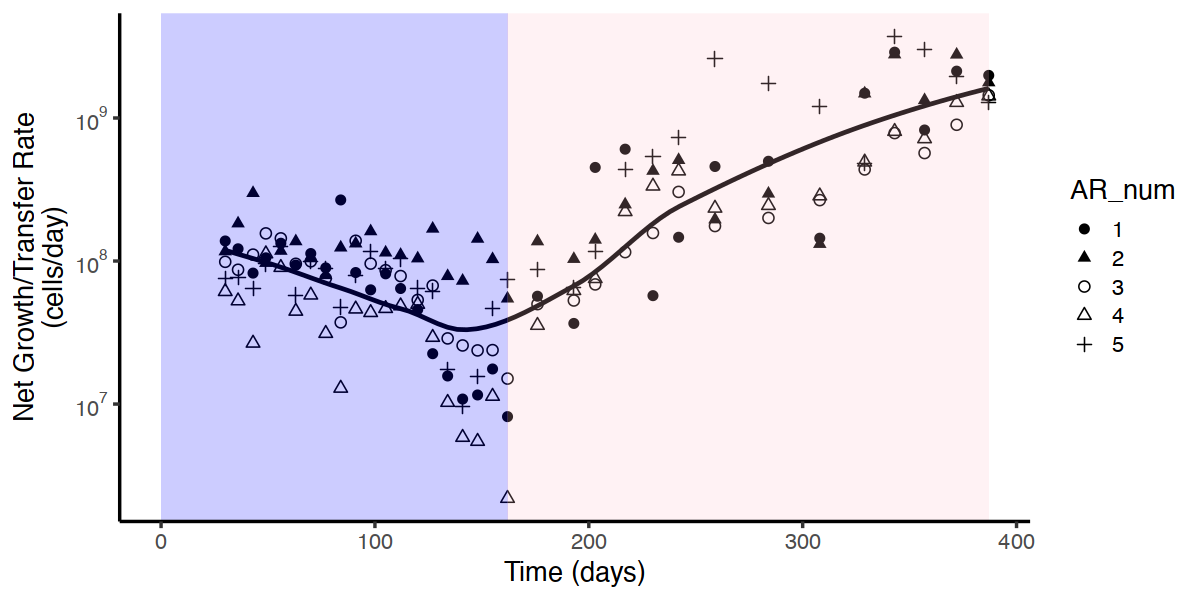

In [159]:
# Plotting
options(repr.plot.width = 10, repr.plot.height = 5)
ssmb_growth_fig <- ggplot(mb_ss, aes(x= day, y= NGTR))+
    geom_point(aes(shape= AR_num), size= 2.5)+
    scale_shape_manual(values=c(16,17,1,2,3))+
    geom_smooth(method= "loess", se=FALSE, lwd=1, colour= "black")+
#     geom_rect(aes(xmin=0,xmax=50,ymin=-Inf,ymax=Inf),alpha=0.1,fill="green")+
    annotate("rect", xmin = 0, xmax = 162, ymin = 0, ymax = Inf, alpha = 0.2, fill = "blue") +
    annotate("rect", xmin = 162, xmax = 387, ymin = 0, ymax = Inf, alpha = 0.2, fill = "pink") +
    ylab("Net Growth/Transfer Rate\n(cells/day)") + xlab("Time (days)")+
scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), labels = trans_format("log10", math_format(10^.x)))
ssmb_growth_fig                                
# ggplot(mb, aes(x= as.character(t2), y= net_growth))+
#     geom_boxplot()+
#     # annotate("rect", xmin = 0, xmax = 162, ymin = 0, ymax = Inf, alpha = 0.2, fill = "green") +
#     # annotate("rect", xmin = 162, xmax = 387, ymin = 0, ymax = Inf, alpha = 0.2, fill = "pink") +
# scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), labels = trans_format("log10", math_format(10^.x)))
                                    

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 12 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 12 rows containing missing values (geom_point).”


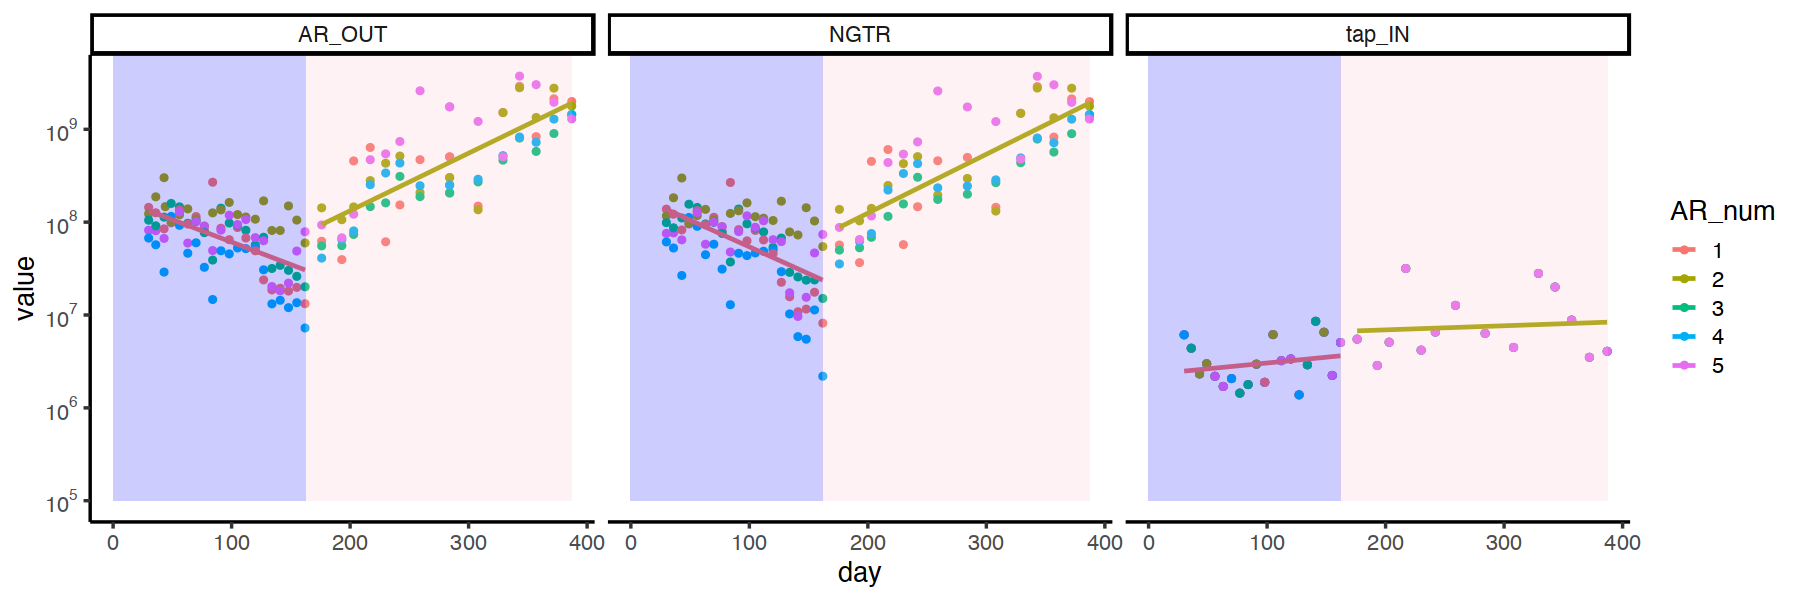

In [160]:
# Plotting multiple parameters (log scale)

a <- mb_long %>% subset( assay == 'tap_IN' | assay == 'AR_OUT'| assay == 'NGTR')
options(repr.plot.width = 15, repr.plot.height = 5)
ggplot(a, aes(x= day, y= value))+
    geom_point(aes(color= AR_num))+
    geom_smooth(method= "lm", se=FALSE, lwd=1, aes(color= phase))+
    annotate("rect", xmin = 0, xmax = 162, ymin = 100000, ymax = Inf, alpha = 0.2, fill = "blue") +
    annotate("rect", xmin = 162, xmax = 387, ymin = 100000, ymax = Inf, alpha = 0.2, fill = "pink") +
    scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), labels = trans_format("log10", math_format(10^.x)))+
    facet_wrap(~assay, scales= "fixed", ncol=4)
    

Warning message:
“Removed 12 rows containing non-finite values (stat_boxplot).”


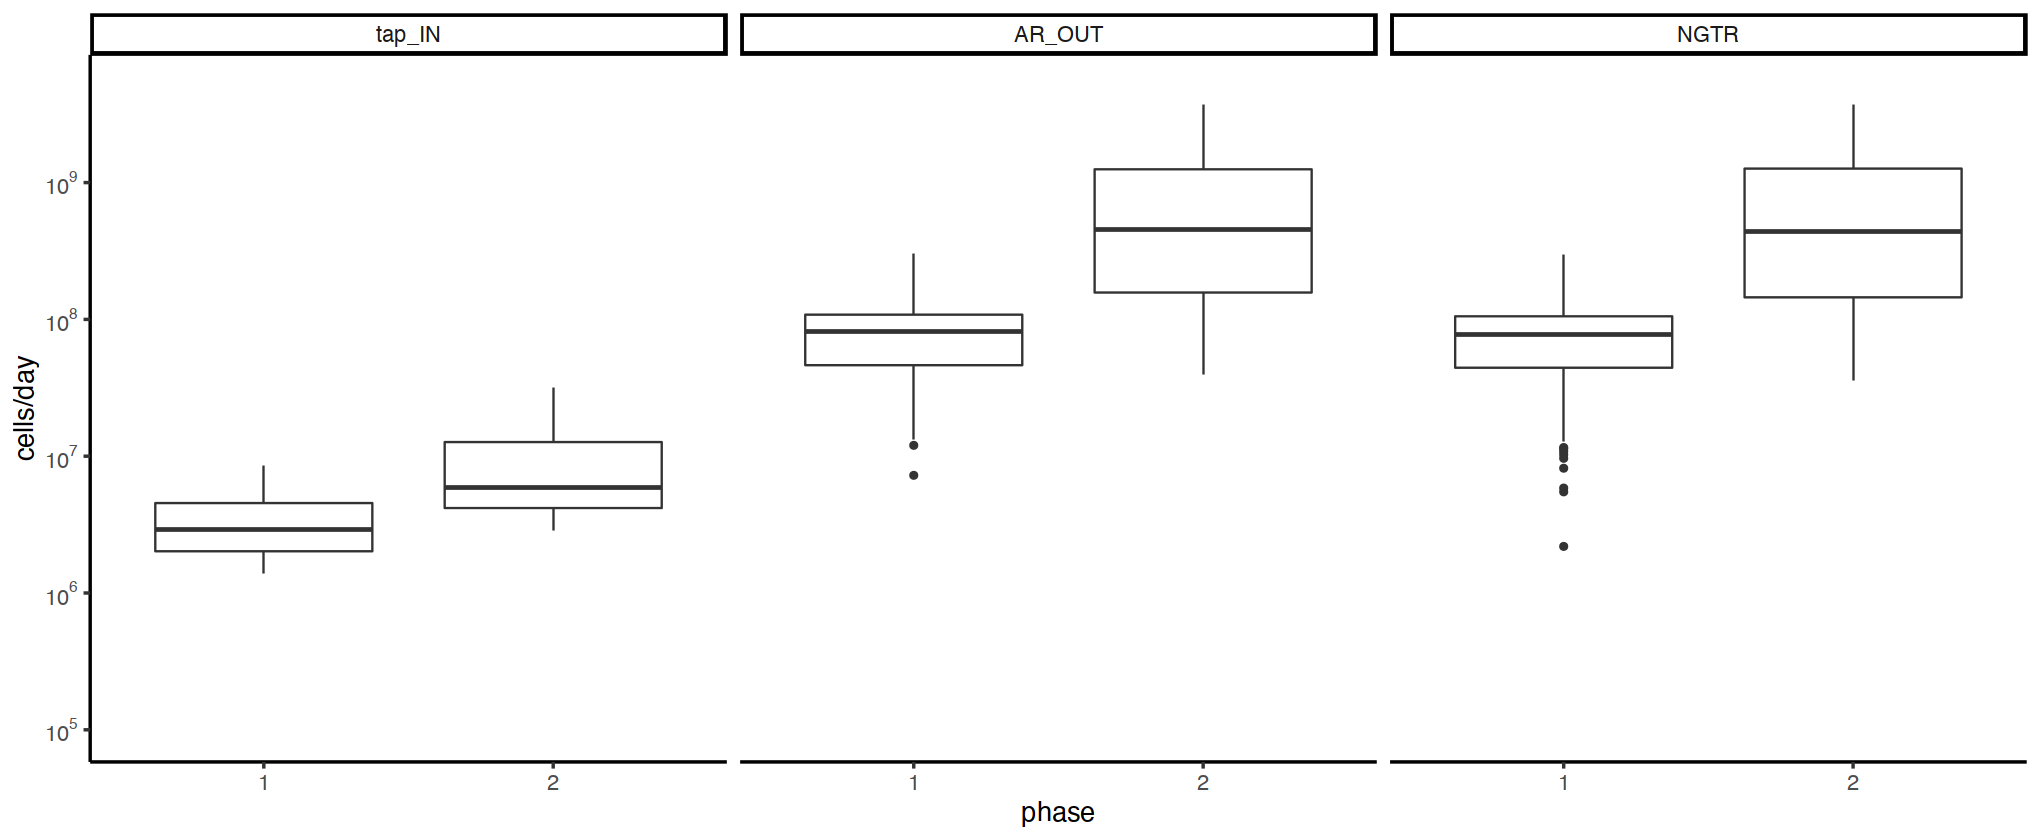

In [161]:
# Plotting multiple parameters (log scale)
mb_long$assay <- factor(mb_long$assay, levels= c('dM.dt_bulk', 'dM.dt_bf', 'tap_IN', 'AR_OUT', 'NGTR'))

a <- mb_long %>% subset( assay == 'tap_IN' | assay == 'AR_OUT'| assay == 'NGTR' | assay == 'dM.dt' | assay == 'dM.dt_bulk' | assay == 'dM.dt_bf')
options(repr.plot.width = 17, repr.plot.height = 7)
ss_fig <- ggplot(a, aes(x= phase, y= value))+
    geom_boxplot()+ #aes(color= AR_num)
    # annotate("rect", xmin = 0, xmax = 162, ymin = 100000, ymax = Inf, alpha = 0.2, fill = "blue") +
    # annotate("rect", xmin = 162, xmax = 387, ymin = 100000, ymax = Inf, alpha = 0.2, fill = "pink") +
    scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), limits= c(1E5, 5E9), labels = trans_format("log10", math_format(10^.x)))+
                                        ylab('cells/day')+
    facet_wrap(~assay, scales= "fixed", ncol=6)
ss_fig

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 6 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 6 rows containing missing values (geom_point).”


[1] 0.09619772

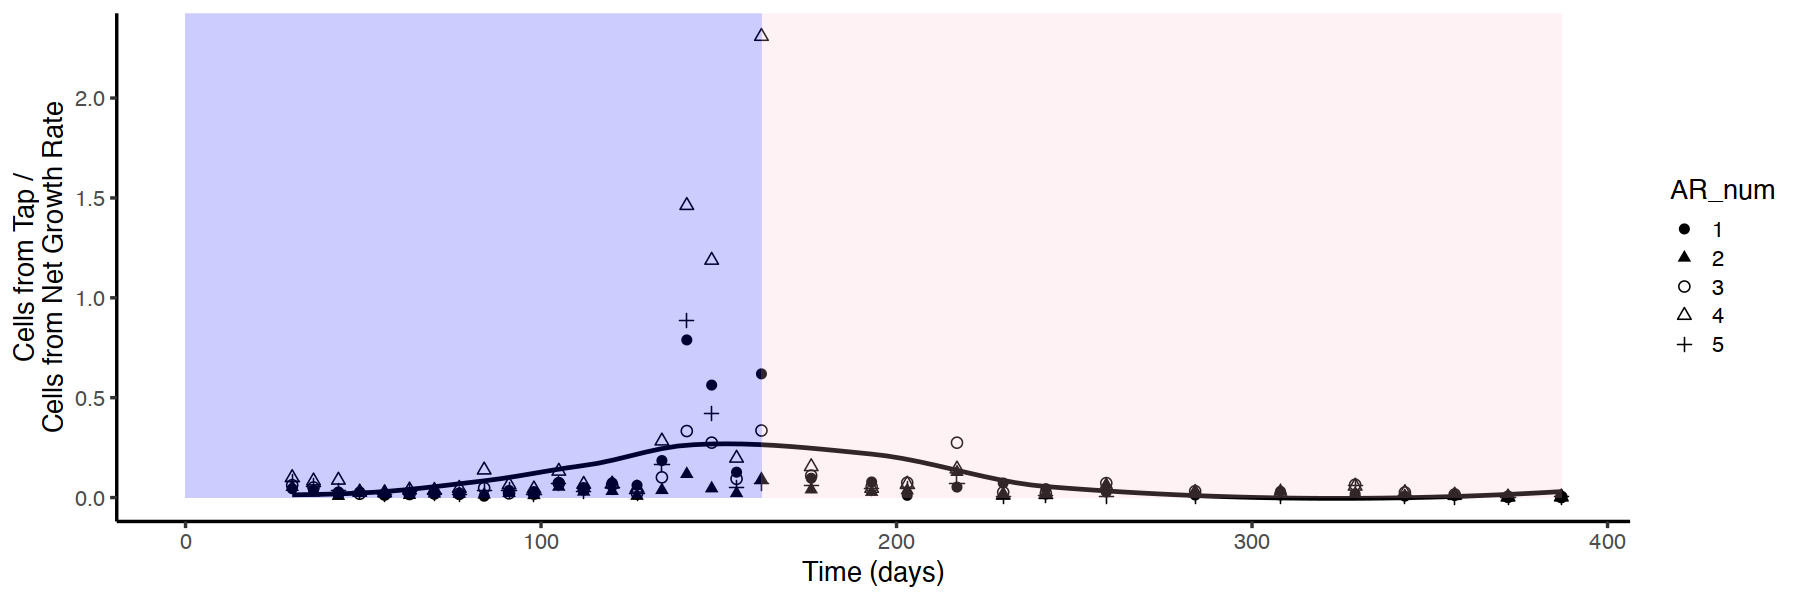

In [162]:
# Plotting multiple parameters (not log scale)

options(repr.plot.width = 12, repr.plot.height = 10)
ssmb_tapfrac_fig <- ggplot(mb_ss, aes(x= day, y= tap_vs_growth))+
    geom_point(aes(shape= AR_num), size= 2.5)+
    scale_shape_manual(values=c(16,17,1,2,3))+
    geom_smooth(method= "loess", se=FALSE, lwd=1, colour= "black")+
    annotate("rect", xmin = 0, xmax = 162, ymin = 0, ymax = Inf, alpha = 0.2, fill = "blue") +
    annotate("rect", xmin = 162, xmax = 387, ymin = 0, ymax = Inf, alpha = 0.2, fill = "pink") +
    xlab("Time (days)") + ylab("Cells from Tap /\nCells from Net Growth Rate")

a <- mb_long %>% subset(assay == 'dM.dt')
# a["log.dM"] <- log10(abs(a$dM.dt))
# a$log.dM[a$dM.dt <0] <- (-1)*abs(a$dM.dt)
options(repr.plot.width = 15, repr.plot.height = 5)
plot_dM <- ggplot(a, aes(x= t2, y= value))+
    geom_point(aes(color= AR_num))+
    geom_smooth(method= "lm", se=FALSE, lwd=1, aes(color= phase))+
    annotate("rect", xmin = 0, xmax = 162, ymin = Inf, ymax = Inf, alpha = 0.2, fill = "blue") +
    annotate("rect", xmin = 162, xmax = 387, ymin = Inf, ymax = Inf, alpha = 0.2, fill = "pink") 

ssmb_tapfrac_fig
mean(mb_ss$tap_vs_growth, na.rm= TRUE)

In [163]:
#arrange plots for figure together
# options(repr.plot.width = 12, repr.plot.height = 10)
# fig_3<- ggarrange(fig_2a,fig_2b,fig_2c, fig_2d, ncol=4, nrow=1, labels= c("A", "B", "C", "D"), font.label = list(size = 10, color = "black", face = "bold", family = NULL), legend = "top", common.legend = T, align = c("hv"))
# fig_3

# ggsave(paste0(fig_dir, 'qpcr.jpeg'), width=12, height=10)

Warning message:
“Removed 12 rows containing non-finite values (stat_boxplot).”
Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 27 rows containing non-finite values (stat_boxplot).”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 6 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 6 rows containing missing values (geom_point).”
Warning message:
“Removed 12 rows containing non-finite values (stat_boxplot).”
Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 27 rows containing non-finite values (stat_boxplot).”
Warning message:
“Transformation introduc

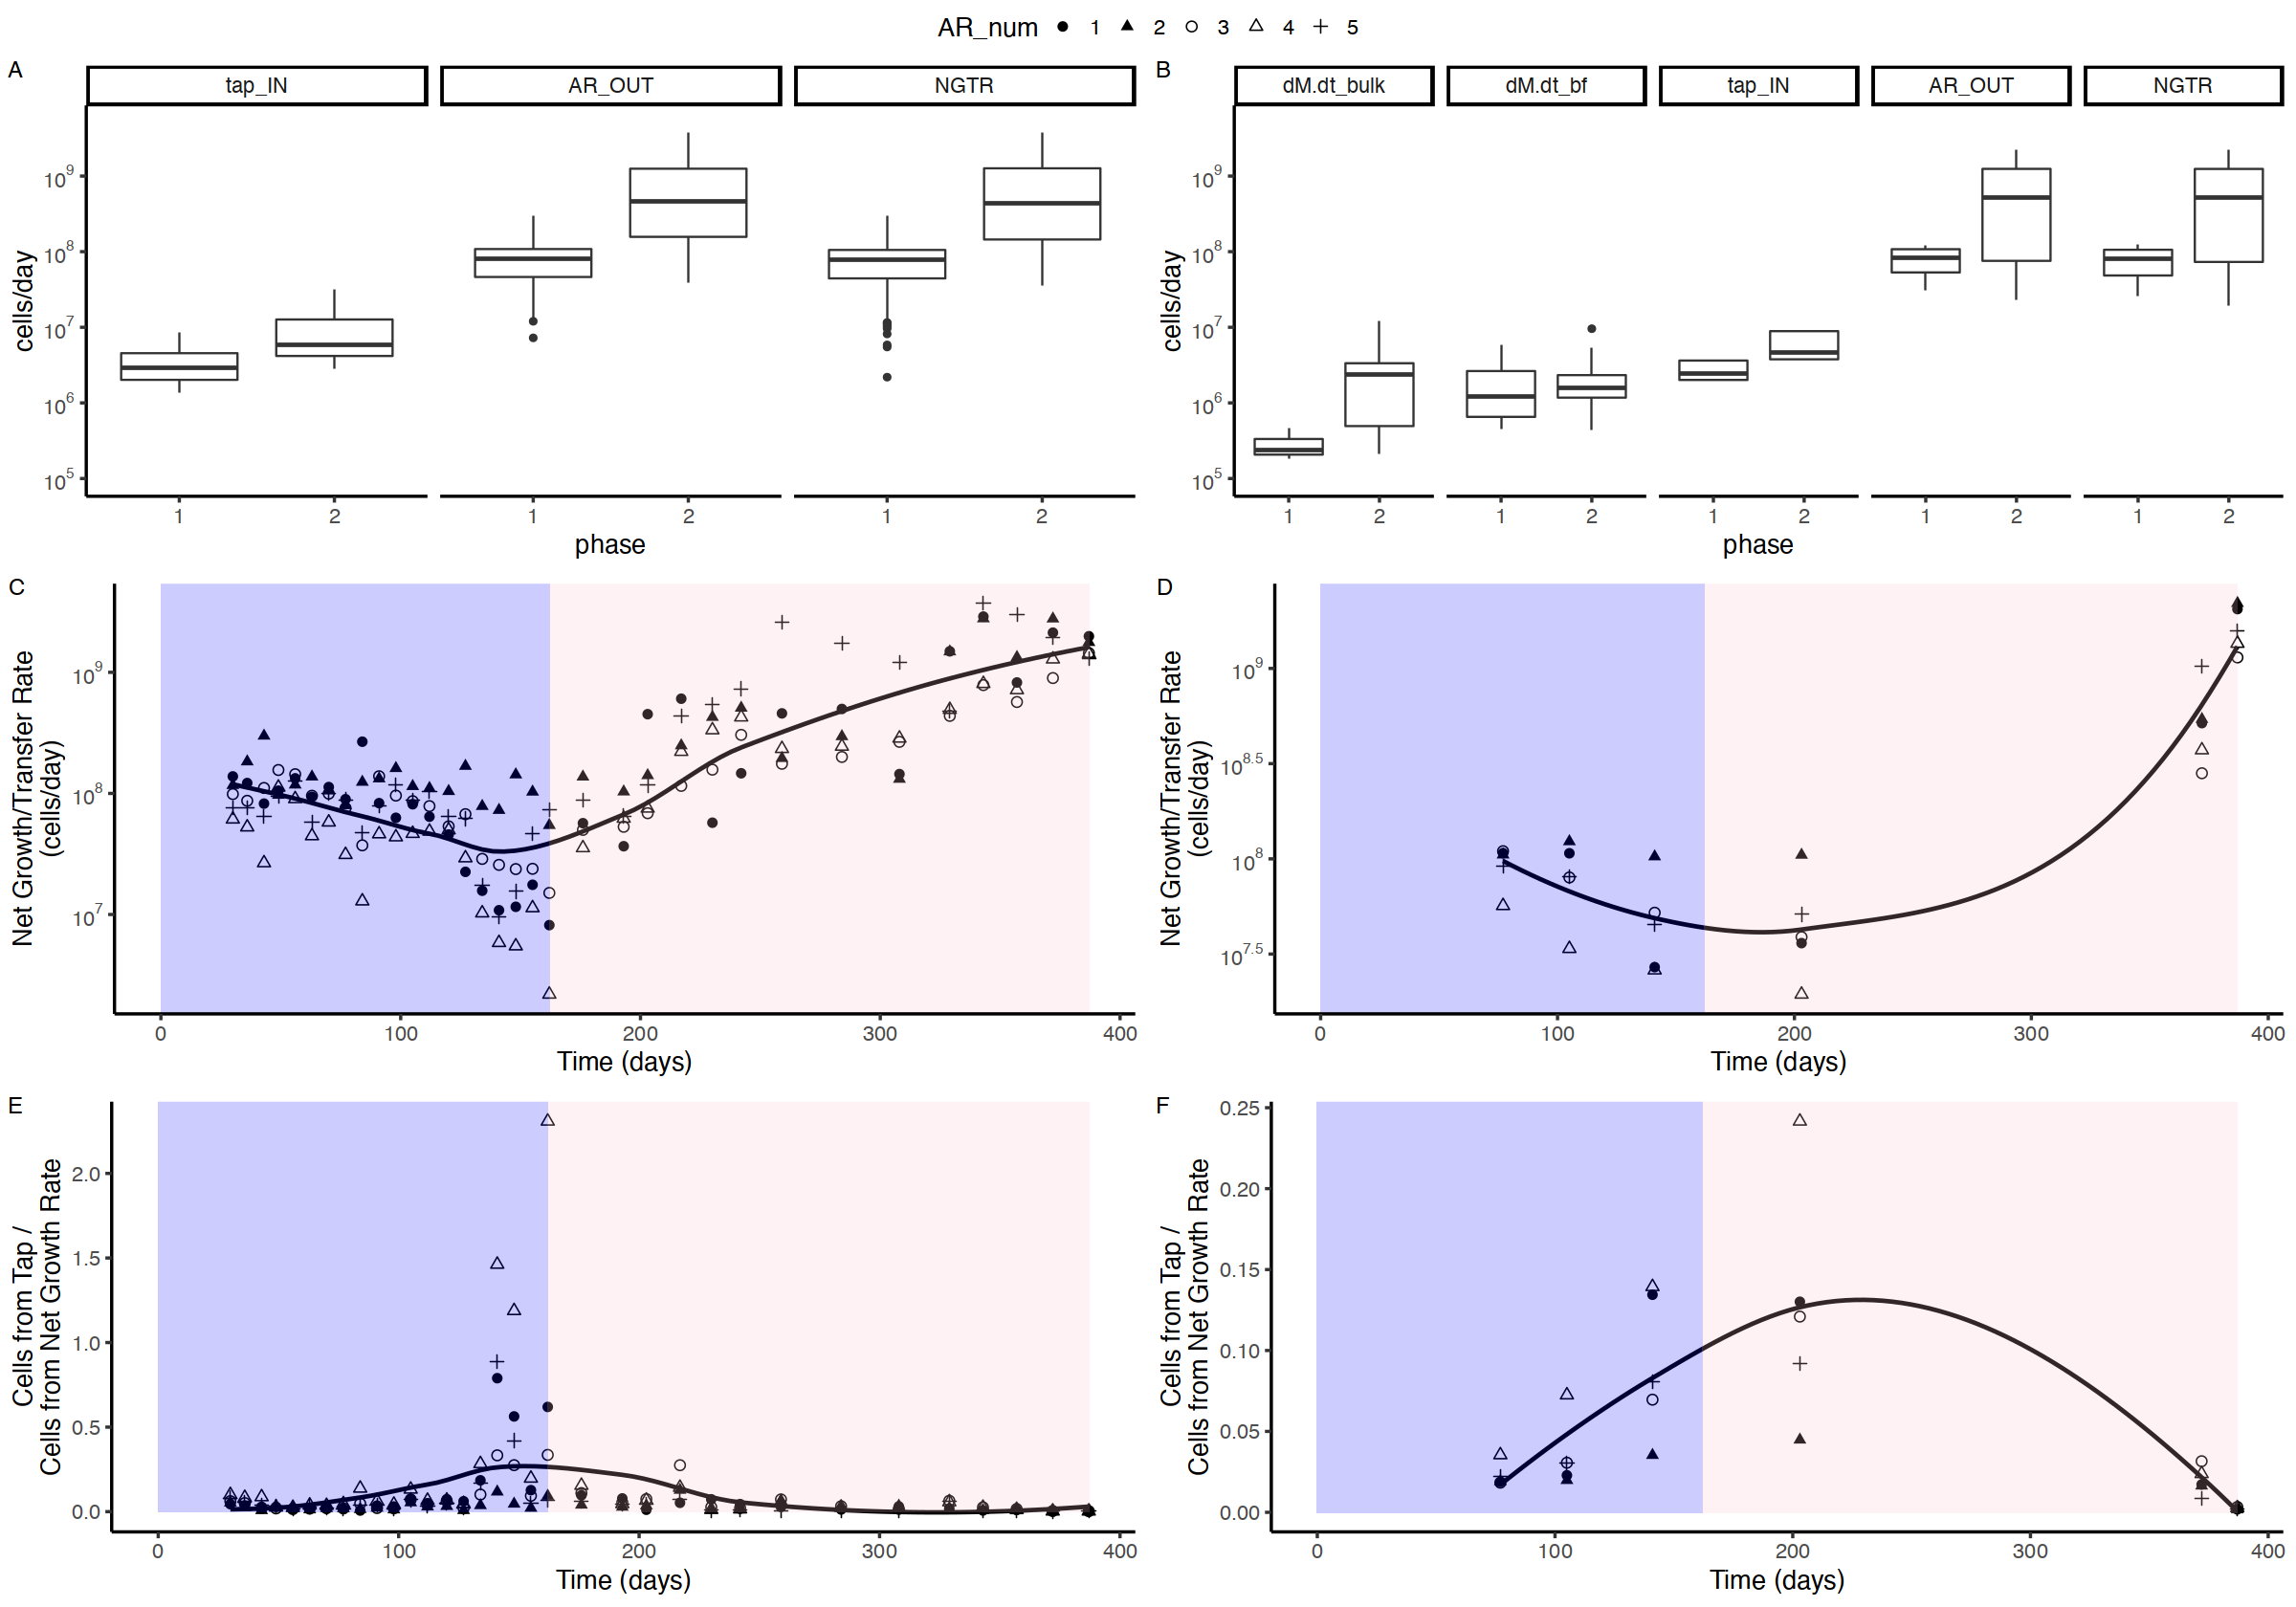

In [164]:
#arrange plots for figure together
options(repr.plot.width = 20, repr.plot.height = 14)
fig_3<- ggarrange(ss_fig,  nss_fig, ssmb_growth_fig, nssmb_growth_fig,ssmb_tapfrac_fig, nssmb_tapfrac_fig,  ncol=2, nrow=3, labels= c("A", "B", 'C', 'D', 'E', 'F' ), font.label = list(size = 14, color = "black", face = "bold", family = NULL), legend = "top", common.legend = T, align = c("hv"))
fig_3

ggsave(paste0(fig_dir, 'massbal.pdf'), width=20, height=14)

In [165]:
# How many points in each mass balance

length(mb_ss$NGTR[mb_ss$AR_num == "5"])
length(mb$NGTR)


[1] 35

[1] 30

# 8. Water Quality Plots

In [166]:
# arbf$day[arbf$phase == 1 & !is.na(arbf$ICC_gmean)] #phase 1 final day is 162
# arbf$day[arbf$phase == 2 & !is.na(arbf$ICC_gmean)] #phase 2 first day is 176 and final day is 387

#average cell counts across reactors at phase thresholds
arbf %>% filter(type == "AR") %>% filter(!is.na(ICC_gmean)) %>% dplyr::select(day, ICC_gmean, TCC_gmean, ATPt_avg_nM, ATPi_avg_nM) %>% filter(day == 162 | day == 387) %>% group_by(day) %>% 
        dplyr::summarise(ICC_12345= round(Gmean(ICC_gmean), 0), TCC_12345= round(Gmean(TCC_gmean), 0), ATPt_12345= (mean(ATPt_avg_nM, na.rm= TRUE)), ATPi_12345= (mean(ATPi_avg_nM, na.rm= TRUE))) %>% mutate(ATPi_ATPt = ATPi_12345/ATPt_12345) %>% mutate(ICC_TCC = ICC_12345/TCC_12345)

#last day of biofilm sampling in phase 1 was day 141
#first day of biofilm sampling in phase 2 was 203 and the last was 387
arbf %>% filter(!is.na(bf_ICC_gmean)) %>% dplyr::select(day, bf_ICC_gmean, bf_TCC_gmean, bf_ATPt_avg_nmol.cm2, bf_ATPi_avg_nmol.cm2) %>% filter(day == 141  | day == 387) %>% group_by(day) %>% 
        dplyr::summarise(bf_ICC_12345= round(Gmean(bf_ICC_gmean), 0), bf_TCC_12345= round(Gmean(bf_TCC_gmean), 0), bf_ATPt_12345= (mean(bf_ATPt_avg_nmol.cm2, na.rm= TRUE)), bf_ATPi_12345= (mean(bf_ATPi_avg_nmol.cm2, na.rm= TRUE))) %>% 
        mutate(ICC_TCC = bf_ICC_12345/bf_TCC_12345) %>% mutate(ATPi_ATPt = bf_ATPi_12345/bf_ATPt_12345) 



day ICC_12345 TCC_12345 ATPt_12345 ATPi_12345  ATPi_ATPt ICC_TCC  
1 162   8145     16286    0.01228710 0.007865838 0.6401705 0.5001228
2 387 518367    649890    0.07863902 0.073636472 0.9363859 0.7976227

day bf_ICC_12345 bf_TCC_12345 bf_ATPt_12345 bf_ATPi_12345 ICC_TCC   ATPi_ATPt
1 141  55650        323996      6.156157e-05  0.0000161754  0.1717614 0.2627517
2 387 558185       1287174      4.899279e-04  0.0001805417  0.4336515 0.3685067

In [167]:
#average parameters in each phase at reactor versus tap reservoir

arbf %>% filter(type == "AR") %>% filter(!is.na(ICC_gmean)) %>% dplyr::select(phase, temp, cl_total, ICC_gmean, TCC_gmean, ATPt_avg_nM, ATPi_avg_nM) %>% group_by(phase) %>% 
        dplyr::summarise(temp = mean(temp, na.rm= TRUE), cl = mean(cl_total, na.rm= TRUE), ICC_12345= round(Gmean(ICC_gmean), 0), TCC_12345= round(Gmean(TCC_gmean), 0), ATPt_12345= (mean(ATPt_avg_nM, na.rm= TRUE)), ATPi_12345= (mean(ATPi_avg_nM, na.rm= TRUE))) %>%
         mutate(ICC_TCC = ICC_12345/TCC_12345) %>% mutate(ATPi_ATPt = ATPi_12345/ATPt_12345)

arbf %>% filter(type == "tapres") %>% filter(!is.na(ICC_gmean)) %>% dplyr::select(phase,temp, cl_total, ICC_gmean, TCC_gmean, ATPt_avg_nM, ATPi_avg_nM) %>% group_by(phase) %>% 
        dplyr::summarise(temp = mean(temp, na.rm= TRUE),cl = mean(cl_total, na.rm= TRUE), ICC_12345= round(Gmean(ICC_gmean), 0), TCC_12345= round(Gmean(TCC_gmean), 0), ATPt_12345= (mean(ATPt_avg_nM, na.rm= TRUE)), ATPi_12345= (mean(ATPi_avg_nM, na.rm= TRUE))) %>%
         mutate(ICC_TCC = ICC_12345/TCC_12345) %>% mutate(ATPi_ATPt = ATPi_12345/ATPt_12345)

arbf %>% filter(!is.na(bf_ICC_gmean)) %>% dplyr::select(phase, bf_ICC_gmean, bf_TCC_gmean, bf_ATPt_avg_nmol.cm2, bf_ATPi_avg_nmol.cm2) %>% group_by(phase) %>% 
        dplyr::summarise(bf_ICC_12345= round(Gmean(bf_ICC_gmean), 0), bf_TCC_12345= round(Gmean(bf_TCC_gmean), 0), bf_ATPt_12345= (mean(bf_ATPt_avg_nmol.cm2, na.rm= TRUE)), bf_ATPi_12345= (mean(bf_ATPi_avg_nmol.cm2, na.rm= TRUE))) %>% 
        mutate(ICC_TCC = bf_ICC_12345/bf_TCC_12345) %>% mutate(ATPi_ATPt = bf_ATPi_12345/bf_ATPt_12345)


phase temp     cl         ICC_12345 TCC_12345 ATPt_12345 ATPi_12345 
1 1     22.38174 0.61756522  21605     38772    0.01166934 0.007519408
2 2     23.49167 0.09784615 134999    194233    0.04373461 0.037634476
  ICC_TCC   ATPi_ATPt
1 0.5572320 0.6443728
2 0.6950364 0.8605193

phase temp     cl        ICC_12345 TCC_12345 ATPt_12345  ATPi_12345  
1 1     22.60870 1.5086957 1664       7933     0.004039060 0.0004639161
2 2     23.74167 0.7446154 2477      11866     0.004781448 0.0008031106
  ICC_TCC   ATPi_ATPt
1 0.2097567 0.1148574
2 0.2087477 0.1679639

phase bf_ICC_12345 bf_TCC_12345 bf_ATPt_12345 bf_ATPi_12345 ICC_TCC  
1 1      95210        391147      0.0001081685  1.679633e-05  0.2434123
2 2     404697       1042191      0.0005175487  1.537242e-04  0.3883137
  ATPi_ATPt
1 0.1552792
2 0.2970237

In [168]:
# ratios of AR to tapres
21605/1664 #AR to tap, phase I, ICC 
113389/2477 #AR to tap, phase II, ICC 
(1.5086957- 0.6175652)/1.5086957 #AR to tap, phase I, cl
(0.7446154- 0.1125758)/0.7446154 #AR to tap, phase II, cl


[1] 12.98377

[1] 45.77675

[1] 0.5906628

[1] 0.8488135

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 333 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 324 rows containing missing values (geom_point).”


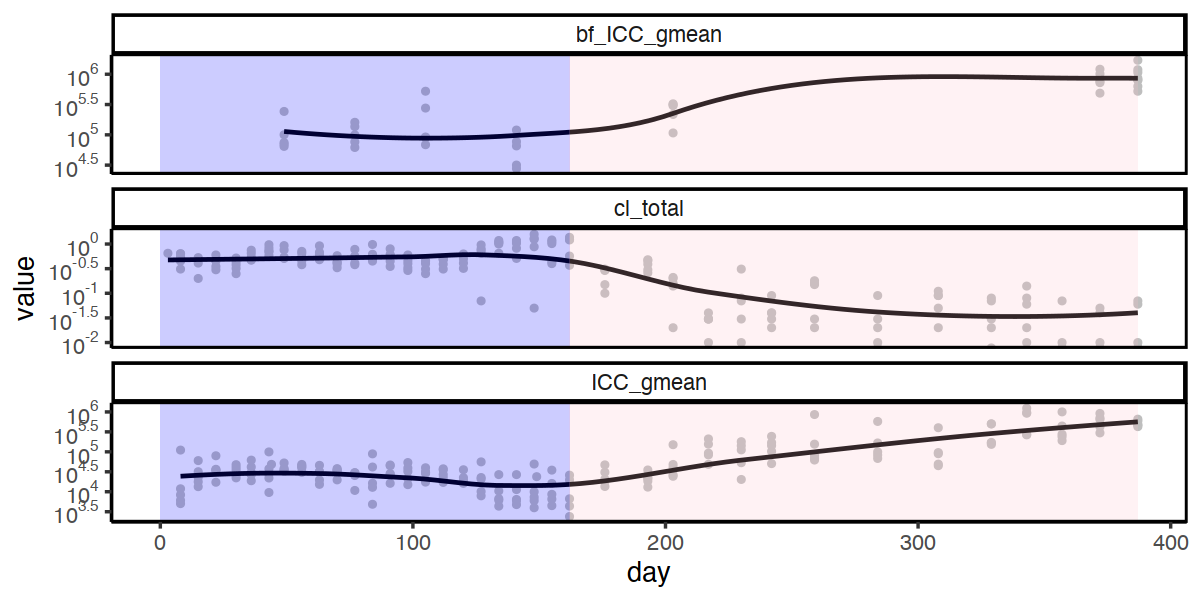

In [169]:
## Plot time series of bulk water parameters in log scale

a <- ar_long  %>% subset(assay == "cl_total" | assay == "ICC_gmean"| assay == "bf_ICC_gmean") 

options(repr.plot.width = 10, repr.plot.height = 5)
ggplot(a, aes(x= day, y= value))+
    geom_point(color= "grey")+
    geom_smooth(method= "loess", se=FALSE, lwd=1, color= "black")+
#     geom_rect(aes(xmin=0,xmax=50,ymin=-Inf,ymax=Inf),alpha=0.1,fill="green")+
scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), labels = trans_format("log10", math_format(10^.x)))+
    annotate("rect", xmin = 0, xmax = 162, ymin = 0, ymax = Inf, alpha = 0.2, fill = "blue") +
    annotate("rect", xmin = 162, xmax = 387, ymin = 0, ymax = Inf, alpha = 0.2, fill = "pink") +
    facet_wrap(~assay, scales= "free_y", ncol=1)+
    theme(panel.background=element_blank(),legend.position="none", panel.border=element_rect(color = "black", fill = NA))
                                    

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 116 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 116 rows containing missing values (geom_point).”


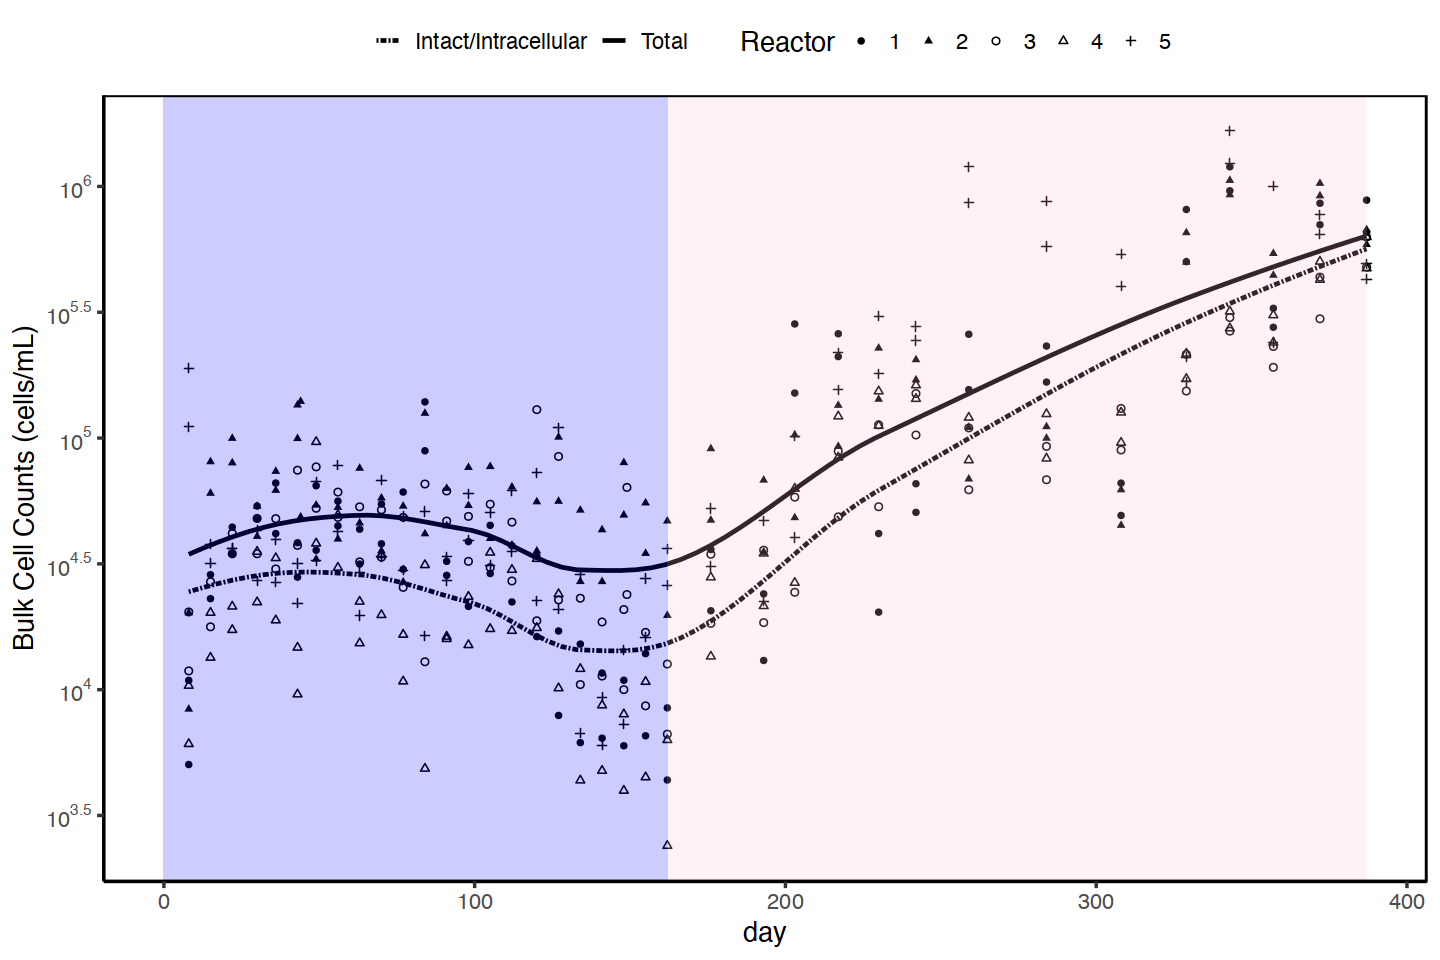

In [170]:
## Plot time series of bulk water parameters in linear scale
options(repr.plot.width = 12, repr.plot.height = 8)
a <- ar_long %>% subset( assay == "TCC_gmean" | assay == "ICC_gmean") %>% rename(Reactor= AR_num)
a$assay[a$assay == "TCC_gmean"] <- "Total"
a$assay[a$assay == "ICC_gmean"]  <- "Intact/Intracellular"

fig_2b <- ggplot(a, aes(x= day, y= value))+
    geom_point(aes(shape= Reactor))+
    scale_shape_manual(values=c(16,17,1,2,3))+
    geom_smooth(method= "loess", se=FALSE, lwd=1, color= "black", aes(linetype = assay))+
    scale_linetype_manual(values=c("twodash", "solid"))+
    scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), labels = trans_format("log10", math_format(10^.x)))+
    annotate("rect", xmin = 0, xmax = 162, ymin = 0, ymax = Inf, alpha = 0.2, fill = "blue") +
    annotate("rect", xmin = 162, xmax = 387, ymin = 0, ymax = Inf, alpha = 0.2, fill = "pink") +
    ylab("Bulk Cell Counts (cells/mL)")+ labs(linetype='') +
     theme(panel.background=element_blank(),legend.position="top", panel.border=element_rect(color = "black", fill = NA))
fig_2b          
                                        
# g_legend<-function(a.gplot){
#   tmp <- ggplot_gtable(ggplot_build(a.gplot))
#   leg <- which(sapply(tmp$grobs, function(x) x$name) == "guide-box")
#   legend <- tmp$grobs[[leg]]
#   return(legend)}

# mylegend<-g_legend(fig_2b)

In [171]:
## Plot time series of bulk water parameters in linear scale
options(repr.plot.width = 10, repr.plot.height = 4)
a <- ar_long %>% subset( assay == "ATPt_avg_nM" | assay == "ATPi_avg_nM") 

fig_2c <- ggplot(a, aes(x= day, y= value))+
    geom_point(aes(shape= AR_num))+
    scale_shape_manual(values=c(16,17,1,2,3))+
    geom_smooth(method= "loess", se=FALSE, lwd=1, color= "black", aes(linetype= assay))+
    scale_linetype_manual(values=c("twodash", "solid"))+
#     geom_rect(aes(xmin=0,xmax=50,ymin=-Inf,ymax=Inf),alpha=0.1,fill="green")+
    scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), labels = trans_format("log10", math_format(10^.x)))+
    annotate("rect", xmin = 0, xmax = 162, ymin = 0, ymax = Inf, alpha = 0.2, fill = "blue") +
    annotate("rect", xmin = 162, xmax = 387, ymin = 0, ymax = Inf, alpha = 0.2, fill = "pink") +
    # facet_wrap(~assay, scales= "free_y", ncol=1)+
    ylab("Bulk ATP (nM)")+
     theme(panel.background=element_blank(),legend.position="none", panel.border=element_rect(color = "black", fill = NA))
# fig_2b                             

In [172]:
## Plot time series of bulk water parameters in linear scale
options(repr.plot.width = 10, repr.plot.height = 4)
a <- ar_long %>%  subset( assay == "bf_TCC_gmean" | assay == "bf_ICC_gmean" ) 

fig_2d <-ggplot(a, aes(x= day, y= value))+
    geom_point(aes(shape= AR_num))+
    scale_shape_manual(values=c(16,17,1,2,3))+
    geom_smooth(method= "loess", se=FALSE, lwd=1, color= "black", aes(linetype = assay))+
    scale_linetype_manual(values=c("twodash", "solid"))+
#     geom_rect(aes(xmin=0,xmax=50,ymin=-Inf,ymax=Inf),alpha=0.1,fill="green")+
    scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), labels = trans_format("log10", math_format(10^.x)))+
    annotate("rect", xmin = 0, xmax = 169, ymin = 0, ymax = Inf, alpha = 0.2, fill = "blue") +
    annotate("rect", xmin = 169, xmax = 387, ymin = 0, ymax = Inf, alpha = 0.2, fill = "pink") +
    # facet_wrap(~assay, scales= "free_y", ncol=1)+
    ylab("Biofilm Cell Counts (cells/cm2)")+
    theme(panel.background=element_blank(),legend.position="none", panel.border=element_rect(color = "black", fill = NA))
# fig_2d                               

In [173]:
## Plot time series of biofilm ATP
options(repr.plot.width = 10, repr.plot.height = 4)
a <- ar_long %>% subset( assay == "bf_ATPt_avg_nmol.cm2" | assay == "bf_ATPi_avg_nmol.cm2") 

fig_2e <- ggplot(a, aes(x= day, y= value))+
    geom_point(aes(shape= AR_num))+
    scale_shape_manual(values=c(16,17,1,2,3))+
    geom_smooth(method= "loess", se=FALSE, lwd=1, color= "black", aes(linetype= assay))+
    scale_linetype_manual(values=c("twodash", "solid"))+
#     geom_rect(aes(xmin=0,xmax=50,ymin=-Inf,ymax=Inf),alpha=0.1,fill="green")+
    scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), labels = trans_format("log10", math_format(10^.x)))+
    annotate("rect", xmin = 0, xmax = 162, ymin = 0, ymax = Inf, alpha = 0.2, fill = "blue") +
    annotate("rect", xmin = 162, xmax = 387, ymin = 0, ymax = Inf, alpha = 0.2, fill = "pink") +
    # facet_wrap(~assay, scales= "free_y", ncol=1)+
    ylab("Biofilm ATP (nmol/cm2)")+
     theme(panel.background=element_blank(),legend.position="none", panel.border=element_rect(color = "black", fill = NA))
# fig_2e                            

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 59 rows containing missing values (geom_point).”


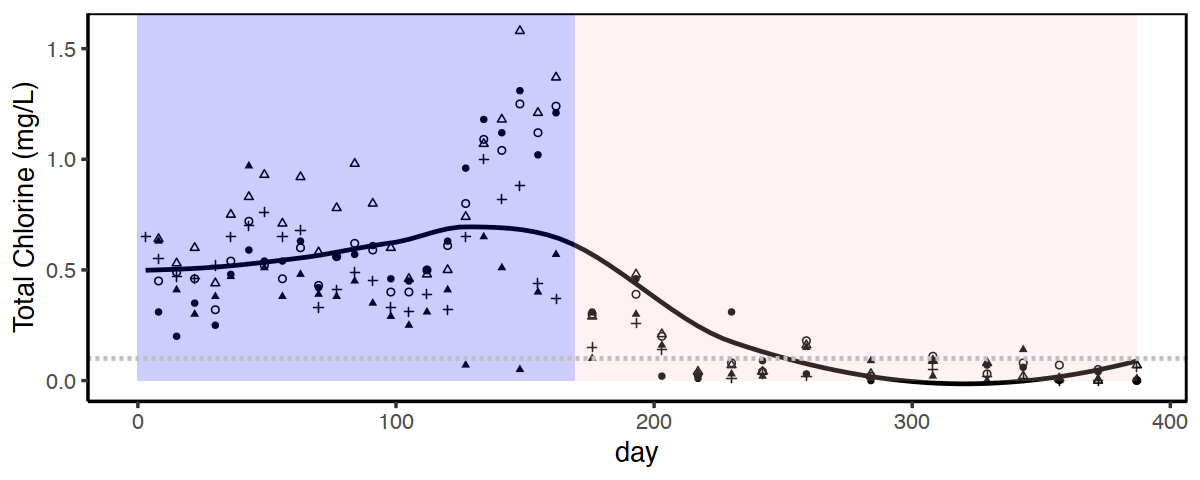

In [174]:
## Plot time series of bulk water parameters in linear scale
options(repr.plot.width = 10, repr.plot.height = 4)
a <- ar_long %>%  subset(assay == "cl_total" ) 

fig_2a <-ggplot(a, aes(x= day, y= value))+
    geom_point(aes(shape= AR_num))+
    scale_shape_manual(values=c(16,17,1,2,3))+
    geom_smooth(method= "loess", se=FALSE, lwd=1, color= "black")+
    scale_linetype_manual(values=c("twodash", "solid"))+
    annotate("rect", xmin = 0, xmax = 169, ymin = 0, ymax = Inf, alpha = 0.2, fill = "blue") +
    annotate("rect", xmin = 169, xmax = 387, ymin = 0, ymax = Inf, alpha = 0.2, fill = "pink") +
    geom_hline(yintercept= 0.1, linetype= "dashed", size= 1, color= "grey")+
    # facet_wrap(~assay, scales= "free_y", ncol=1)+
    ylab("Total Chlorine (mg/L)")+
     theme(panel.background=element_blank(),legend.position="none", panel.border=element_rect(color = "black", fill = NA))
fig_2a                                

In [175]:
## Plot time series of bulk water parameters in linear scale
options(repr.plot.width = 10, repr.plot.height = 4)
a <- ar_long %>%  subset(assay == "temp" ) 

fig_2f <-ggplot(a, aes(x= day, y= value))+
    geom_point(aes(shape= AR_num))+
    scale_shape_manual(values=c(16,17,1,2,3))+
    geom_smooth(method= "loess", se=FALSE, lwd=1, color= "black")+
    scale_linetype_manual(values=c("twodash", "solid"))+
    annotate("rect", xmin = 0, xmax = 169, ymin = 0, ymax = Inf, alpha = 0.2, fill = "blue") +
    annotate("rect", xmin = 169, xmax = 387, ymin = 0, ymax = Inf, alpha = 0.2, fill = "pink") +
    ylab("Temperature (C)")+
     theme(panel.background=element_blank(),legend.position="none", panel.border=element_rect(color = "black", fill = NA))
# fig_2a                                

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 116 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 116 rows containing missing values (geom_point).”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 116 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 116 rows containing missing values (geom_point).”
Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous y-axis

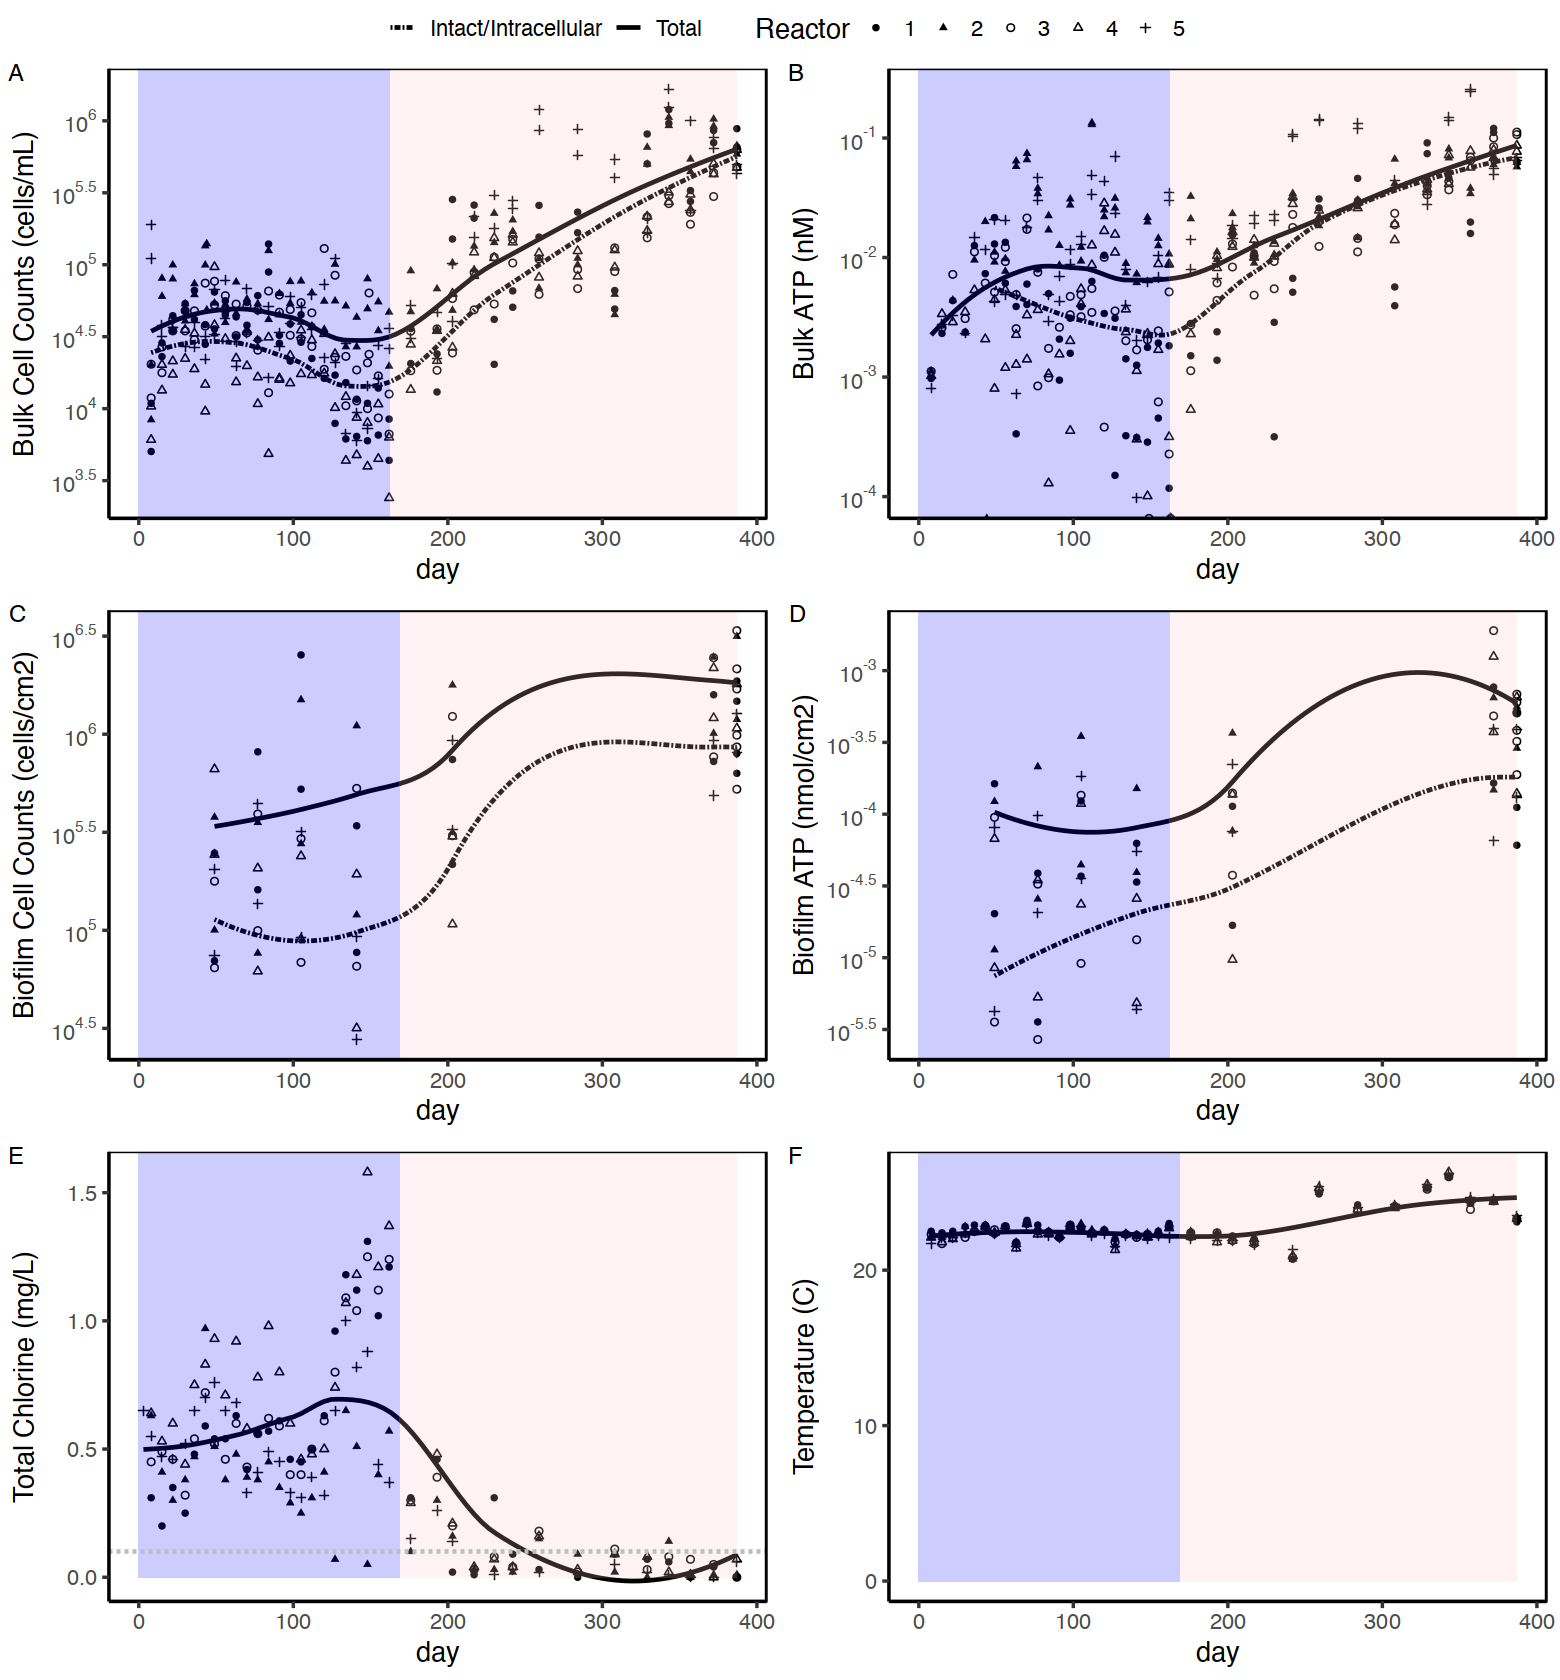

In [176]:
#arrange plots for figure together
options(repr.plot.width = 13, repr.plot.height = 14)
fig_2<- ggarrange( fig_2b,fig_2c, fig_2d, fig_2e, fig_2a, fig_2f,  ncol=2, nrow=3, labels= c("A", "B", "C", "D", "E", "F"), font.label = list(size = 14, color = "black", face = "bold", family = NULL), legend = "top", common.legend = T, align = c("hv"))
fig_2

ggsave(paste0(fig_dir, 'cell_timeseries.pdf'), width=13, height=14)

### Tap vs Tap res

In [177]:
# Test differences between groups based on type
wilcox.test(arbf$ICC_gmean[arbf$type== "tap"], arbf$ICC_gmean[arbf$type== "tapres"], conf.level= 0.95) #not statistically the same
wilcox.test(arbf$cl_total[arbf$type== "tap"], arbf$cl_total[arbf$type== "tapres"], conf.level= 0.95) #not statistically the same



	Wilcoxon rank sum exact test

data:  arbf$ICC_gmean[arbf$type == "tap"] and arbf$ICC_gmean[arbf$type == "tapres"]
W = 432, p-value = 0.1677
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(arbf$cl_total[arbf$type == "tap"], arbf$cl_total[arbf$type == :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  arbf$cl_total[arbf$type == "tap"] and arbf$cl_total[arbf$type == "tapres"]
W = 408, p-value = 0.796
alternative hypothesis: true location shift is not equal to 0


In [178]:
## Plot time series of bulk water parameters in linear scale
options(repr.plot.width = 10, repr.plot.height = 4)
a <- arbf_long %>% subset( assay == "TCC_gmean" | assay == "ICC_gmean") %>% subset(type == "tapres")%>% filter(day > 22)
a$assay[a$assay == "TCC_gmean"] <- "Total"
a$assay[a$assay == "ICC_gmean"]  <- "Intact/Intracellular"

fig_tap_a <- ggplot(a, aes(x= day, y= value))+
    geom_point(color= "grey")+
    geom_smooth(method= "loess", se=FALSE, lwd=1, color= "black", aes(linetype = assay))+
    scale_linetype_manual(values=c("twodash", "solid"))+
    scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), labels = trans_format("log10", math_format(10^.x)))+
    annotate("rect", xmin = 0, xmax = 162, ymin = 0, ymax = Inf, alpha = 0.2, fill = "blue") +
    annotate("rect", xmin = 162, xmax = 387, ymin = 0, ymax = Inf, alpha = 0.2, fill = "pink") +
    ylab("Tap Reservoir\nBulk Cell Counts (cells/mL)")+ labs(linetype='') +
     theme(panel.background=element_blank(),legend.position="right", panel.border=element_rect(color = "black", fill = NA))
# fig_2b                            

In [179]:
## Plot time series of bulk water parameters in linear scale
options(repr.plot.width = 10, repr.plot.height = 4)
a <- arbf_long %>% subset( assay == "ATPt_avg_nM" | assay == "ATPi_avg_nM") %>% subset(type == "tapres")%>% filter(day > 22)

fig_tap_b <- ggplot(a, aes(x= day, y= value))+
    geom_point(color= "grey")+
    geom_smooth(method= "loess", se=FALSE, lwd=1, color= "black", aes(linetype= assay))+
    scale_linetype_manual(values=c("twodash", "solid"))+
#     geom_rect(aes(xmin=0,xmax=50,ymin=-Inf,ymax=Inf),alpha=0.1,fill="green")+
    scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), labels = trans_format("log10", math_format(10^.x)))+
    annotate("rect", xmin = 0, xmax = 162, ymin = 0, ymax = Inf, alpha = 0.2, fill = "blue") +
    annotate("rect", xmin = 162, xmax = 387, ymin = 0, ymax = Inf, alpha = 0.2, fill = "pink") +
    # facet_wrap(~assay, scales= "free_y", ncol=1)+
    ylab("Tap Reservoir\nBulk ATP (nM)")+
     theme(panel.background=element_blank(),legend.position="none", panel.border=element_rect(color = "black", fill = NA))
# fig_2b                             

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warnin

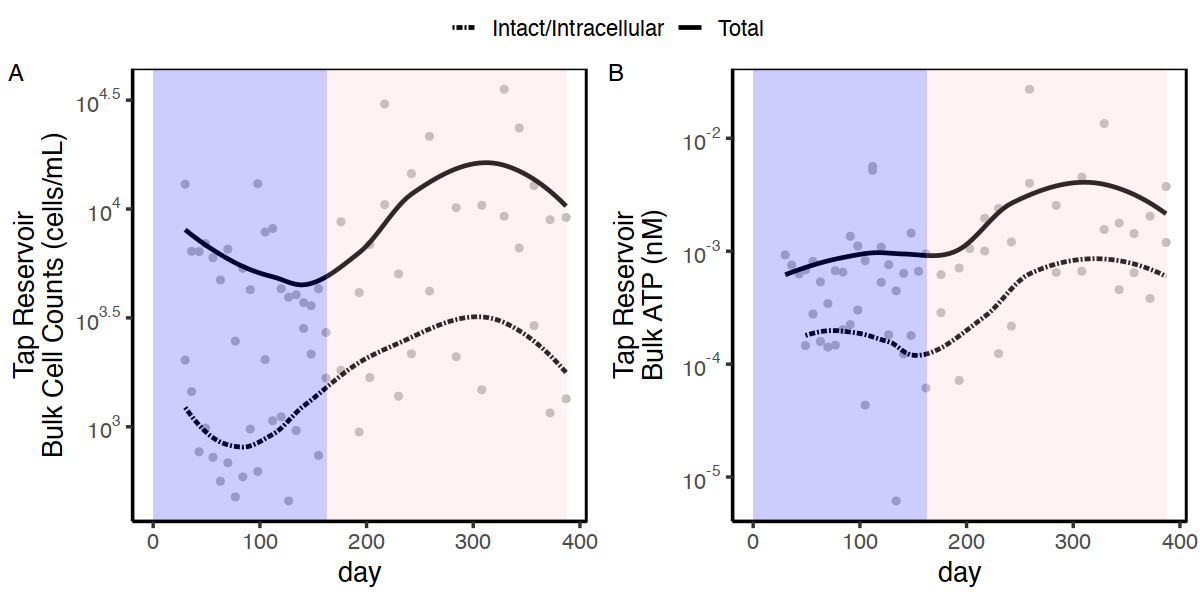

In [180]:
#arrange plots for figure together
options(repr.plot.width = 10, repr.plot.height = 5)
fig_tap<- ggarrange(fig_tap_a,fig_tap_b, ncol=2, nrow=1, labels= c("A", "B"), font.label = list(size = 14, color = "black", face = "bold", family = NULL), legend = "top", common.legend = T, align = c("hv"))
fig_tap

# ggsave(paste0(fig_dir, 'qpcr.jpeg'), width=12, height=10)

In [181]:
unique(arbf_phasetap$assay)

ERROR: Error in unique(arbf_phasetap$assay): object 'arbf_phasetap' not found


In [182]:
# make new column for AR_p1, AR_p2, and tapres
arbf$phase <- as.numeric(arbf$phase)
arbf["phase_tap"] <- arbf$phase
arbf$phase_tap[ arbf$phase == 1] <- "AR P1"
arbf$phase_tap[ arbf$phase == 2] <- "AR P2"
arbf$phase_tap[arbf$type == "tapres" & arbf$phase == 1] <- "Tap P1"
arbf$phase_tap[arbf$type == "tapres" & arbf$phase == 2] <- "Tap P2"
arbf$phase_tap <- factor(arbf$phase_tap, levels= c("Tap P1","Tap P2", "AR P1", "AR P2"))

#manipulate df to long
arbf_phasetap <- arbf %>% select(AR_num, day, type, phase, phase_tap, ICC_gmean, TCC_gmean, ATPt_avg_nM,
                                 ATPi_avg_nM,  cl_total, pH, temp, conductivity, cl_free) %>% #bf_ATPi_avg_nmol.cm2,bf_ICC_gmean, 
                        pivot_longer(cols = c( ICC_gmean,  ATPi_avg_nM, cl_total, pH, TCC_gmean, ATPt_avg_nM, temp, conductivity, cl_free), names_to = 'assay', values_to = 'value') %>% subset(!is.na(value))
df <- arbf_phasetap %>% filter(type != "evian")%>% filter(type != "tap")
# head(df)

# # then make boxplots with wq parameters
options(repr.plot.width = 10, repr.plot.height = 8)

df2 <- df %>% filter(assay== "cl_total")
a <-ggplot(df2) +
    geom_boxplot(aes(x=phase_tap, y=value, color= phase_tap))+
    ylab("Total Chlorine (mg/L)")+xlab("")
    # facet_wrap(~assay, scales= "free_y")

df2 <- df %>% filter(assay== "cl_free")
b <-ggplot(df2) +
    geom_boxplot(aes(x=phase_tap, y=value, color= phase_tap))+
    ylab("Free Chlorine (mg/L)")+xlab("")

df2 <- df %>% filter(assay== "TCC_gmean")
c <-ggplot(df2) +
    geom_boxplot(aes(x=phase_tap, y=value, color= phase_tap))+
    scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), lim= c(1E2, 1E6),labels = trans_format("log10", math_format(10^.x)))+
    ylab("TCC (cells/mL)")+xlab("")
                                        
df2 <- df %>% filter(assay== "ICC_gmean")
d <-ggplot(df2) +
    geom_boxplot(aes(x=phase_tap, y=value, color= phase_tap))+
    scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), lim= c(1E2, 1E6),labels = trans_format("log10", math_format(10^.x)))+
    ylab("ICC (cells/mL)")+xlab("")
                                        
df2 <- df %>% filter(assay== "ATPt_avg_nM")
e <-ggplot(df2) +
   geom_boxplot(aes(x=phase_tap, y=value, color= phase_tap))+
    scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x),lim= c(1E-6, 1E-1),  labels = trans_format("log10", math_format(10^.x)))+
    ylab("Total ATP (nM)")+xlab("")
                                        
df2 <- df %>% filter(assay== "ATPi_avg_nM")
f <-ggplot(df2) +
   geom_boxplot(aes(x=phase_tap, y=value, color= phase_tap))+
    scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), lim= c(1E-6, 1E-1), labels = trans_format("log10", math_format(10^.x)))+
    ylab("Intracellular ATP (nM)")+xlab("")

df2 <- df %>% filter(assay== "temp")
g <-ggplot(df2) +
   geom_boxplot(aes(x=phase_tap, y=value, color= phase_tap))+
    ylab("Temperature (C)")+xlab("")

df2 <- df %>% filter(assay== "pH")
h <-ggplot(df2) +
   geom_boxplot(aes(x=phase_tap, y=value, color= phase_tap))+
    ylab("pH")+xlab("")

# df2 <- df %>% filter(assay== "ATPi_avg_nM")
# f <-ggplot(df2) +
#    geom_boxplot(aes(x=phase_tap, y=value, color= phase_tap))+
#     scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), lim= c(1E-6, 1E-1), labels = trans_format("log10", math_format(10^.x)))+
#     ylab("Intracellular ATP (nM)")+xlab("")



Warning message:
“Removed 5 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 3 rows containing non-finite values (stat_boxplot).”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 14 rows containing non-finite values (stat_boxplot).”
Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 24 rows containing non-finite values (stat_boxplot).”


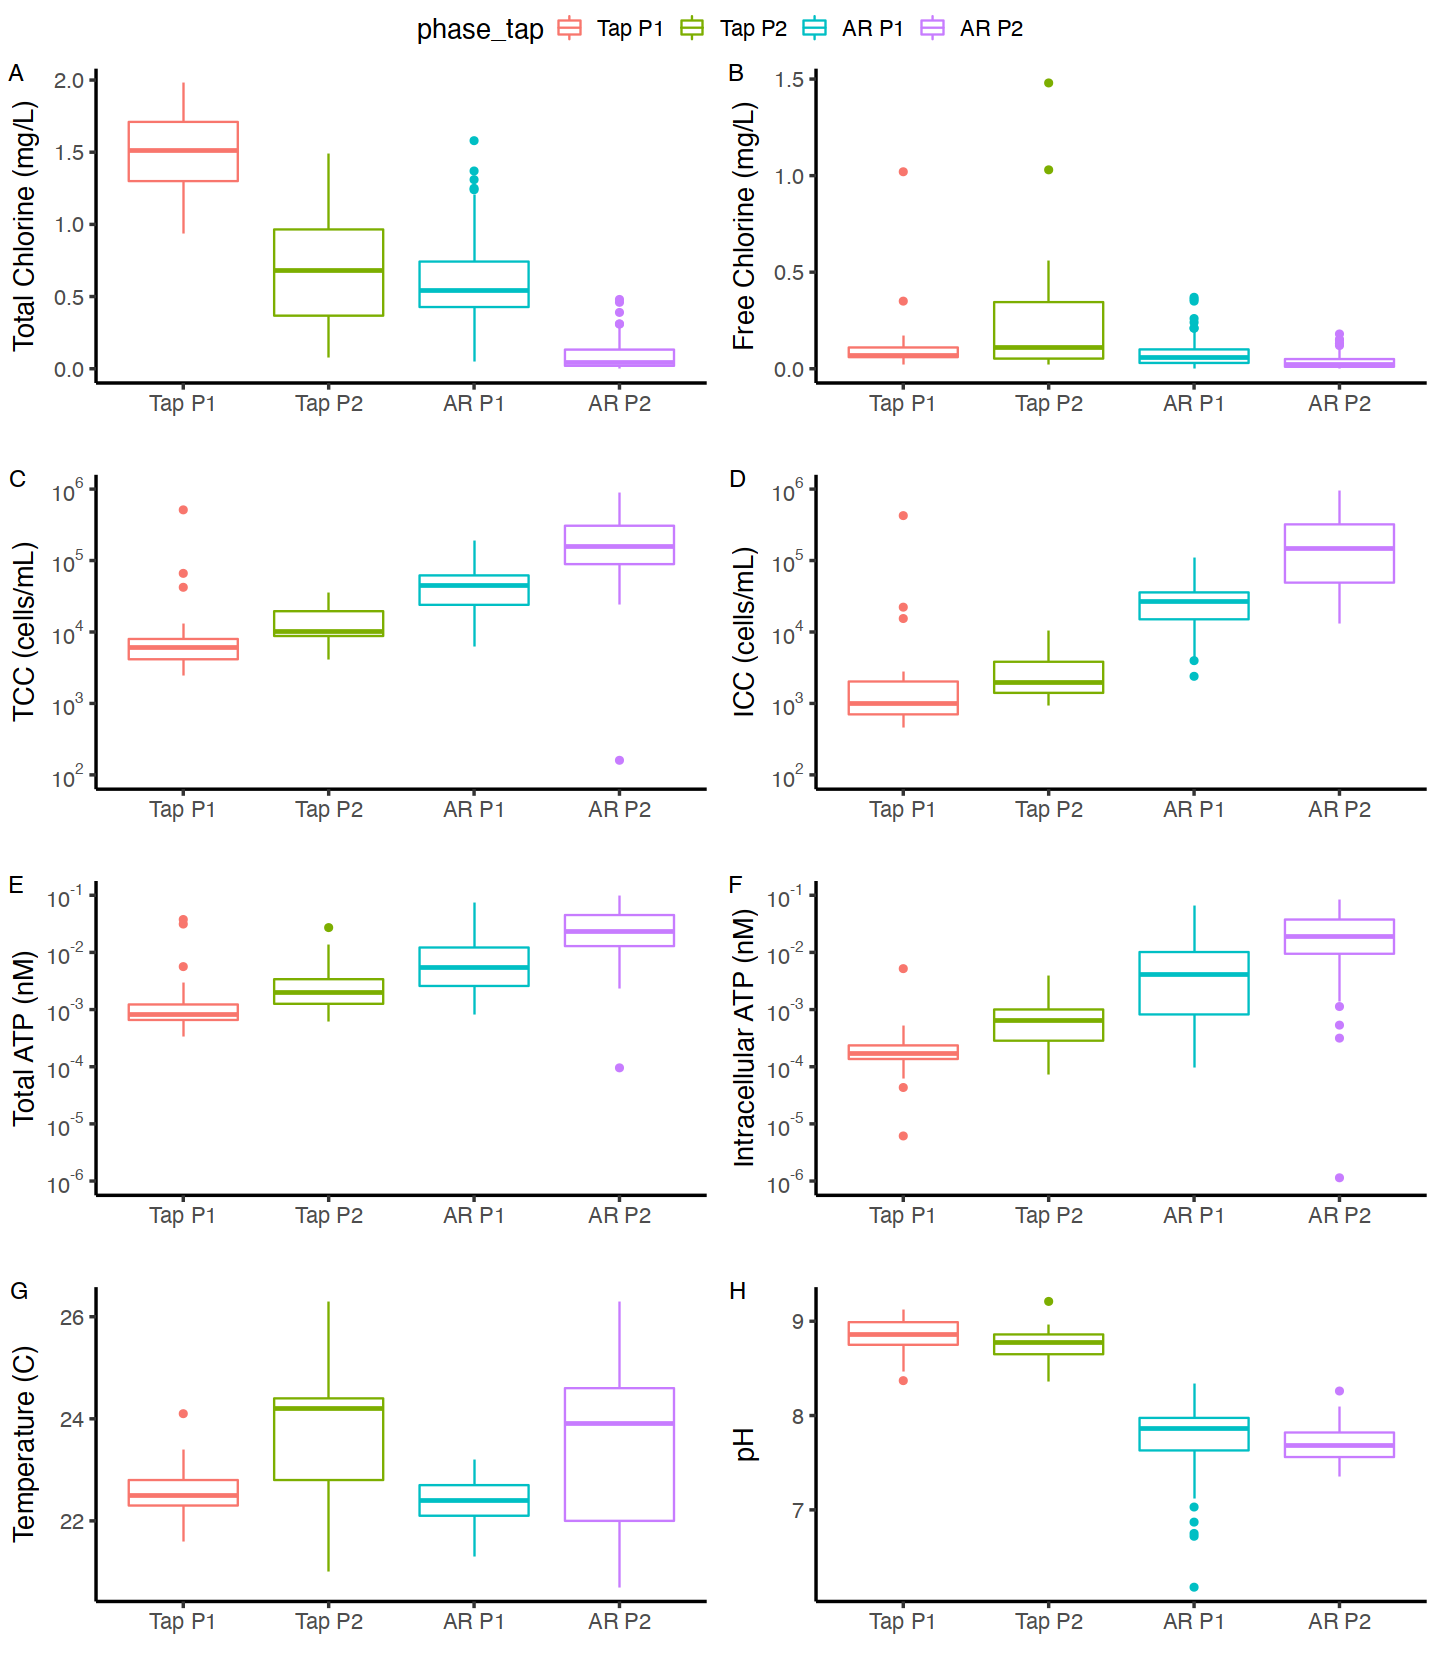

In [183]:
#arrange plots for figure together
options(repr.plot.width = 12, repr.plot.height = 14)
fig_wq_boxplot<- ggarrange(a, b, c,d,e,f,g, h, ncol=2, nrow=4, labels= c("A", "B", "C", "D", "E", "F", "G", 'H'), font.label = list(size = 14, color = "black", face = "bold", family = NULL), legend = "top", common.legend = T, align = c("hv"))
fig_wq_boxplot

# ggsave(paste0(fig_dir, 'qpcr.jpeg'), width=12, height=10)

In [184]:
# reformat

# ar_vs_bf <- arbf_long %>% pivot_wider(names_from = assay, values_from =value) %>% filter(type== "AR" | type == "BF") %>% group_by(day) # %>% unlist() 
# ar_vs_bf

ar_vs_bf <- arbf %>%  subset(type== "AR" | type == "BF") %>% select(AR_num, day, TCC_gmean, bf_TCC_gmean, ICC_gmean, bf_ICC_gmean, cl_total, cl_free, pH, temp, ATPt_avg_nM, ATPi_avg_nM, bf_ATPt_avg_nmol.cm2, bf_ATPi_avg_nmol.cm2) %>% 
            pivot_longer(cols = c(TCC_gmean, bf_TCC_gmean, ICC_gmean, bf_ICC_gmean, cl_total, cl_free, pH, temp, ATPt_avg_nM, ATPi_avg_nM, bf_ATPt_avg_nmol.cm2, bf_ATPi_avg_nmol.cm2), names_to = 'assay', values_to = 'value') %>% 
            subset(!is.na(value)) %>% pivot_wider(names_from = assay, values_from =value) %>% group_by(day, AR_num)  %>% ungroup() 

ar_vs_bf$bf_ICC_gmean[ar_vs_bf$bf_ICC_gmean == "NULL"] <- NA
ar_vs_bf$bf_ICC_gmean <- as.numeric(as.character(ar_vs_bf$bf_ICC_gmean))
ar_vs_bf$TCC_gmean <- as.numeric(as.character(ar_vs_bf$TCC_gmean))
ar_vs_bf$bf_TCC_gmean <- as.numeric(as.character(ar_vs_bf$bf_TCC_gmean))
ar_vs_bf$ICC_gmean <- as.numeric(as.character(ar_vs_bf$ICC_gmean))
ar_vs_bf$pH <- as.numeric(as.character(ar_vs_bf$pH))
ar_vs_bf$temp <- as.numeric(as.character(ar_vs_bf$temp))
ar_vs_bf$cl_total <- as.numeric(as.character(ar_vs_bf$cl_total))
ar_vs_bf$cl_free <- as.numeric(as.character(ar_vs_bf$cl_free))
ar_vs_bf$ATPi_avg_nM <- as.numeric(as.character(ar_vs_bf$ATPi_avg_nM))
ar_vs_bf$bf_ATPt_avg_nmol.cm2 <- as.numeric(as.character(ar_vs_bf$bf_ATPt_avg_nmol.cm2))
ar_vs_bf$bf_ATPi_avg_nmol.cm2 <- as.numeric(as.character(ar_vs_bf$bf_ATPi_avg_nmol.cm2))
ar_vs_bf$ATPt_avg_nM <- as.numeric(as.character(ar_vs_bf$ATPt_avg_nM))
head(ar_vs_bf)


Warning message:
“Values from `value` are not uniquely identified; output will contain list-cols.
* Use `values_fn = list` to suppress this warning.
* Use `values_fn = {summary_fun}` to summarise duplicates.
* Use the following dplyr code to identify duplicates.
  {data} %>%
    dplyr::group_by(AR_num, day, assay) %>%
    dplyr::summarise(n = dplyr::n(), .groups = "drop") %>%
    dplyr::filter(n > 1L)”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coer

AR_num day cl_total TCC_gmean ICC_gmean  pH   temp ATPt_avg_nM  cl_free
1 5      3   0.65            NA         NA   NA   NA           NA NA     
2 1      8   0.31      10885.43   5038.677 7.85 22.5 0.0009736204 NA     
3 2      8   0.63      20209.27   8364.591 8.01 22.1 0.0011254745 NA     
4 3      8   0.45      20362.46  11871.064 7.95 22.3 0.0011174622 NA     
5 4      8   0.64      10374.88   6085.975 7.87 22.1 0.0010242258 NA     
6 5      8   0.55     189220.65 110654.603 6.18 21.7 0.0008101583 NA     
  ATPi_avg_nM bf_TCC_gmean bf_ICC_gmean bf_ATPt_avg_nmol.cm2
1 NA          NA           NA           NA                  
2 NA          NA           NA           NA                  
3 NA          NA           NA           NA                  
4 NA          NA           NA           NA                  
5 NA          NA           NA           NA                  
6 NA          NA           NA           NA                  
  bf_ATPi_avg_nmol.cm2
1 NA                  
2 NA                  
3 NA                  
4 NA                  
5 NA                  
6 NA

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 158 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 158 rows containing missing values (geom_point).”


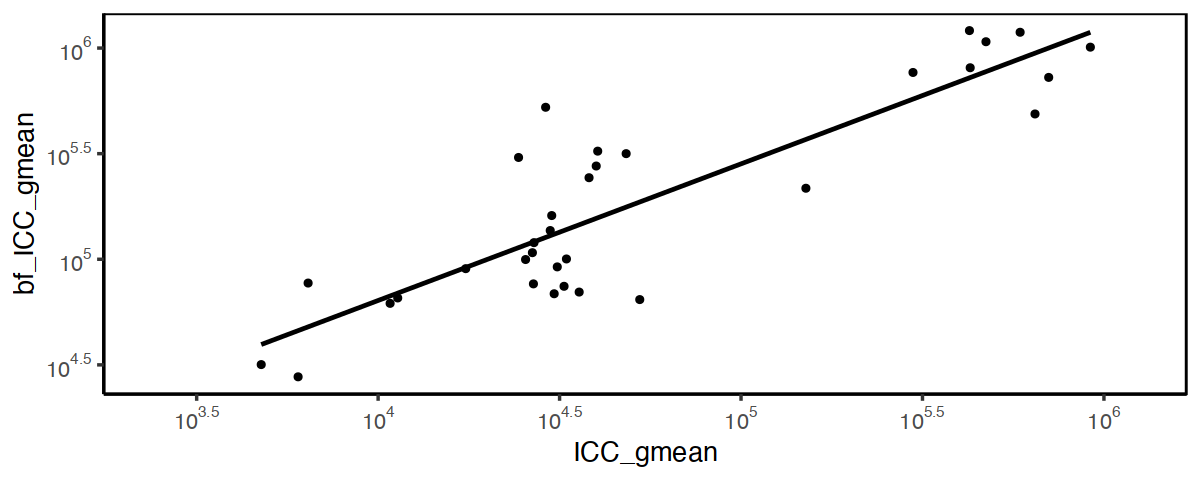

In [185]:
## plot biofilm parameters versus bulk water parameters

options(repr.plot.width = 10, repr.plot.height = 4)

fig_3 <-ggplot(ar_vs_bf, aes(x= ICC_gmean, y= bf_ICC_gmean))+
    geom_point()+
    geom_smooth(method= "lm", se=FALSE, lwd=1, color= "black")+
    scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), labels = trans_format("log10", math_format(10^.x)))+
    scale_x_log10(breaks = trans_breaks("log10", function(x) 10^x), labels = trans_format("log10", math_format(10^.x)))+
    # ylab("Biofilm ATP (nmol/cm2)")+
     theme(panel.background=element_blank(),legend.position="none", panel.border=element_rect(color = "black", fill = NA))
fig_3                            


### ATP per cell

Warning message:
“Ignoring unknown aesthetics: method”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 142 rows containing non-finite values (stat_smooth).”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 42 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 142 rows containing missing values (geom_point).”
Warning message:
“Removed 42 rows containing missing values (geom_point).”


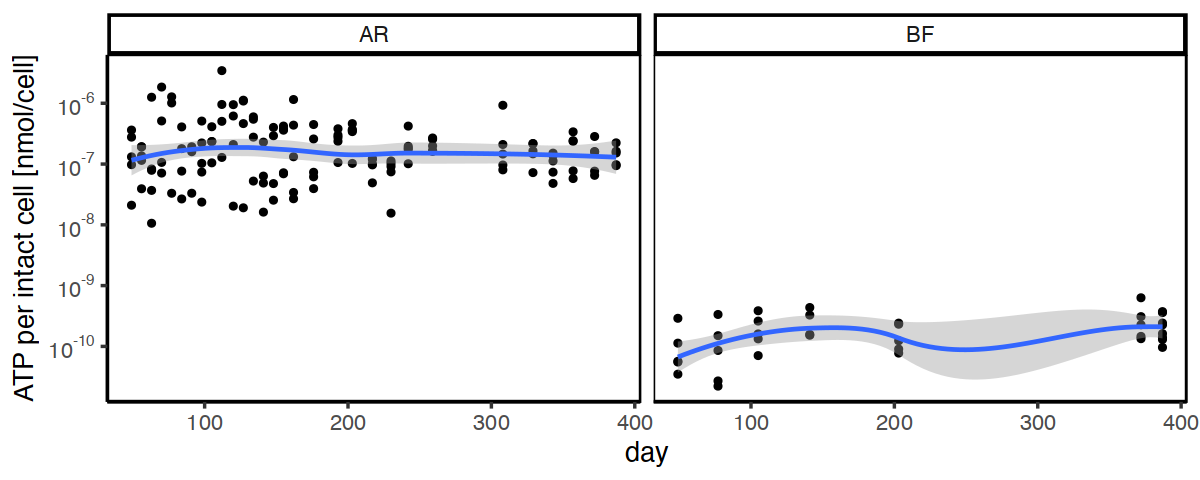

In [186]:
# Activity per cell
df<- arbf %>% subset(type == "BF" | type == "AR" ) %>% filter(ATPi_avg_nM >0 | bf_ATPi_avg_nmol.cm2>0) 
plot34 <- ggplot(df)+
geom_point(aes(x=day, y=bf_ATPi_avg_nmol.cm2/bf_ICC_gmean), color= "black")+
geom_smooth(method= "loess", aes(x=day, y=bf_ATPi_avg_nmol.cm2/bf_ICC_gmean))+
geom_point(aes(x=day, y=ATPi_avg_nM/ICC_gmean), color= 'black')+
geom_smooth(aes(method= "loess", x=day, y=ATPi_avg_nM/ICC_gmean))+
scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), labels = trans_format("log10", math_format(10^.x)))+
                                    facet_wrap(~type, scales= "fixed")+
                                    # ylim(c(0,2E-6))+
                                    ylab("ATP per intact cell [nmol/cell]")+
                                    theme(panel.background=element_blank(), panel.border=element_rect(color = "black", fill = NA))  

plot34

In [187]:
# # Plot tapres and tap over time to show similarity
## Plot time series of bulk water parameters in linear scale

a <- arbf_long %>% subset(assay == "ICC_gmean" ) %>% subset(type == "tapres" | type == "tap")%>% filter(day > 22)
a$type <- factor(a$type, levels= c("tap", "tapres"))

options(repr.plot.width = 10, repr.plot.height = 4)
fig_b <- ggplot(a, aes(x= day, y= value))+
    geom_point( aes(shape= type))+
    geom_smooth(method= "loess", se=TRUE, lwd=1, color= "black", aes(linetype = type))+
    scale_linetype_manual(values=c("twodash", "solid"))+
    scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), labels = trans_format("log10", math_format(10^.x)))+
    annotate("rect", xmin = 0, xmax = 162, ymin = 0, ymax = Inf, alpha = 0.2, fill = "blue") +
    annotate("rect", xmin = 162, xmax = 387, ymin = 0, ymax = Inf, alpha = 0.2, fill = "pink") +
    ylab("Intact Cell Counts\n(cells/mL)")+ labs(linetype='') +
    # facet_wrap(~assay, nrow=2, scales= "free_y")+
     theme(panel.background=element_blank(),legend.position="right", panel.border=element_rect(color = "black", fill = NA))

a <- arbf_long %>% subset(assay == "cl_total" ) %>% subset(type == "tapres" | type == "tap")%>% filter(day > 22)
a$type <- factor(a$type, levels= c("tap", "tapres"))
fig_a <- ggplot(a, aes(x= day, y= value))+
    geom_point( aes(shape= type))+
    geom_smooth(method= "loess", se=TRUE, lwd=1, color= "black", aes(linetype= type))+
    scale_linetype_manual(values=c("twodash", "solid"))+
#     geom_rect(aes(xmin=0,xmax=50,ymin=-Inf,ymax=Inf),alpha=0.1,fill="green")+
# scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), labels = trans_format("log10", math_format(10^.x)))+
    annotate("rect", xmin = 0, xmax = 162, ymin = 0, ymax = Inf, alpha = 0.2, fill = "blue") +
    annotate("rect", xmin = 162, xmax = 387, ymin = 0, ymax = Inf, alpha = 0.2, fill = "pink") +
    # facet_wrap(~assay, scales= "free_y", ncol=1)+
    ylab("Total Chlorine\n(mg/L)")+ labs(linetype='') +
    theme(panel.background=element_blank(),legend.position="top", panel.border=element_rect(color = "black", fill = NA))
                                        
#Tapres was a bit more stabilized than tap bc of the mixing

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 9 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 9 rows containing missing values (geom_point).”


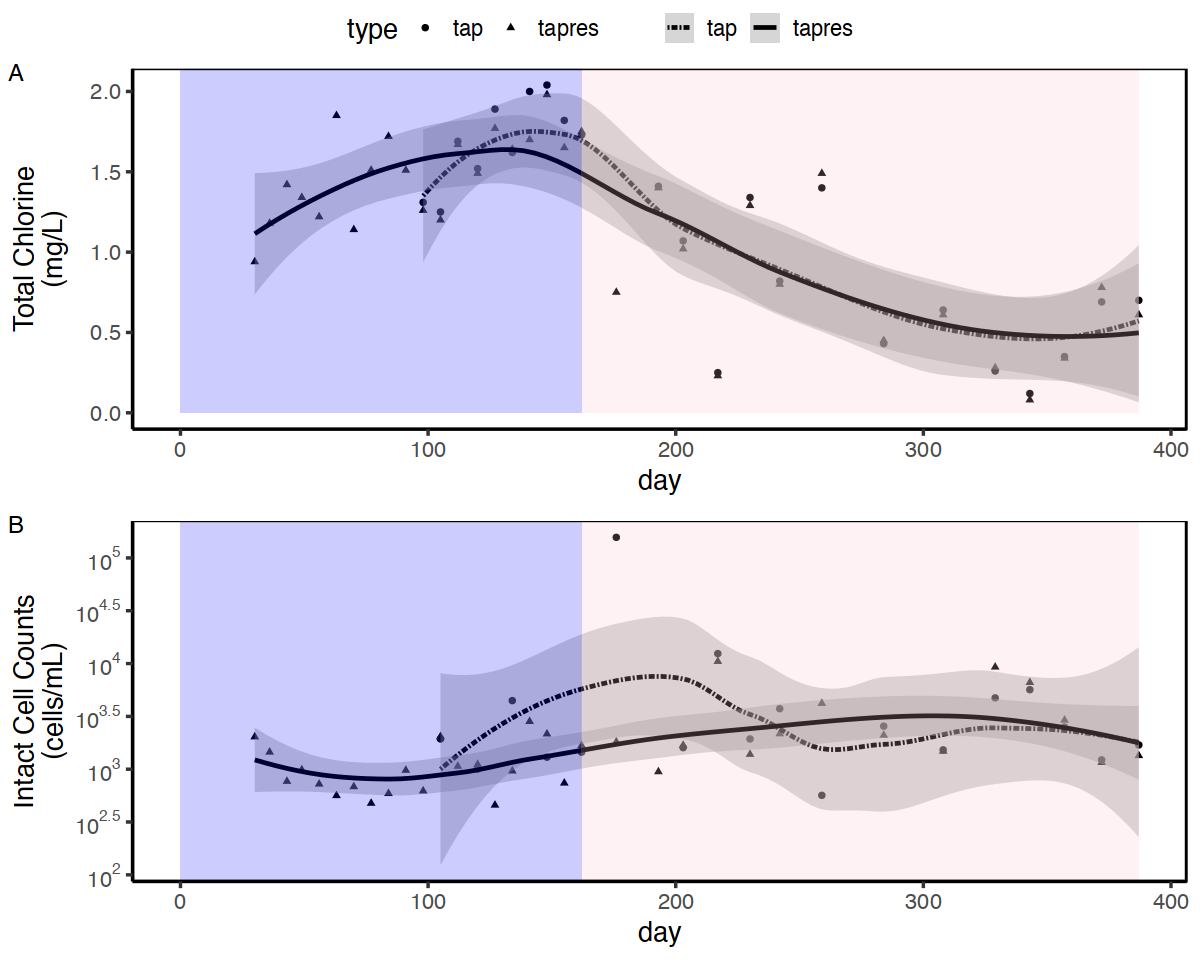

In [188]:
#arrange plots for figure together
options(repr.plot.width = 10, repr.plot.height = 8)
fig_tap<- ggarrange(fig_a,fig_b, ncol=1, nrow=2, labels= c("A", "B"), font.label = list(size = 14, color = "black", face = "bold", family = NULL), legend = "top", common.legend = T, align = c("hv"))
fig_tap

# ggsave(paste0(fig_dir, 'qpcr.jpeg'), width=12, height=10)

### Water Use Plots

In [189]:
water_use$month_date <- as.Date(water_use$month_date, format= "%y-%m-%d")
ars_start_date= as.Date("9/30/2019", "%m/%d/%Y")
ars_end_date= as.Date("10/20/2020", "%m/%d/%Y")
close_date

#average water use in the phases
water_use %>% filter(month_date < close_date & month_date > ars_start_date) %>% dplyr::summarise(water_p1= mean(water_use_gal))
water_use %>% filter(month_date > close_date & month_date < ars_end_date) %>% dplyr::summarise(water_p1= mean(water_use_gal))

water_use[water_use$year == 2020,]


[1] "2020-03-10"

water_p1
1 23387.85

water_p1
1 10209.85

year month month_date water_use_CF water_use_rel_prior_year water_use_gal
1  2020 JAN   2020-01-01 2274.000     0.961522199              17010.7025   
2  2020 FEB   2020-02-01 3421.000     1.119437173              25590.8589   
3  2020 MAR   2020-03-01 2874.000     0.706663388              21499.0145   
4  2020 APR   2020-04-01  697.000     0.064964116               5213.9224   
5  2020 MAY   2020-05-01   18.000     0.006170723                134.6494   
6  2020 JUN   2020-06-01  664.000     0.257864078               4967.0653   
7  2020 JUL   2020-07-01 1808.499     0.617024711              13528.5161   
8  2020 AUG   2020-08-01 2523.786     1.238364184              18879.2332   
9  2020 SEP   2020-09-01 2021.334     0.729196895              15120.6279   
10 2020 OCT   2020-10-01 1821.390     0.518176387              13624.9443   
11 2020 NOV   2020-11-01 1794.884     0.867513041              13426.6693   
12 2020 DEC   2020-12-01 1549.503     0.336409609              11591.0856

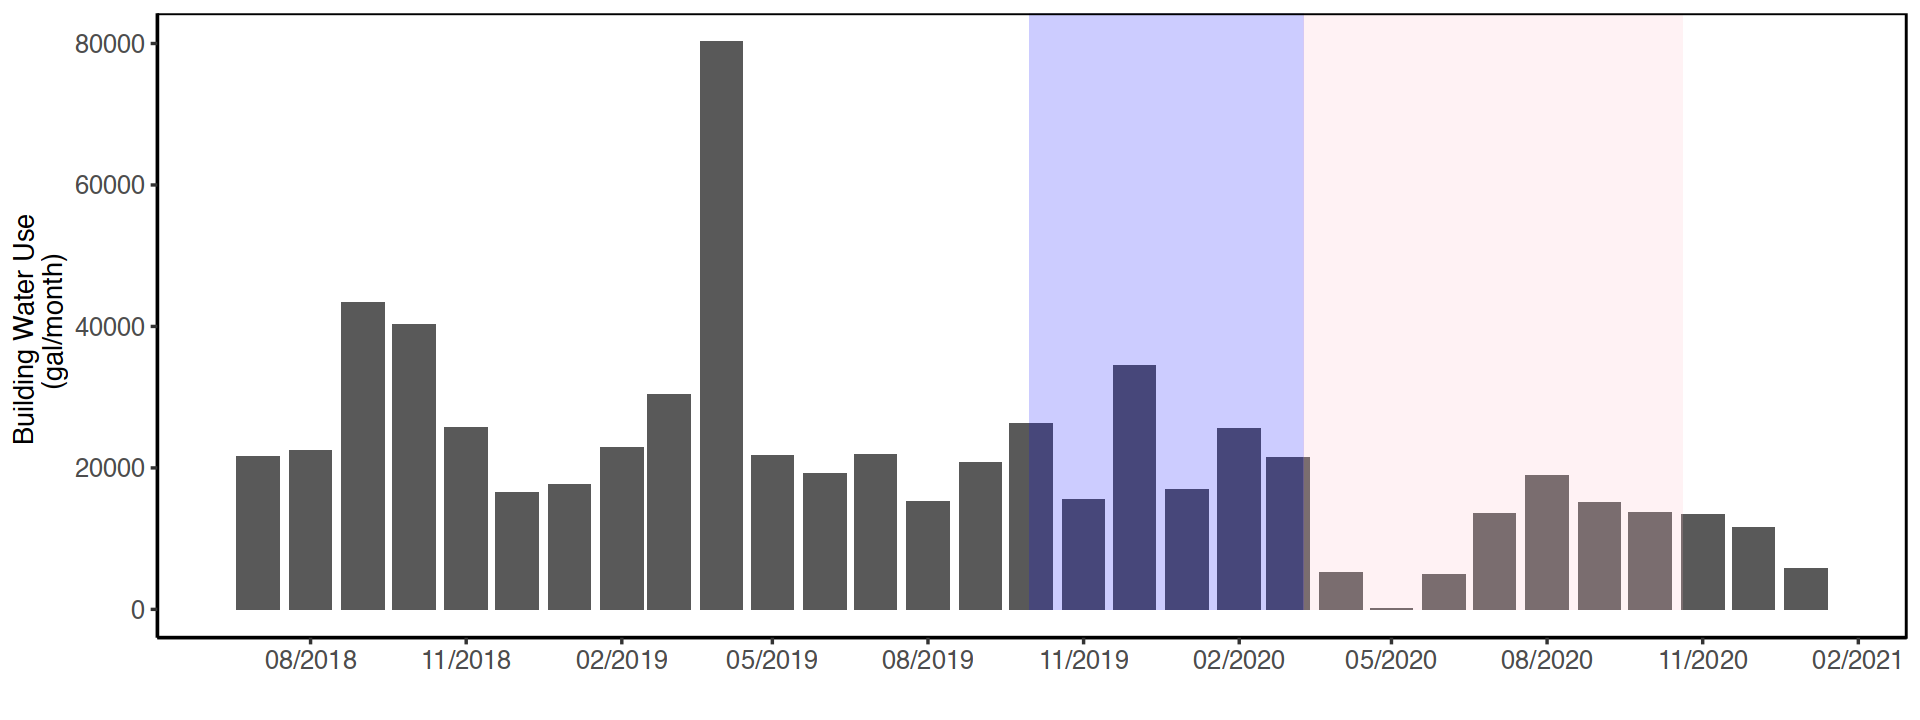

In [190]:
## plot cell counts versus percent water usage
a <- water_use
a$month_date <- as.Date(a$month_date)

options(repr.plot.width = 16, repr.plot.height = 6)
fig_3 <-ggplot(a, aes(x= month_date,  y= water_use_gal))+
    geom_bar(stat='identity')+
    scale_x_date(
        date_breaks = "3 month", 
        labels = date_format("%m/%Y"))+
     annotate("rect", xmin = ars_start_date, xmax = close_date, ymin = 0, ymax = Inf, alpha = 0.2, fill = "blue") +
    annotate("rect", xmin = close_date, xmax =  ars_end_date, ymin = 0, ymax = Inf, alpha = 0.2, fill = "pink") +
    # geom_smooth(method= "loess", se=FALSE, lwd=1, color= "black")+
    # scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), labels = trans_format("log10", math_format(10^.x)))+
    ylab("Building Water Use \n (gal/month)")+
    xlab("")+
     theme(panel.background=element_blank(),axis.text=element_text(size=15),legend.position="none", panel.border=element_rect(color = "black", fill = NA))
fig_3   
ggsave(file= paste0(fig_dir, 'wateruse_barplot.png'),device= "png", width=16, height=6)


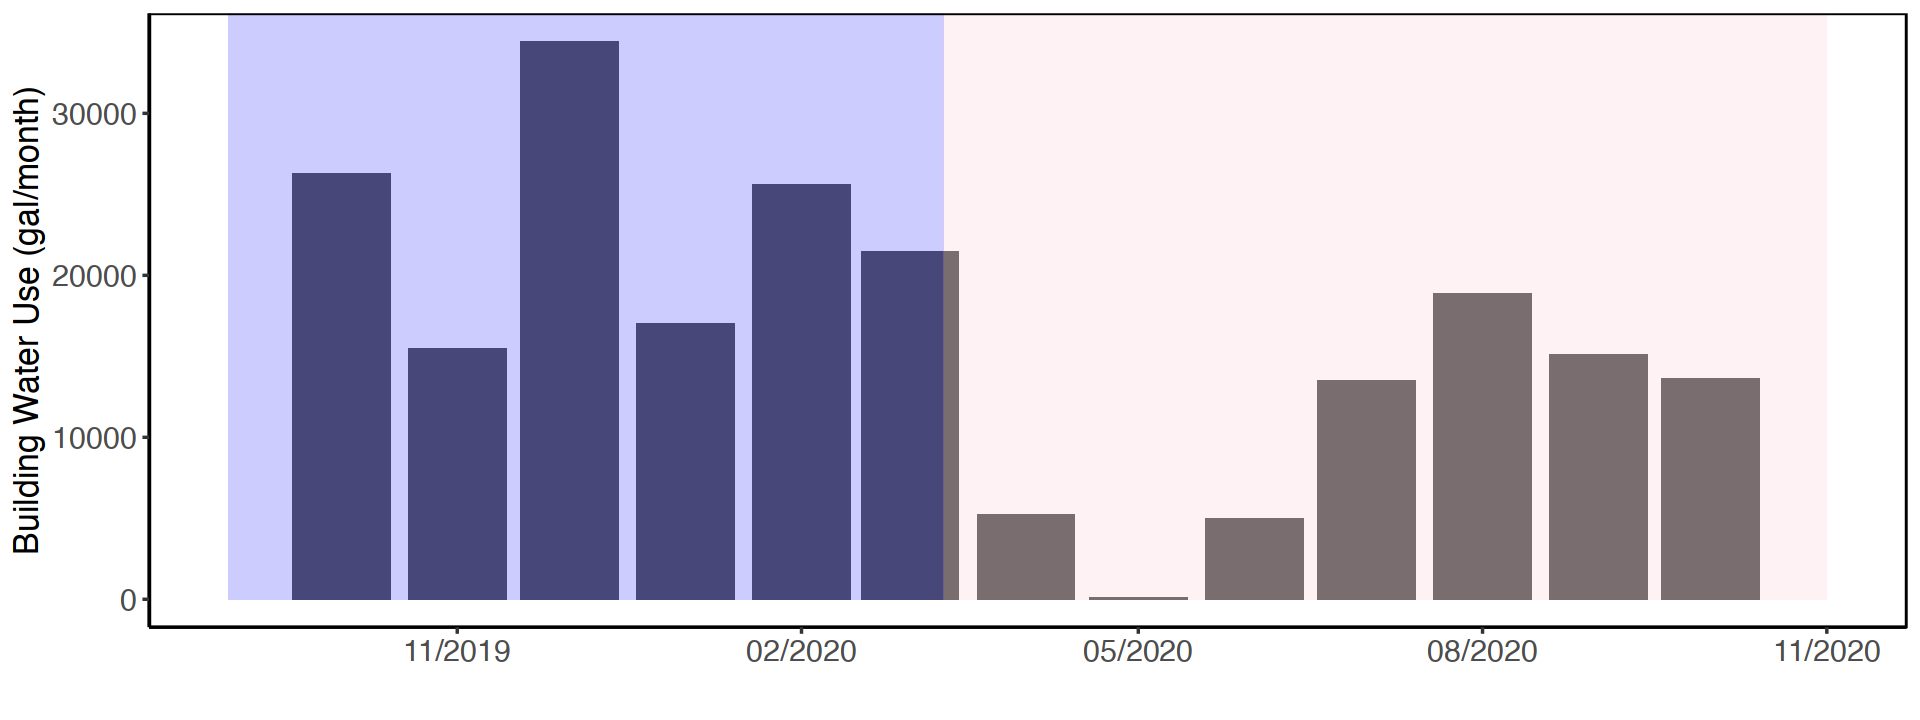

In [191]:
## for TOC Figure

a <- water_use
# a$month_date <- as.Date(a$month_date)
a <- a %>% filter(month_date < ars_end_date & month_date > ars_start_date) 

options(repr.plot.width = 16, repr.plot.height = 6)
fig_3 <-ggplot(a, aes(x= month_date,  y= water_use_gal))+
    geom_bar(stat='identity')+
    scale_x_date(
        date_breaks = "3 month", 
        labels = date_format("%m/%Y"))+
     annotate("rect", xmin = as.Date('09/01/19', format = "%m/%d/%y"), xmax = close_date, ymin = 0, ymax = Inf, alpha = 0.2, fill = "blue") +
    annotate("rect", xmin = close_date, xmax =  as.Date('11/01/20', format = "%m/%d/%y"), ymin = 0, ymax = Inf, alpha = 0.2, fill = "pink") +
    # geom_smooth(method= "loess", se=FALSE, lwd=1, color= "black")+
    # scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), labels = trans_format("log10", math_format(10^.x)))+
    ylab("Building Water Use (gal/month)")+
    xlab("")+
     theme(panel.background=element_blank(),axis.title= element_text(size= 20), axis.text=element_text(size=18),legend.position="none", panel.border=element_rect(color = "black", fill = NA))
fig_3   
ggsave(file= paste0(fig_dir, 'wateruse_barplot_TOC.png'),device= "png", width=16, height=6)


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 15 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 15 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 15 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 15 rows containing missing values (geom_point).”


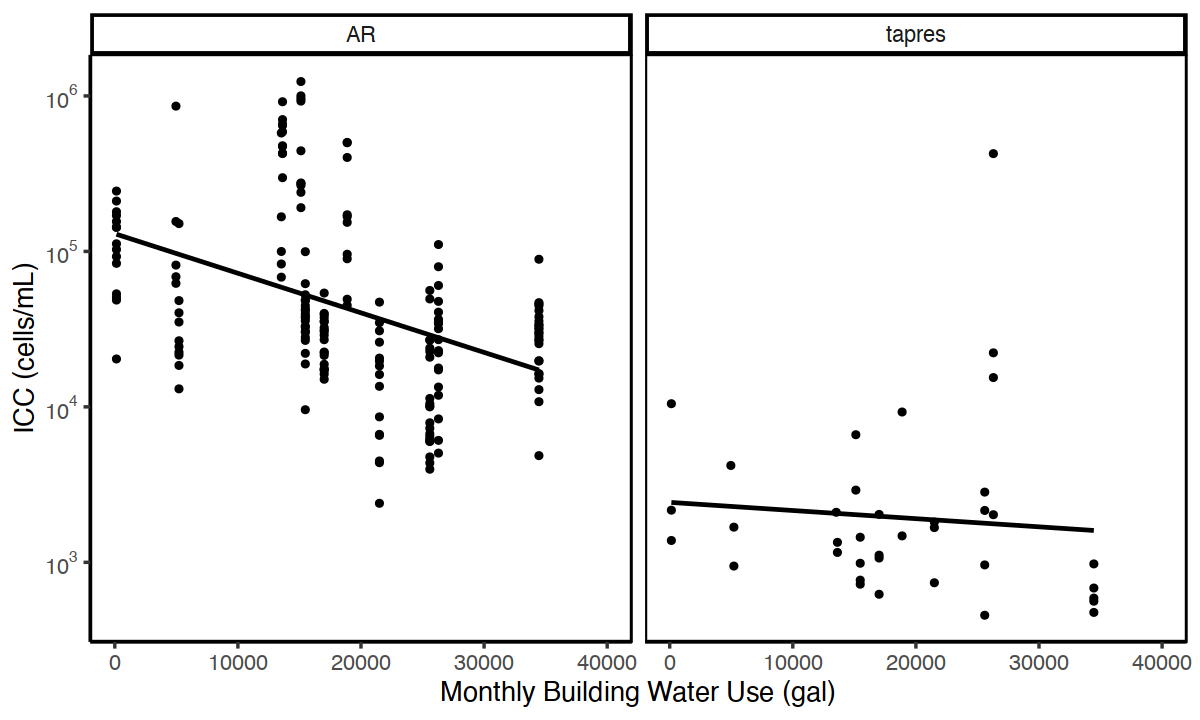

In [192]:
a <- arbf_wateruse %>% filter(type== "AR" | type == "tapres")
# a$water_use_gal <- as.character(a$water_use_gal)

options(repr.plot.width = 10, repr.plot.height = 6)
fig_4 <-ggplot(a, aes(x= water_use_gal, y= ICC_gmean))+
    geom_point()+
    geom_smooth(method= "lm", se=FALSE, lwd=1, color= "black")+
    xlim(c(0, 40000))+
    facet_wrap(~type)+
    ylab("ICC (cells/mL)")+ xlab("Monthly Building Water Use (gal)")+
    scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), labels = trans_format("log10", math_format(10^.x)))+
    # ylab("Biofilm ATP (nmol/cm2)")+
     theme(panel.background=element_blank(),legend.position="none", panel.border=element_rect(color = "black", fill = NA))
fig_4
ggsave(file= paste0(fig_dir, 'wateruse_ICC.png'),device= "png", width=10, height=6)

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 177 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 177 rows containing missing values (geom_point).”


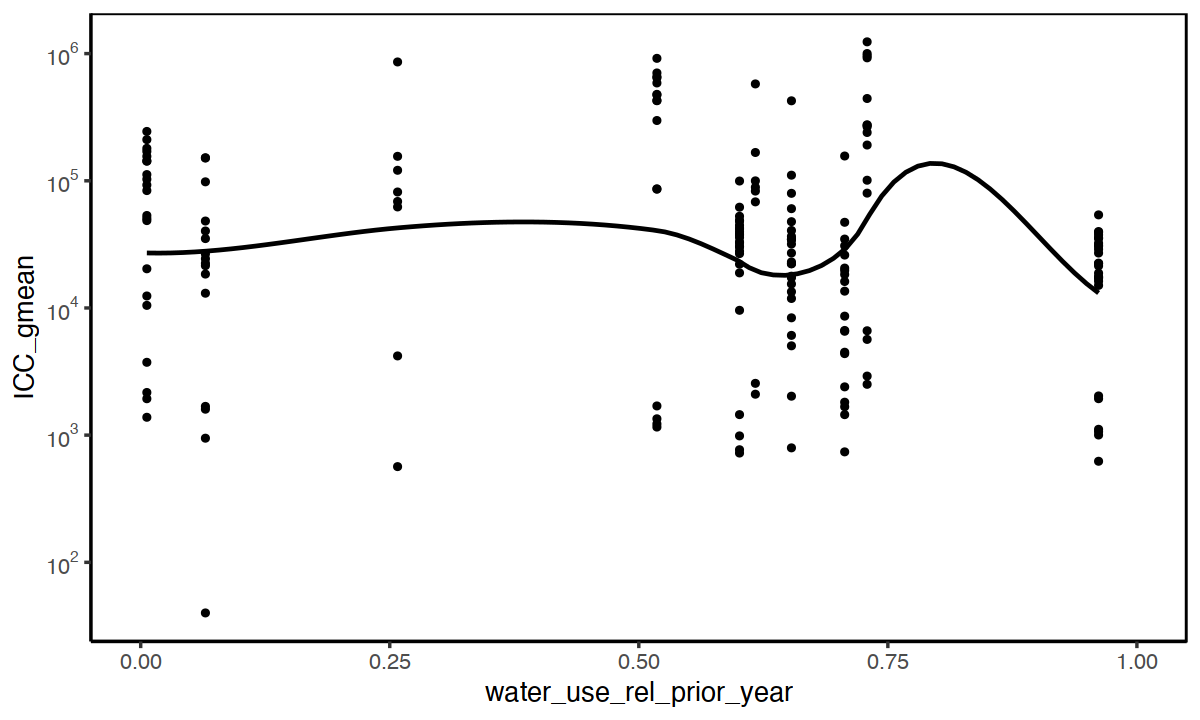

In [193]:
# a <- arbf_wateruse
# a$water_use_gal <- as.character(a$water_use_gal)

fig_4 <-ggplot(arbf_wateruse, aes(x= water_use_rel_prior_year, y= ICC_gmean))+
    geom_point()+
    geom_smooth(method= "loess", se=FALSE, lwd=1, color= "black")+
    xlim(c(0, 1))+
    scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), labels = trans_format("log10", math_format(10^.x)))+
    # ylab("Biofilm ATP (nmol/cm2)")+
     theme(panel.background=element_blank(),legend.position="none", panel.border=element_rect(color = "black", fill = NA))
fig_4

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 16 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 16 rows containing missing values (geom_point).”


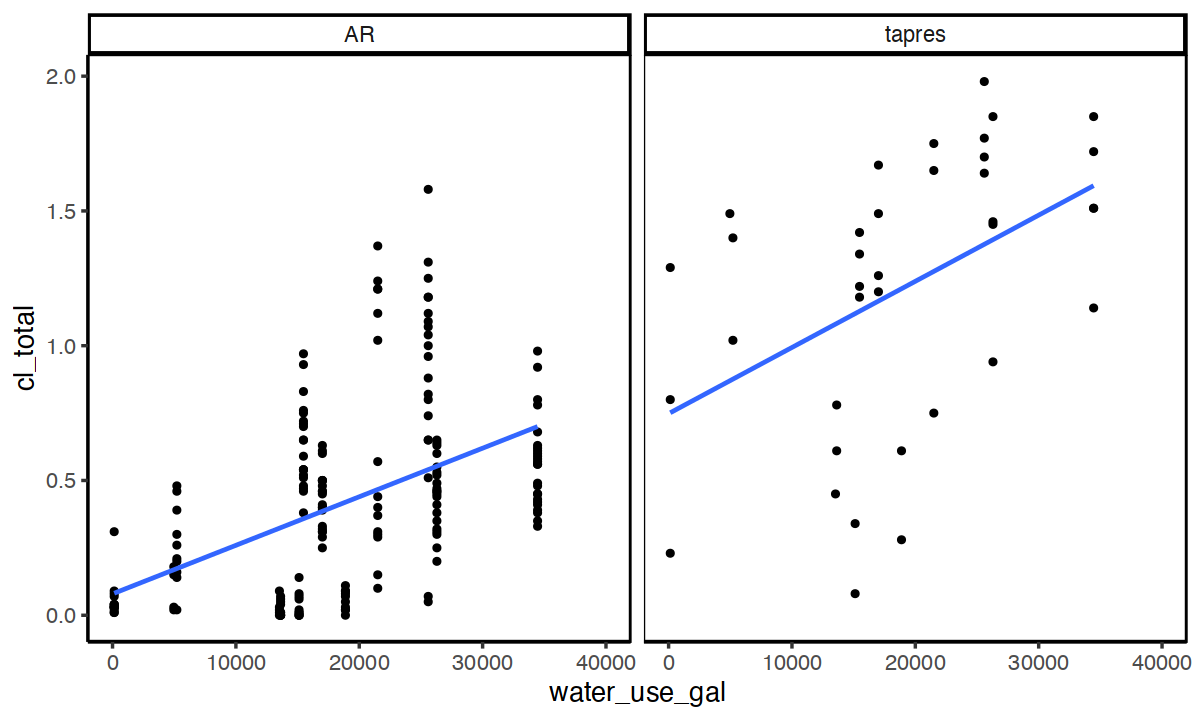

In [194]:
a <- arbf_wateruse %>% filter(type== "AR" | type == "tapres")
a$water_use_gal <- as.numeric(a$water_use_gal)

fig_4 <-ggplot(a, aes(x= water_use_gal, y= cl_total))+
    geom_point(color= "black")+
    geom_smooth(method= "lm", se=FALSE, lwd=1)+
    xlim(c(0, 40000))+
    facet_wrap(~type, ncol= 2)+
    # scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), labels = trans_format("log10", math_format(10^.x)))+
    # ylab("Biofilm ATP (nmol/cm2)")+
     theme(panel.background=element_blank(),legend.position="right", panel.border=element_rect(color = "black", fill = NA))
fig_4

# 9. Normality and Correlations

In [195]:
# check normality
shapiro.test((arbf$ICC_gmean)) #nonnormal , p-2.2e-16 then 
shapiro.test(log10(arbf$ICC_gmean)) #nonnormal even after log normalizing, p= 0.001337
shapiro.test((arbf$bf_ICC_gmean)) #nonnormal p-1.414e-5
shapiro.test(log10(arbf$bf_ICC_gmean)) #normal after log normalizing, p= 0.1102

# library("car")
# qqPlot(arbf$ICC_gmean)



	Shapiro-Wilk normality test

data:  (arbf$ICC_gmean)
W = 0.50317, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  log10(arbf$ICC_gmean)
W = 0.98025, p-value = 0.001337



	Shapiro-Wilk normality test

data:  (arbf$bf_ICC_gmean)
W = 0.81501, p-value = 1.414e-05



	Shapiro-Wilk normality test

data:  log10(arbf$bf_ICC_gmean)
W = 0.95471, p-value = 0.1102


In [196]:
unique(colnames(arbf))

[1] "sample_id"             "ARBF"                  "type"                 
 [4] "day"                   "sample_id_old"         "month_date"           
 [7] "sample_date"           "sampling_week"         "AR_num"               
[10] "AR"                    "phase"                 "replicate"            
[13] "sampling_event"        "water_use"             "extr_date"            
[16] "extr_notes"            "qubit_clean"           "qubit_nguL"           
[19] "sterivex_date"         "sterivex_filtered_vol" "bf_total_homog_vol"   
[22] "shear_rpm"             "pH"                    "conductivity"         
[25] "DO"                    "temp"                  "cl_total"             
[28] "cl_free"               "FCM_vol"               "TCC1"                 
[31] "TCC2"                  "TCC3"                  "ICC1"                 
[34] "ICC2"                  "ICC3"                  "FCM_dilution"         
[37] "ICC_avg"               "TCC_avg"               "ICC_cells.mL"         
[40] "TCC_cells.mL"          "bf_fcm_dilution"       "bf_TCC1"              
[43] "bf_TCC2"               "bf_TCC3"               "bf_ICC1"              
[46] "bf_ICC2"               "bf_ICC3"               "bf_TCC_avg"           
[49] "bf_ICCavg (cells/mL)"  "ATPt1"                 "ATPt2"                
[52] "ATPt3"                 "bf_ATPt_avg_nmol.cm2"  "ATPt_std_RLU"         
[55] "ATPt_avg_RLU"          "ATPt_avg_nM"           "ATPe1"                
[58] "ATPe2"                 "ATPe3"                 "ATPe_avg_RLU"         
[61] "bf_ATPe_avg_nmol.cm2"  "bf_ATPi_avg_nmol.cm2"  "ATPe_avg_nM"          
[64] "ATPi_avg_nM"           "flow_rate_mL.min"      "residence_time_h"     
[67] "length.cm"             "8/27/2019"             "9/30/2019"            
[70] "TCC1_cells.mL"         "TCC2_cells.mL"         "TCC3_cells.mL"        
[73] "ICC1_cells.mL"         "ICC2_cells.mL"         "ICC3_cells.mL"        
[76] "TCC_gmean"             "TCC_gstdv"             "ICC_gmean"            
[79] "ICC_gstdv"             "TCC1_cells.cm2"        "TCC2_cells.cm2"       
[82] "TCC3_cells.cm2"        "ICC1_cells.cm2"        "ICC2_cells.cm2"       
[85] "ICC3_cells.cm2"        "bf_TCC_gmean"          "bf_TCC_gstdv"         
[88] "bf_ICC_gmean"          "bf_ICC_gstdv"          "phase_tap"

In [197]:
# Find averages of ICC in each reactor over experiment

arbf %>% filter(type == "AR") %>% group_by(AR_num) %>% dplyr::summarize(ICC= Gmean(ICC_gmean, na.rm= TRUE))

AR_num ICC     
1 1      40397.90
2 2      65848.19
3 3      36399.68
4 4      25864.53
5 5      57598.32

In [198]:
# Test correlations of variables between bulk and biofilm

keep= c("ICC_gmean", "bf_ICC_gmean")
df_corr <- ar_vs_bf  %>% select(all_of(keep))%>% drop_na() 
M <-cor(df_corr, method="kendall")
M

res1 <- cor.mtest(df_corr, method ="kendall", conf.level = .95)
res1$p


ICC_gmean bf_ICC_gmean
ICC_gmean    1.0000000 0.5757576   
bf_ICC_gmean 0.5757576 1.0000000

ICC_gmean    bf_ICC_gmean
ICC_gmean    0.000000e+00 5.802863e-07
bf_ICC_gmean 5.802863e-07 0.000000e+00

In [199]:
# Test correlations of variables between tap and tap res

keep= c("ICC_gmean", "cl_total", "pH", "type", "day", "temp")
df_corr <- arbf  %>% select(all_of(keep))%>% subset(type == "tap" | type == "tapres") %>% subset(day>50)%>% drop_na() %>% pivot_wider(names_from= type, values_from = c(ICC_gmean, cl_total, pH, temp)) %>% dplyr::select(-day) %>% drop_na() %>% mutate(ICC_gmean_tapres = log10(ICC_gmean_tapres), ICC_gmean_tap= log10(ICC_gmean_tap))
M <-cor(df_corr, method="pearson")
M

res1 <- cor.mtest(df_corr, method ="pearson", conf.level = .95)
res1$p
# df_corr


ICC_gmean_tapres ICC_gmean_tap cl_total_tapres cl_total_tap
ICC_gmean_tapres  1.00000000       0.56446933   -0.5622754      -0.5722795  
ICC_gmean_tap     0.56446933       1.00000000   -0.5937424      -0.5793771  
cl_total_tapres  -0.56227538      -0.59374241    1.0000000       0.9964764  
cl_total_tap     -0.57227951      -0.57937714    0.9964764       1.0000000  
pH_tapres         0.12759024      -0.40225367    0.5094780       0.4907720  
pH_tap           -0.05291474      -0.24911483    0.5334567       0.5196700  
temp_tapres       0.41124085       0.04861086   -0.5358868      -0.5619506  
temp_tap          0.42304008       0.09814467   -0.5147789      -0.5385857  
                 pH_tapres  pH_tap      temp_tapres temp_tap   
ICC_gmean_tapres  0.1275902 -0.05291474  0.41124085  0.42304008
ICC_gmean_tap    -0.4022537 -0.24911483  0.04861086  0.09814467
cl_total_tapres   0.5094780  0.53345669 -0.53588676 -0.51477889
cl_total_tap      0.4907720  0.51967004 -0.56195059 -0.53858572
pH_tapres         1.0000000  0.76749926 -0.33754936 -0.35321303
pH_tap            0.7674993  1.00000000 -0.47180414 -0.52551878
temp_tapres      -0.3375494 -0.47180414  1.00000000  0.97249686
temp_tap         -0.3532130 -0.52551878  0.97249686  1.00000000

ICC_gmean_tapres ICC_gmean_tap cl_total_tapres cl_total_tap
ICC_gmean_tapres 0.00000000       0.02836965    2.912780e-02    2.579124e-02
ICC_gmean_tap    0.02836965       0.00000000    1.961665e-02    2.360594e-02
cl_total_tapres  0.02912780       0.01961665    0.000000e+00    2.213597e-15
cl_total_tap     0.02579124       0.02360594    2.213597e-15    0.000000e+00
pH_tapres        0.65044452       0.13717172    5.239050e-02    6.323408e-02
pH_tap           0.85143446       0.37060017    4.056764e-02    4.709183e-02
temp_tapres      0.12779148       0.86340907    3.949129e-02    2.924132e-02
temp_tap         0.11615493       0.72785672    4.958279e-02    3.832093e-02
                 pH_tapres    pH_tap       temp_tapres  temp_tap    
ICC_gmean_tapres 0.6504445174 0.8514344551 1.277915e-01 1.161549e-01
ICC_gmean_tap    0.1371717240 0.3706001670 8.634091e-01 7.278567e-01
cl_total_tapres  0.0523904986 0.0405676378 3.949129e-02 4.958279e-02
cl_total_tap     0.0632340768 0.0470918346 2.924132e-02 3.832093e-02
pH_tapres        0.0000000000 0.0008368896 2.185389e-01 1.965573e-01
pH_tap           0.0008368896 0.0000000000 7.580475e-02 4.423590e-02
temp_tapres      0.2185389228 0.0758047518 0.000000e+00 1.320323e-09
temp_tap         0.1965572852 0.0442359042 1.320323e-09 0.000000e+00

In [200]:
# Test bulk correlations of variables 

keep= c("ICC_gmean", "cl_total", "pH", "type", "day", "temp")
df_corr <- arbf  %>% select(all_of(keep))%>% subset(type == "AR" | type == "tapres") %>% subset(day>50)%>% drop_na()  %>% dplyr::select(-c(type,day)) %>% drop_na() %>% mutate(ICC = log10(ICC_gmean))
M <-cor(df_corr, method="kendall")
M

res1 <- cor.mtest(df_corr, method ="kendall", conf.level = .95)
res1$p
# df_corr


ICC_gmean  cl_total   pH         temp       ICC       
ICC_gmean  1.0000000 -0.7160714 -0.5095081  0.2114823  1.0000000
cl_total  -0.7160714  1.0000000  0.4910048 -0.2241143 -0.7160714
pH        -0.5095081  0.4910048  1.0000000 -0.0979173 -0.5095081
temp       0.2114823 -0.2241143 -0.0979173  1.0000000  0.2114823
ICC        1.0000000 -0.7160714 -0.5095081  0.2114823  1.0000000

ICC_gmean    cl_total     pH           temp         ICC         
ICC_gmean 0.000000e+00 8.845380e-43 1.612352e-22 6.305257e-05 1.658962e-82
cl_total  8.845380e-43 0.000000e+00 7.796629e-21 2.453757e-05 8.845380e-43
pH        1.612352e-22 7.796629e-21 0.000000e+00 6.504698e-02 1.612352e-22
temp      6.305257e-05 2.453757e-05 6.504698e-02 0.000000e+00 6.305257e-05
ICC       1.658962e-82 8.845380e-43 1.612352e-22 6.305257e-05 0.000000e+00

In [201]:
# Test biofilm correlations of variables 

keep= c("bf_ICC_gmean", "cl_total", "pH", "type", "day", "temp")
df_corr <- arbf  %>% select(all_of(keep))%>% subset(type == "AR" | type == "tapres") %>% subset(day>50)%>% drop_na()  %>% dplyr::select(-c(type,day)) %>% drop_na() %>% mutate(bf_ICC = log10(bf_ICC_gmean))
M <-cor(df_corr, method="pearson")
M

res1 <- cor.mtest(df_corr, method ="pearson", conf.level = .95)
res1$p
# df_corr


bf_ICC_gmean cl_total pH temp bf_ICC
bf_ICC_gmean NA           NA       NA NA   NA    
cl_total     NA           NA       NA NA   NA    
pH           NA           NA       NA NA   NA    
temp         NA           NA       NA NA   NA    
bf_ICC       NA           NA       NA NA   NA

ERROR: Error in cor.test.default(x = mat[, i], y = mat[, j], ...): 'x' must be a numeric vector


In [202]:
# Test correlations of variables with water use

keep= c("ICC_gmean", "water_use_gal", "water_use_rel_prior_year", "cl_total")
df_corr <- arbf_wateruse %>% subset(type == "AR" | type == "BF"| type == "tapres")  %>% select(all_of(keep))%>% drop_na() 
M <-cor(df_corr, method="kendall")
M
res1 <- cor.mtest(df_corr, method ="kendall", conf.level = .95)
res1$p

keep= c( "water_use_gal", "water_use_rel_prior_year", "cl_total")
df_corr <- arbf_wateruse %>% subset(type == "AR" | type == "BF"| type == "tapres")  %>% select(all_of(keep))%>% drop_na() 
M <-cor(df_corr, method="pearson")
M
res1 <- cor.mtest(df_corr, method ="pearson", conf.level = .95) #spearman can't handle ties
res1$p
# corr1<- corrplot(M, p.mat = res1$p, method = "color", diag = FALSE, type = "upper",sig.level = c(.001, .01, .05), pch.cex = 1, insig = "label_sig", pch.col = "black", order = "AOE", tl.col = "black")
# p-values *** = 0.001, ** = 0.01 and * =0.05
# cor.test{stats}
# lm{formula = y ∼ x – 1}

ICC_gmean  water_use_gal water_use_rel_prior_year
ICC_gmean                 1.0000000 -0.2370266    -0.1737713              
water_use_gal            -0.2370266  1.0000000     0.6518771              
water_use_rel_prior_year -0.1737713  0.6518771     1.0000000              
cl_total                 -0.6474921  0.3076737     0.2007278              
                         cl_total  
ICC_gmean                -0.6474921
water_use_gal             0.3076737
water_use_rel_prior_year  0.2007278
cl_total                  1.0000000

ICC_gmean    water_use_gal water_use_rel_prior_year
ICC_gmean                0.000000e+00 6.803358e-07  2.711812e-04            
water_use_gal            6.803358e-07 0.000000e+00  3.816840e-39            
water_use_rel_prior_year 2.711812e-04 3.816840e-39  0.000000e+00            
cl_total                 4.022125e-45 1.377646e-10  2.822195e-05            
                         cl_total    
ICC_gmean                4.022125e-45
water_use_gal            1.377646e-10
water_use_rel_prior_year 2.822195e-05
cl_total                 0.000000e+00

water_use_gal water_use_rel_prior_year cl_total 
water_use_gal            1.0000000     0.8670125                0.3814552
water_use_rel_prior_year 0.8670125     1.0000000                0.2614643
cl_total                 0.3814552     0.2614643                1.0000000

water_use_gal water_use_rel_prior_year cl_total    
water_use_gal            0.00000e+00   8.579190e-69             3.897310e-09
water_use_rel_prior_year 8.57919e-69   0.000000e+00             7.765929e-05
cl_total                 3.89731e-09   7.765929e-05             0.000000e+00

In [203]:


# Test differences between groups based on phase
wilcox.test(arbf$ICC_gmean[arbf$phase== "1"], arbf$ICC_gmean[arbf$phase== "2"], conf.level= 0.95) #not statistically the same
wilcox.test(arbf$TCC_gmean[arbf$phase== "1"], arbf$TCC_gmean[arbf$phase== "2"], conf.level= 0.95) #not statistically the same
wilcox.test(arbf$ICC_gmean[arbf$phase== "1"], arbf$ICC_gmean[arbf$phase== "2"], conf.level= 0.95) #not statistically the same


wilcox.test(arbf$bf_ICC_gmean[arbf$phase== "1"], arbf$bf_ICC_gmean[arbf$phase== "2"], conf.level= 0.95)#not statistically the same
wilcox.test(arbf$bf_TCC_gmean[arbf$phase== "1"], arbf$bf_TCC_gmean[arbf$phase== "2"], conf.level= 0.95) #not statistically the same
wilcox.test(arbf$bf_ATPi_avg_nmol.cm2[arbf$phase== "1"], arbf$bf_ATPi_avg_nmol.cm2[arbf$phase== "2"], conf.level= 0.95) #not statistically the same





	Wilcoxon rank sum test with continuity correction

data:  arbf$ICC_gmean[arbf$phase == "1"] and arbf$ICC_gmean[arbf$phase == "2"]
W = 4330, p-value = 8.311e-10
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  arbf$TCC_gmean[arbf$phase == "1"] and arbf$TCC_gmean[arbf$phase == "2"]
W = 4071, p-value = 4.509e-11
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  arbf$ICC_gmean[arbf$phase == "1"] and arbf$ICC_gmean[arbf$phase == "2"]
W = 4330, p-value = 8.311e-10
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum exact test

data:  arbf$bf_ICC_gmean[arbf$phase == "1"] and arbf$bf_ICC_gmean[arbf$phase == "2"]
W = 54, p-value = 2.898e-05
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum exact test

data:  arbf$bf_TCC_gmean[arbf$phase == "1"] and arbf$bf_TCC_gmean[arbf$phase == "2"]
W = 79, p-value = 0.0007474
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum exact test

data:  arbf$bf_ATPi_avg_nmol.cm2[arbf$phase == "1"] and arbf$bf_ATPi_avg_nmol.cm2[arbf$phase == "2"]
W = 59, p-value = 6.004e-05
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum exact test

data:  arbf$ICC_gmean[arbf$type == "tap"] and arbf$ICC_gmean[arbf$type == "tapres"]
W = 432, p-value = 0.1677
alternative hypothesis: true location shift is not equal to 0


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 5 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 5 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 9 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 9 rows containing missing values (geom_point).”


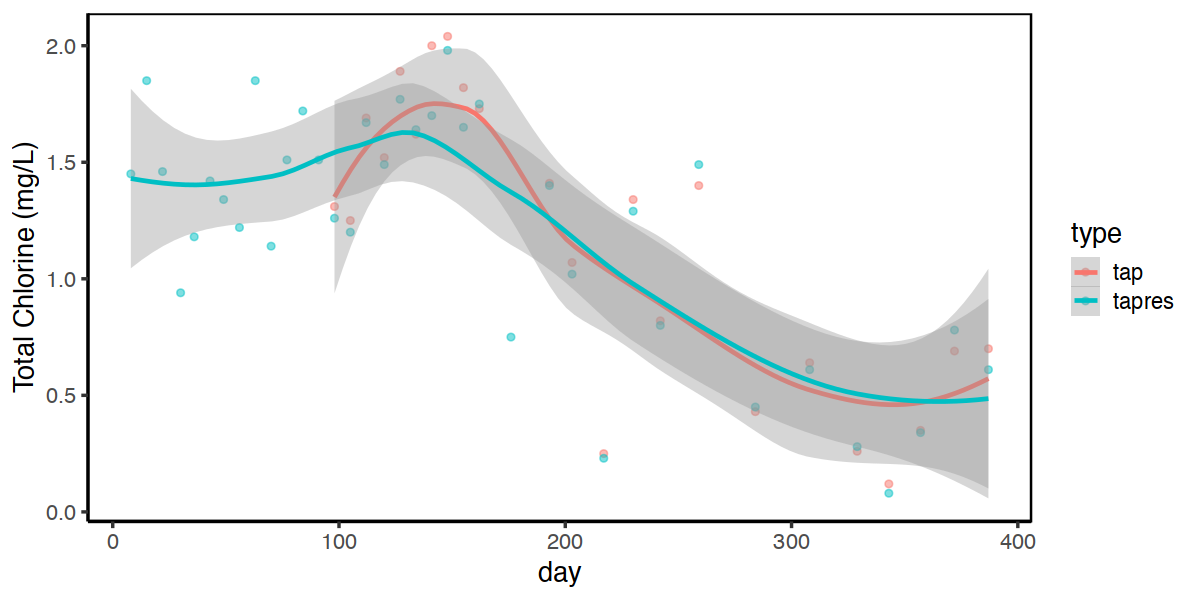

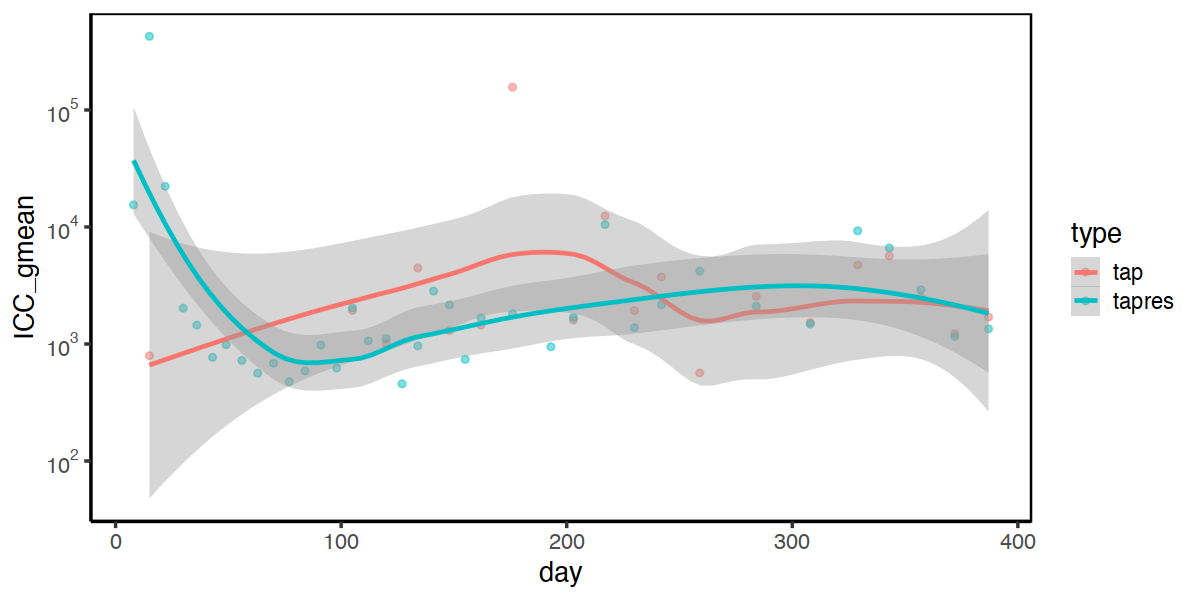

In [204]:
#plot tap and tapres together to show the res didn't have a strong impact on water quality
df <- arbf %>% subset(type == "tap" | type == "tapres")

# Test differences between groups based on type
wilcox.test(arbf$ICC_gmean[arbf$type== "tap"], arbf$ICC_gmean[arbf$type== "tapres"], conf.level= 0.95) #not statistically the same

options(repr.plot.width = 10, repr.plot.height = 5)
ggplot(df, aes(x=day, y=cl_total, color=type))+
    geom_point(alpha=0.5)+
    geom_smooth(method= "loess", se=TRUE, lwd=1)+
    ylab("Total Chlorine (mg/L)")+
    theme(legend.position = "right", panel.background=element_blank(), panel.border=element_rect(color = "black", fill = NA))

ggplot(df, aes(x=day, y=ICC_gmean, color=type))+
    geom_point(alpha=0.5)+
    geom_smooth(method= "loess", se=TRUE, lwd=1)+
    scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), labels = trans_format("log10", math_format(10^.x)))+
    # ylab("Total Chlorine (mg/L)")+
    theme(legend.position = "right", panel.background=element_blank(), panel.border=element_rect(color = "black", fill = NA))
                                    

### Ratios

Warning message:
“Removed 87 rows containing missing values (geom_point).”


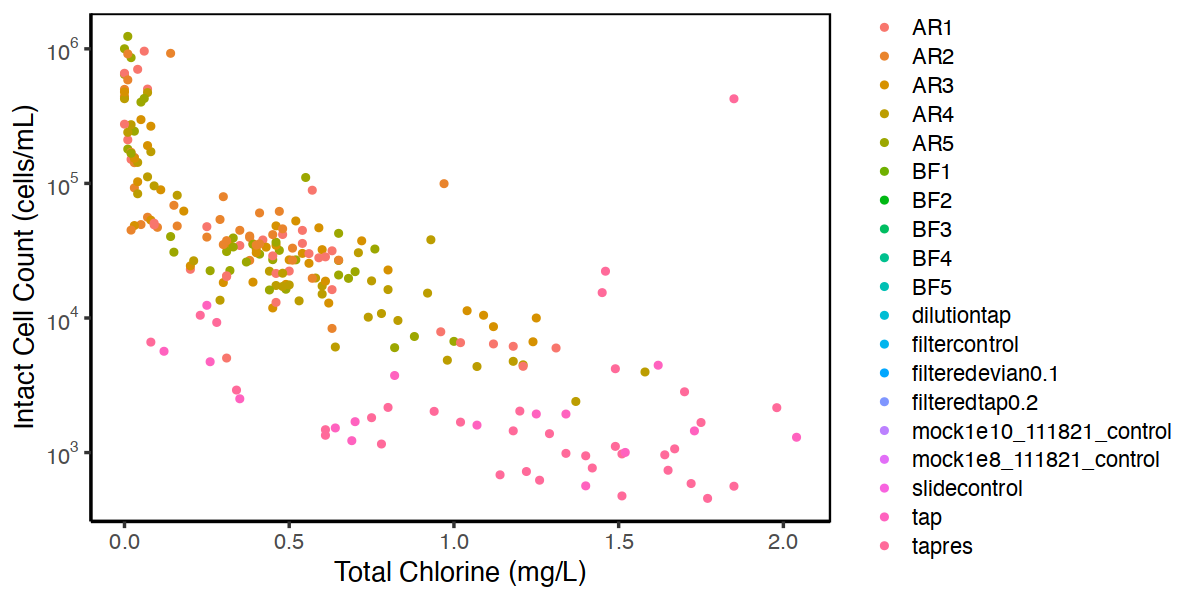

In [205]:
## Plot FCM ICC/TCC ratio

a <- arbf[(arbf$AR != "evian") & (arbf$AR != "filterB")& (arbf$AR != "manifB")& (arbf$AR != "MQ")& (arbf$AR != "tap0.2"),]

plot10 <- ggplot(a)+
geom_point(aes(x=cl_total, y=ICC_gmean, color= AR))+
# geom_line(aes(x=day, y=TCC_gmean, color=AR))+


xlab("Total Chlorine (mg/L)")+
scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), labels = trans_format("log10", math_format(10^.x)))+
                                    ylab("Intact Cell Count (cells/mL)")+
                                   theme(legend.position = "right", panel.background=element_blank(), panel.border=element_rect(color = "black", fill = NA))
                                    
plot10


Warning message:
“Removed 87 rows containing missing values (geom_pointrange).”


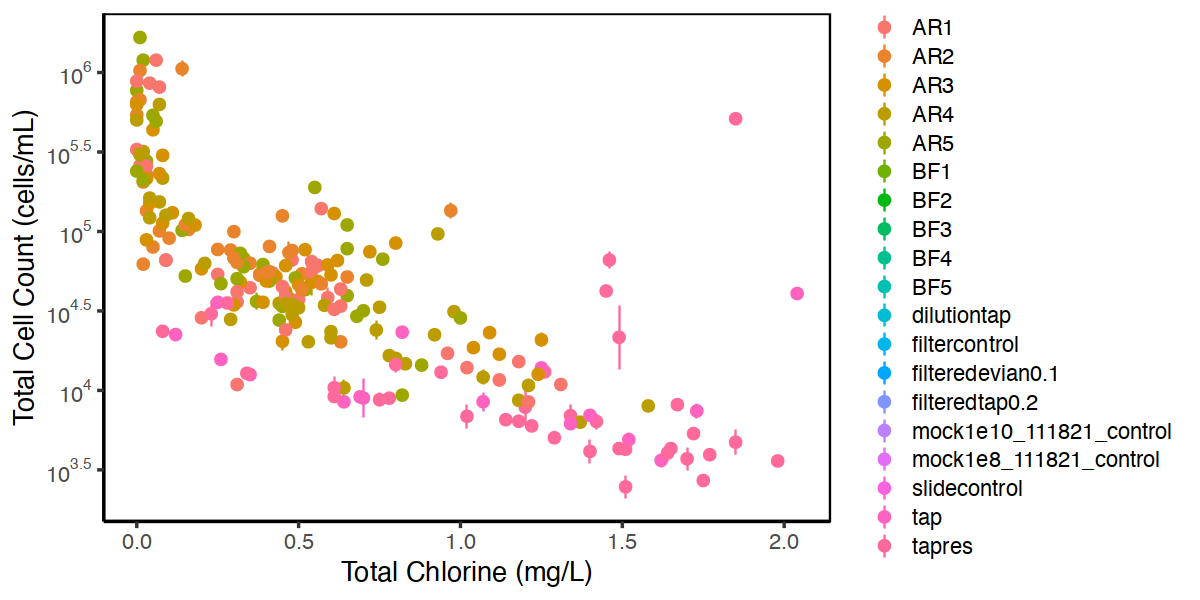

In [206]:
## Plot FCM data all on one plot against chlorine
                                         

plot5 <- ggplot(a)+
geom_pointrange(aes(x=cl_total, y=TCC_gmean, ymin=TCC_gmean/TCC_gstdv, ymax=TCC_gmean*TCC_gstdv, color= AR))+
# geom_line(aes(x=day, y=TCC_gmean))


xlab("Total Chlorine (mg/L)")+
scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), labels = trans_format("log10", math_format(10^.x)))+
                                    ylab("Total Cell Count (cells/mL)")+
                                   theme(legend.position = "right", panel.background=element_blank(), panel.border=element_rect(color = "black", fill = NA))
                                    
plot5

Warning message:
“Removed 94 rows containing missing values (geom_pointrange).”


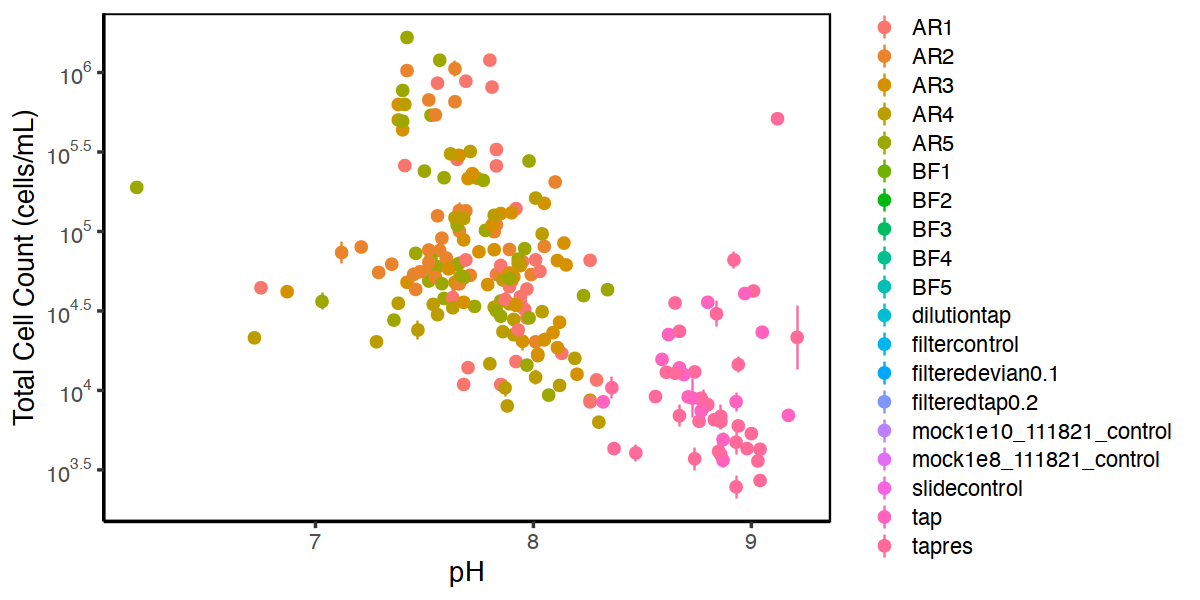

In [207]:
## Plot FCM data all on one plot against pH

plot5 <- ggplot(a)+
geom_pointrange(aes(x=pH, y=TCC_gmean, ymin=TCC_gmean/TCC_gstdv, ymax=TCC_gmean*TCC_gstdv, color= AR))+
# geom_line(aes(x=day, y=TCC_gmean))


xlab("pH")+                                                       
scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), labels = trans_format("log10", math_format(10^.x)))+
                                    ylab("Total Cell Count (cells/mL)")+
                                   theme(legend.position = "right", panel.background=element_blank(), panel.border=element_rect(color = "black", fill = NA))
                                    
plot5

Warning message:
“Removed 77 rows containing missing values (geom_pointrange).”


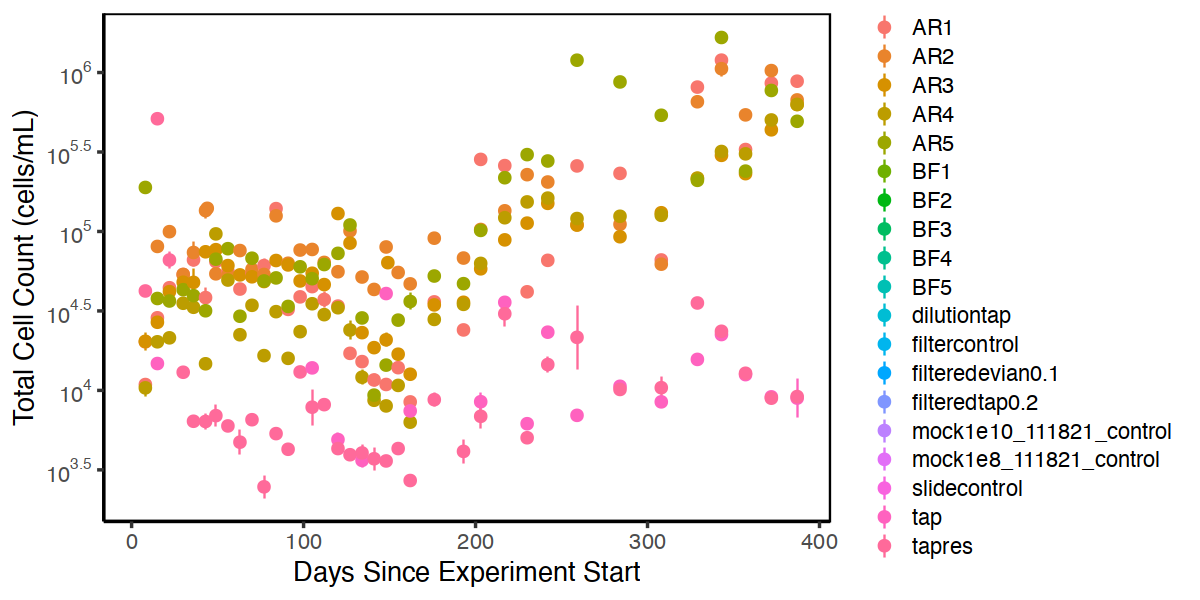

In [208]:
## Plot FCM data all on one plot with averages across the 5 reactors ?


plot3 <- ggplot(a)+
geom_pointrange(aes(x=day, y=TCC_gmean, ymin=TCC_gmean/TCC_gstdv, ymax=TCC_gmean*TCC_gstdv, color= AR))+
# geom_line(aes(x=day, y=TCC_gmean))


xlab("Days Since Experiment Start")+
scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), labels = trans_format("log10", math_format(10^.x)))+
                                    ylab("Total Cell Count (cells/mL)")+
                                   theme(legend.position = "right", panel.background=element_blank(), panel.border=element_rect(color = "black", fill = NA))
                                    
plot3

Warning message:
“Removed 94 rows containing missing values (geom_point).”
Warning message:
“Removed 80 row(s) containing missing values (geom_path).”


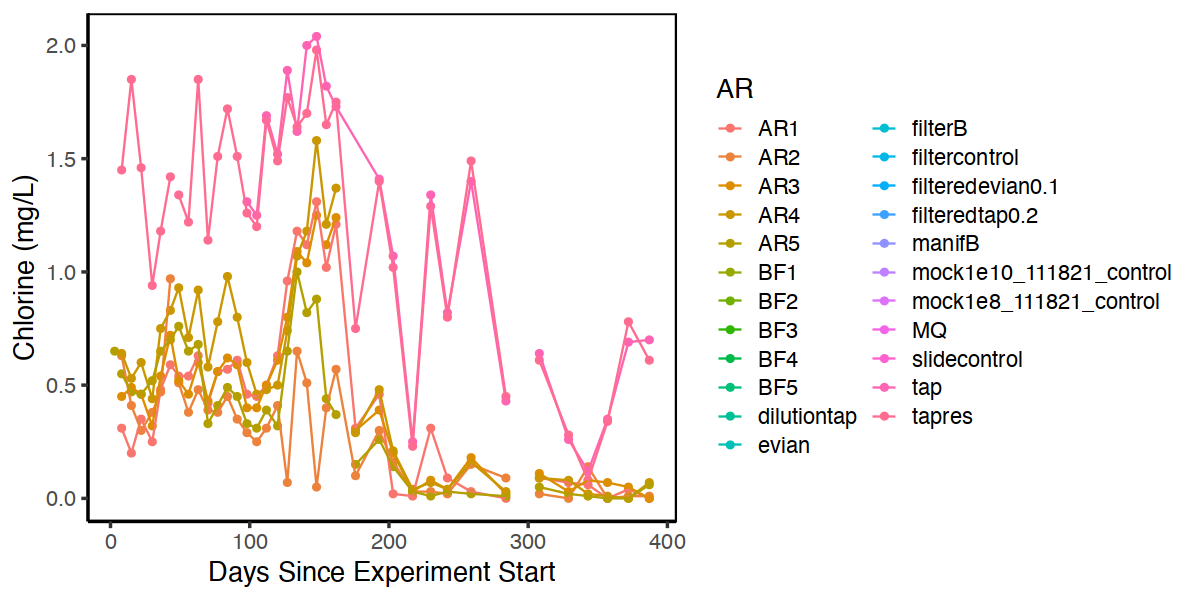

In [209]:
## Plot Chlorine over time
plot6 <- ggplot(arbf)+
geom_point(aes(x=day, y=cl_total, color= AR))+
 geom_line(aes(x=day, y=cl_total, color= AR))+


xlab("Days Since Experiment Start")+ ylab("Chlorine (mg/L)")+
                                   theme(legend.position = "right", panel.background=element_blank(), panel.border=element_rect(color = "black", fill = NA))
                                    
plot6

# 10. Biofilm Plots

In [210]:
# parameter calculations

#ch2v1_vol divided by ch2 vol is the percent colocalization of ch1 with ch2

arbf_clsm %>% filter(AR_num != 6 & AR_num != "control") %>% dplyr::select(AR_num, day, height_max)  %>% group_by( day) %>% dplyr::summarise(max_height= max(height_max), min_height= min(height_max), height_mean = mean(height_max, na.rm= TRUE))

arbf_clsm  %>% filter(AR_num != 6) %>% dplyr::select(AR_num, day, height_max)  %>% group_by( AR_num) %>% dplyr::summarise(max_height= max(height_max), min_height= min(height_max), height_mean = mean(height_max, na.rm= TRUE))



day max_height min_height height_mean
1  49 31          3         10.54839   
2  77 26          7         16.66667   
3 105 49         10         25.68000   
4 141 26          0         10.13514   
5 203 47          2         10.71429   
6 372 57          3         16.51724   
7 387 78          4         23.42308

AR_num  max_height min_height height_mean
1 1       64         3          19.11458   
2 2       26         4          10.11905   
3 3       78         4          17.43478   
4 4       49         0          16.08333   
5 5       73         4          16.55556   
6 control 14         0           3.70000

In [211]:
# parameters in controls vs samples
# arbf_clsm_long %>% group_by(control_or_sample) %>% dplyr::summarise_at(c(stack_count_total, ch2_vol), mean, na.rm = TRUE)
arbf_clsm_long %>% subset(assay %in% c("ch1_area_max", "ch1_height", "ch1_spread", "ch1_vol", 'height_max', 'ch1_height_0', 'ch2_height_0', 'ch3_height_0', 
                                       "ch2_area_max", "ch2_height", "ch2_spread",'ch2_vol',
                                      "ch3_area_max", "ch3_height", "ch3_spread",'ch3_vol',
                                       'EPS_vol', "total_vol", "stack_count_total")) %>% group_by(assay, control_or_sample) %>% dplyr::summarise(mean= mean(value, na.rm= TRUE))


`summarise()` has grouped output by 'assay'. You can override using the
`.groups` argument.


assay             control_or_sample mean        
1  ch1_area_max                                 NaN
2  ch1_area_max      control            2322.620049
3  ch1_area_max      sample             2335.483747
4  ch1_height                                   NaN
5  ch1_height        control               1.266667
6  ch1_height        sample                6.130435
7  ch1_height_0                            0.000000
8  ch1_height_0      control               3.033333
9  ch1_height_0      sample               16.154348
10 ch1_spread                                   NaN
11 ch1_spread        control               2.018640
12 ch1_spread        sample                6.528299
13 ch1_vol                                      NaN
14 ch1_vol           control            5169.313212
15 ch1_vol           sample            13041.929513
16 ch2_area_max                                 NaN
17 ch2_area_max      control            2288.076694
18 ch2_area_max      sample             1219.270809
19 ch2_height                                   NaN
20 ch2_height        control               1.600000
21 ch2_height        sample                2.104348
22 ch2_height_0                                 NaN
23 ch2_height_0      control               2.966667
24 ch2_height_0      sample               15.345652
25 ch2_spread                                   NaN
26 ch2_spread        control               1.922401
27 ch2_spread        sample                3.770323
28 ch2_vol                                      NaN
29 ch2_vol           control            5024.110253
30 ch2_vol           sample             4587.961228
31 ch3_area_max                                 NaN
32 ch3_area_max      control            5611.068810
33 ch3_area_max      sample             2793.388821
34 ch3_height                                   NaN
35 ch3_height        control               2.066667
36 ch3_height        sample                4.554348
37 ch3_height_0                                 NaN
38 ch3_height_0      control               3.200000
39 ch3_height_0      sample               16.115217
40 ch3_spread                                   NaN
41 ch3_spread        control               2.245600
42 ch3_spread        sample                3.856306
43 ch3_vol                                      NaN
44 ch3_vol           control           14332.723414
45 ch3_vol           sample            10555.321894
46 EPS_vol                                      NaN
47 EPS_vol           control           18891.592205
48 EPS_vol           sample            22913.891885
49 height_max                                   NaN
50 height_max        control               3.700000
51 height_max        sample               16.154348
52 stack_count_total                      29.000000
53 stack_count_total control               7.666667
54 stack_count_total sample               20.206522
55 total_vol                                    NaN
56 total_vol         control           20690.647299
57 total_vol         sample            23866.535164

In [213]:
# parameters in each day and AR
# arbf_clsm_long %>% group_by(control_or_sample) %>% dplyr::summarise_at(c(stack_count_total, ch2_vol), mean, na.rm = TRUE)
arbf_clsm_long %>% subset(assay %in% c(#"ch1_area_max", "ch1_height", "ch1_spread", "ch1_vol", 
                                        #"ch2_spread",'ch2_vol', "ch2_area_max", "ch2_height","total_vol", "stack_count_total"
                                      #"ch3_area_max", "ch3_height", "ch3_spread",'ch3_vol','EPS_vol',
                                        'height_max')) %>% group_by(AR_num, day, assay) %>% 
                dplyr::summarise(mean= round(mean(value))) %>% filter(AR_num == "5") 


`summarise()` has grouped output by 'AR_num', 'day'. You can override using the
`.groups` argument.


AR_num day assay      mean
1 5       49 height_max 12  
2 5       77 height_max 10  
3 5      105 height_max 21  
4 5      141 height_max 10  
5 5      203 height_max  7  
6 5      372 height_max 23  
7 5      387 height_max 38

Warning message:
“Removed 1620 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 1620 rows containing missing values (geom_point).”


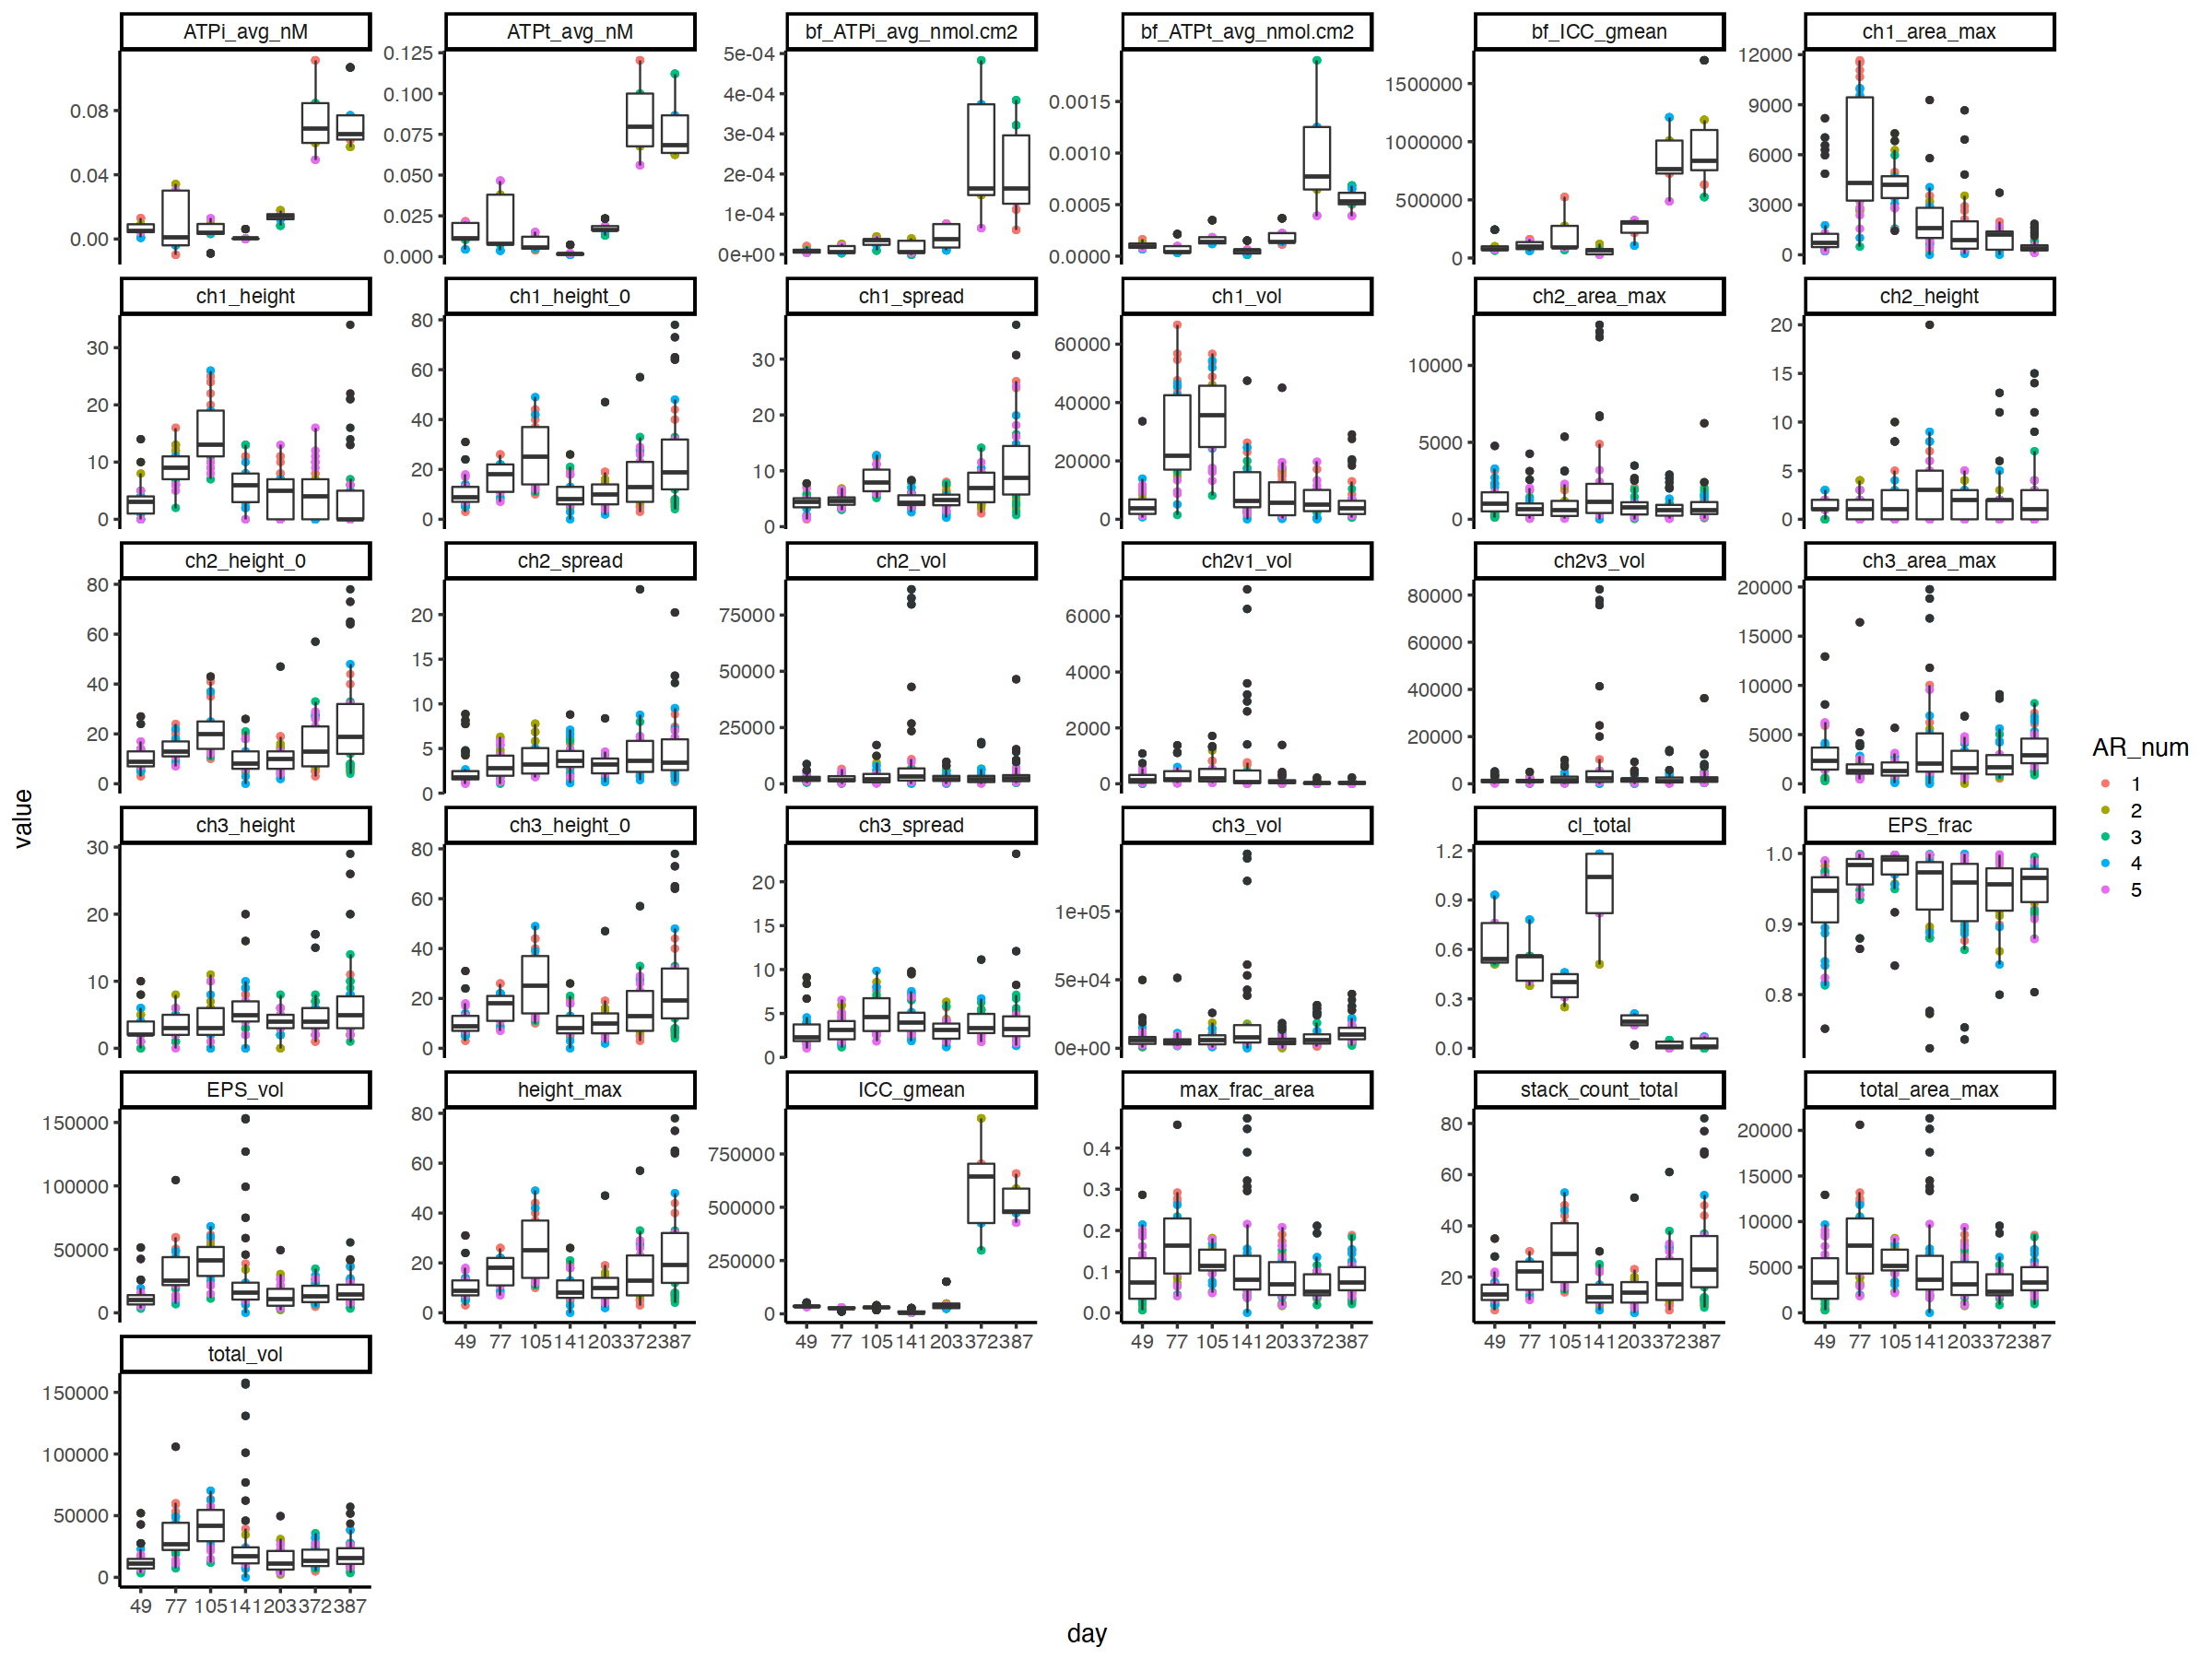

In [121]:
# as.Date(df_clsm$date, '%m%d%y')
arbf_clsm_long_nocontrol <- arbf_clsm_long %>% subset(AR_num != "control" & AR_num != "6") #%>% subset(assay != "cl_total" & assay != "ICC_gmean")
df <- arbf_clsm_long_nocontrol 
df$day <- as.character(df$day)
df$day <- factor(df$day, levels=c('49', '77', '105', '141','203', '372', '387')) # set order for plotting 

options(repr.plot.width = 20, repr.plot.height = 15)
ggplot(df) +
geom_point(aes(x=day, y=value, color= AR_num))+
geom_boxplot(aes(x=day, y=value))+
facet_wrap(~assay, scales= "free_y")
# scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), labels = trans_format("log10", math_format(10^.x)))
               

`summarise()` has grouped output by 'day', 'AR_num'. You can override using the
`.groups` argument.
Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


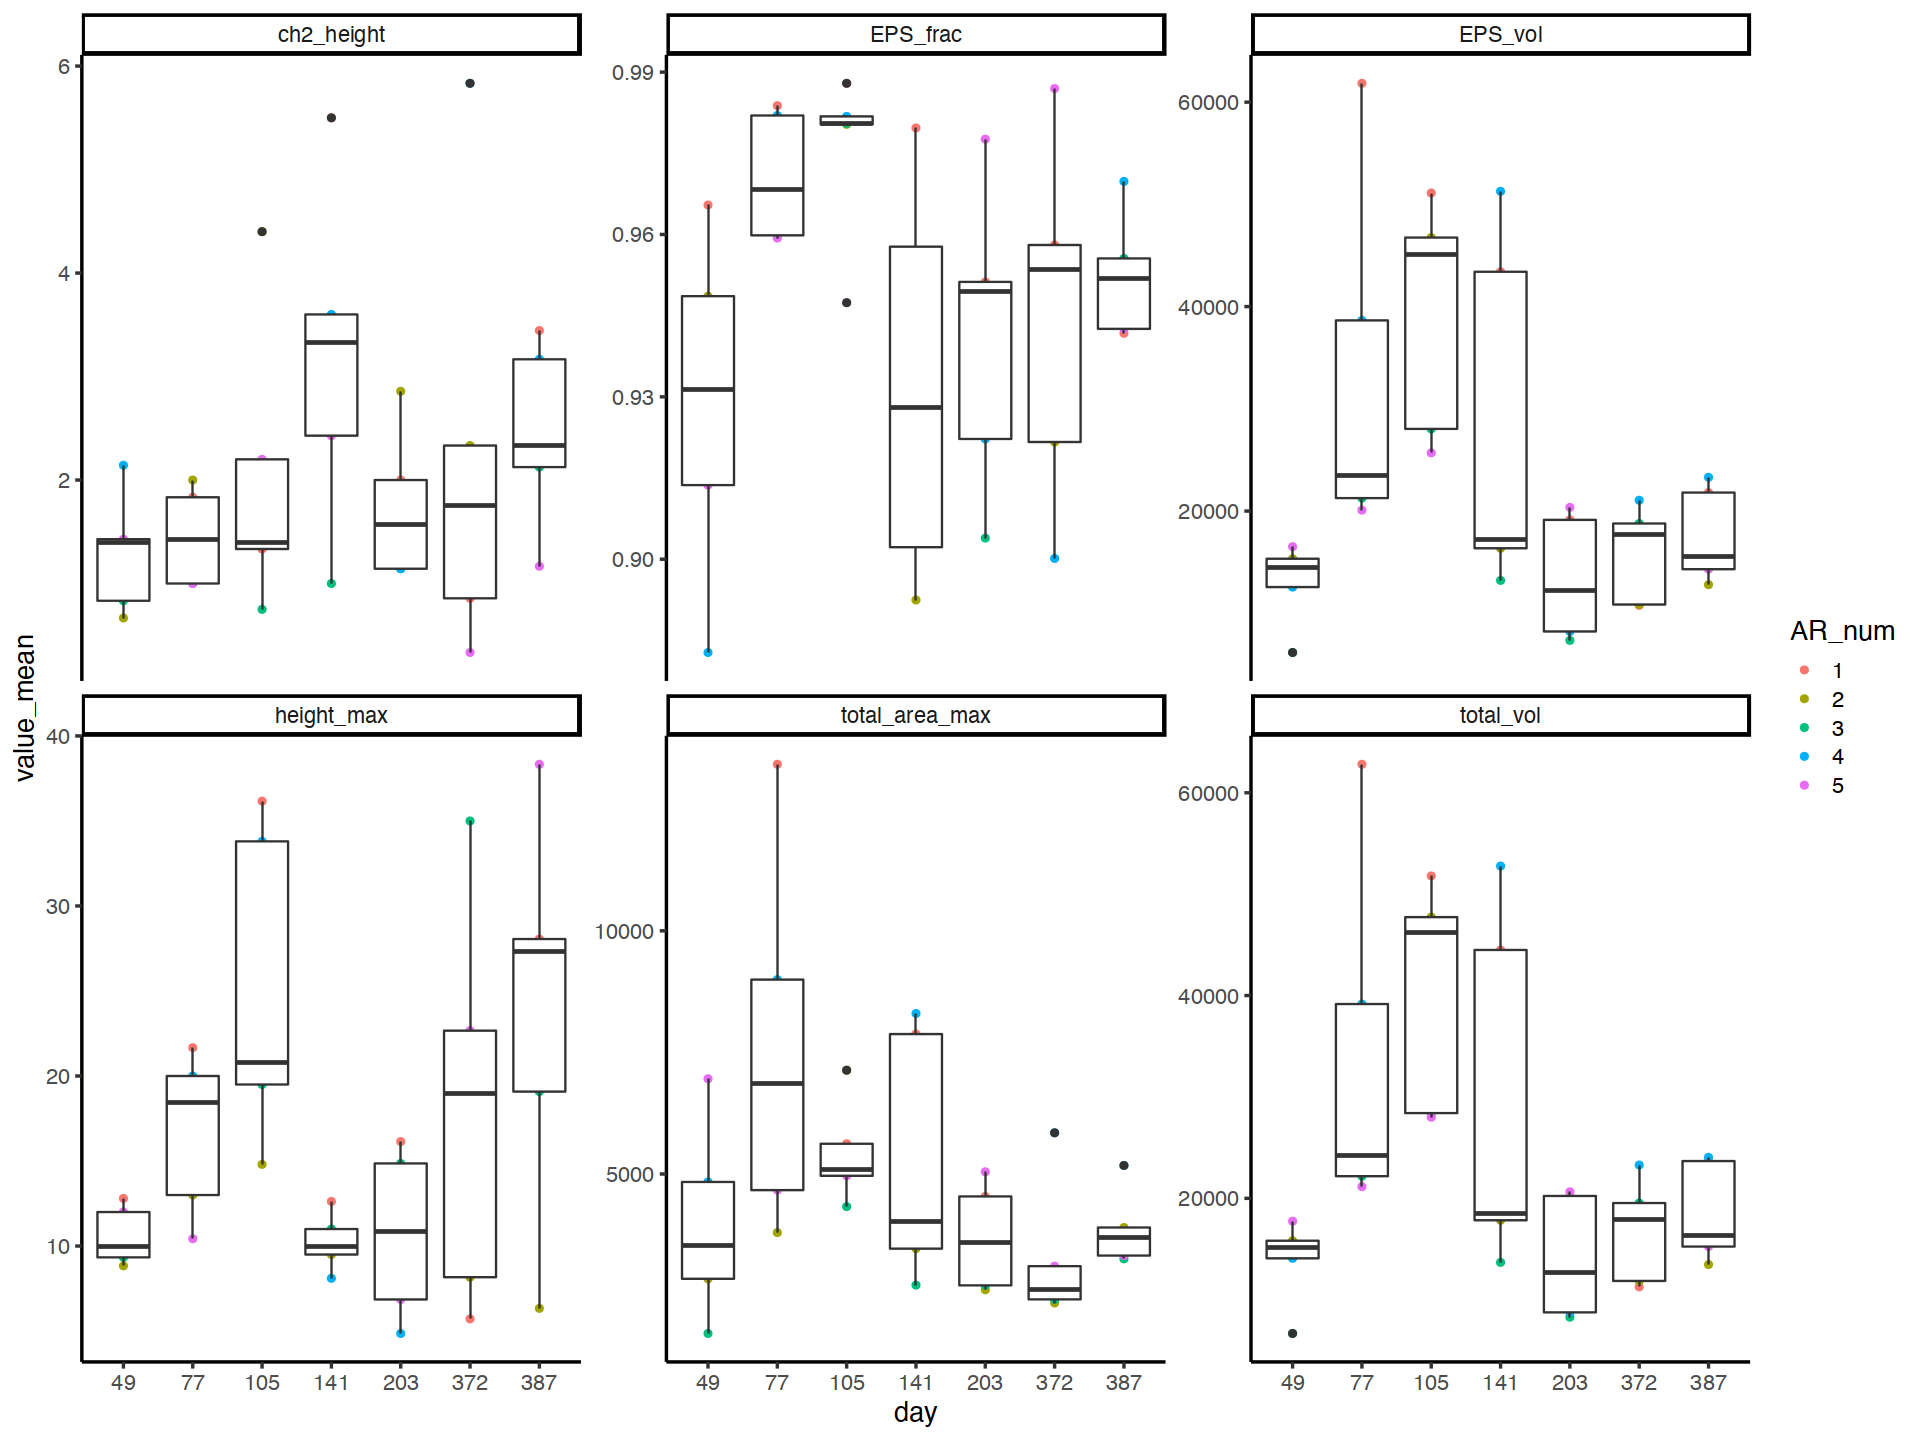

In [123]:
# Plot a subset 
keep <- c('total_vol', 'EPS_vol', 'EPS_frac', 'height_max', 'total_area_max', 'ch2_height') #, 'max_frac_area'
arbf_clsm_long_nocontrol <- arbf_clsm_long %>% subset(AR_num != "control" & AR_num != "6") %>% filter(assay %in% keep)

df <- arbf_clsm_long_nocontrol %>% group_by(day, AR_num, assay) %>% dplyr::summarise(value_mean=mean(value))
df$day <- as.character(df$day)
df$day <- factor(df$day, levels=c('49', '77', '105', '141','203', '372', '387')) # set order for plotting 

options(repr.plot.width = 16, repr.plot.height = 12)
ggplot(df) +
geom_point(aes(x=day, y=value_mean, color= AR_num))+
geom_boxplot(aes(x=day, y=value_mean))+
facet_wrap(~assay, scales= "free_y")
# scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), labels = trans_format("log10", math_format(10^.x)))



               

In [124]:
max(arbf_clsm_long_nocontrol$value[arbf_clsm_long_nocontrol$assay== 'max_frac_area'])
max(df$value_mean[df$assay== 'max_frac_area'], na.rm=TRUE)



Warning message in max(arbf_clsm_long_nocontrol$value[arbf_clsm_long_nocontrol$assay == :
“no non-missing arguments to max; returning -Inf”


[1] -Inf

Warning message in max(df$value_mean[df$assay == "max_frac_area"], na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


[1] -Inf

### Build df with 3 prior weeks averaged

In [127]:
all_days_list <- sort(unique(arbf$day[!is.na(arbf$cl_total)]))
bf_days_list <- sort(unique(arbf$day[!is.na(arbf$bf_ICC_gmean)]))
l= length(all_days_list)

# declaring an empty data frame
df = data.frame(
  AR_num = character(), day = numeric(),cl3 = numeric(), cl_total1 = numeric(),cl_total2 = numeric(),cl_total3 = numeric(),
    stringsAsFactors = FALSE)
 
#loop to create new data frame 
for (x in 1:5) {
    for (i in 1:l) {
        ar_subset <- arbf %>% filter(AR_num == x) %>% filter(replicate=="A") %>% filter(type== "AR")
        bf_subset <- arbf %>% filter(AR_num == x) %>% filter(replicate=="A") %>% filter(type== "BF")
        
        if (all_days_list[i] %in% bf_days_list) {
            cl3 <- mean(c(ar_subset$cl_total[ar_subset$day==all_days_list[i]], ar_subset$cl_total[ar_subset$day==all_days_list[i-1]], ar_subset$cl_total[ar_subset$day==all_days_list[i-2]]))
            cl_total1 <- ar_subset$cl_total[ar_subset$day==all_days_list[i]]
            cl_total2 <- ar_subset$cl_total[ar_subset$day==all_days_list[i-1]]
            cl_total3 <- ar_subset$cl_total[ar_subset$day==all_days_list[i-2]]
            # bf_ICC_3 <- mean(bf_subset$bf_ICC_gmean[bf_subset$day==bf_days_list[i]], bf_subset$bf_ICC_gmean[bf_subset$day==bf_days_list[i-1]], bf_subset$bf_ICC_gmean[bf_subset$day==bf_days_list[i-2]])
            # if (!is.na(bf_subset$height_max[bf_subset$day==all_days_list[i]])) {
            #     height_max <- bf_subset$height_max[bf_subset$day==all_days_list[i]]
            # } else {
            # height_max <- 1000
            # }
            day = all_days_list[i]
            # print(day, cl3)
            vec <- c(x, all_days_list[i], cl3, cl_total1, cl_total2, cl_total3)    
#         # assigning this vector to ith row
            r=i+(l*(x-1))
            df[r, ] <- vec  
        } else {
        # print("no")
        }
    }
}

df <- df %>% filter(!is.na(day)) 
clsm_cl3 <- df[order(df$AR_num), ]
       
clsm_cl3

AR_num day cl3         cl_total1 cl_total2 cl_total3
1  1       49 0.536666667 0.54      0.59      0.48     
2  1       77 0.536666667 0.56      0.42      0.63     
3  1      105 0.506666667 0.45      0.46      0.61     
4  1      141 1.086666667 1.12      1.18      0.96     
5  1      203 0.263333333 0.02      0.46      0.31     
6  1      372 0.033333333 0.04      0.00      0.06     
7  1      387 0.013333333 0.00      0.04      0.00     
8  2       49 0.650000000 0.51      0.97      0.47     
9  2       77 0.416666667 0.38      0.39      0.48     
10 2      105 0.296666667 0.25      0.29      0.35     
11 2      141 0.410000000 0.51      0.65      0.07     
12 2      203 0.186666667 0.16      0.30      0.10     
13 2      372 0.050000000 0.01      0.00      0.14     
14 2      387 0.006666667 0.01      0.01      0.00     
15 3       49 0.593333333 0.52      0.72      0.54     
16 3       77 0.530000000 0.56      0.43      0.60     
17 3      105 0.463333333 0.40      0.40      0.59     
18 3      141 0.976666667 1.04      1.09      0.80     
19 3      203 0.296666667 0.20      0.39      0.30     
20 3      372 0.066666667 0.05      0.07      0.08     
21 3      387 0.040000000 0.00      0.05      0.07     
22 4       49 0.836666667 0.93      0.83      0.75     
23 4       77 0.760000000 0.78      0.58      0.92     
24 4      105 0.620000000 0.46      0.60      0.80     
25 4      141 0.996666667 1.18      1.07      0.74     
26 4      203 0.326666667 0.21      0.48      0.29     
27 4      372 0.010000000 0.00      0.01      0.02     
28 4      387 0.026666667 0.07      0.00      0.01     
29 5       49 0.703333333 0.76      0.70      0.65     
30 5       77 0.473333333 0.41      0.33      0.68     
31 5      105 0.363333333 0.31      0.33      0.45     
32 5      141 0.823333333 0.82      1.00      0.65     
33 5      203 0.183333333 0.14      0.26      0.15     
34 5      372 0.003333333 0.00      0.00      0.01     
35 5      387 0.020000000 0.06      0.00      0.00

In [128]:
arbf_clsm3 <- merge(clsm_cl3, arbf_clsm, by= c("day", "AR_num"))
arbf_clsm3[arbf_clsm3$day == 49,]

#why are we missing AR1,2,and 3 from day 49?

day AR_num cl3       cl_total1 cl_total2 cl_total3 replicate sample_id ARBF
331 49  1      0.5366667 0.54      0.59      0.48      A         BF1_49    BF  
332 49  1      0.5366667 0.54      0.59      0.48      A         BF1_49    BF  
333 49  1      0.5366667 0.54      0.59      0.48      A         BF1_49    BF  
334 49  1      0.5366667 0.54      0.59      0.48      A         AR1_49    AR  
335 49  1      0.5366667 0.54      0.59      0.48      A         BF1_49    BF  
336 49  1      0.5366667 0.54      0.59      0.48      A         AR1_49    AR  
337 49  1      0.5366667 0.54      0.59      0.48      A         BF1_49    BF  
338 49  1      0.5366667 0.54      0.59      0.48      A         AR1_49    AR  
339 49  1      0.5366667 0.54      0.59      0.48      A         AR1_49    AR  
340 49  1      0.5366667 0.54      0.59      0.48      A         AR1_49    AR  
341 49  2      0.6500000 0.51      0.97      0.47      A         BF2_49    BF  
342 49  2      0.6500000 0.51      0.97      0.47      A         AR2_49    AR  
343 49  2      0.6500000 0.51      0.97      0.47      A         BF2_49    BF  
344 49  2      0.6500000 0.51      0.97      0.47      A         BF2_49    BF  
345 49  2      0.6500000 0.51      0.97      0.47      A         AR2_49    AR  
346 49  2      0.6500000 0.51      0.97      0.47      A         AR2_49    AR  
347 49  2      0.6500000 0.51      0.97      0.47      A         AR2_49    AR  
348 49  2      0.6500000 0.51      0.97      0.47      A         BF2_49    BF  
349 49  2      0.6500000 0.51      0.97      0.47      A         BF2_49    BF  
350 49  2      0.6500000 0.51      0.97      0.47      A         BF2_49    BF  
351 49  2      0.6500000 0.51      0.97      0.47      A         AR2_49    AR  
352 49  2      0.6500000 0.51      0.97      0.47      A         AR2_49    AR  
353 49  3      0.5933333 0.52      0.72      0.54      A         AR3_49    AR  
354 49  3      0.5933333 0.52      0.72      0.54      A         AR3_49    AR  
355 49  3      0.5933333 0.52      0.72      0.54      A         BF3_49    BF  
356 49  3      0.5933333 0.52      0.72      0.54      A         BF3_49    BF  
357 49  3      0.5933333 0.52      0.72      0.54      A         BF3_49    BF  
358 49  3      0.5933333 0.52      0.72      0.54      A         AR3_49    AR  
359 49  3      0.5933333 0.52      0.72      0.54      A         AR3_49    AR  
360 49  3      0.5933333 0.52      0.72      0.54      A         BF3_49    BF  
⋮   ⋮   ⋮      ⋮         ⋮         ⋮         ⋮         ⋮         ⋮         ⋮   
363 49  3      0.5933333 0.52      0.72      0.54      A         BF3_49    BF  
364 49  3      0.5933333 0.52      0.72      0.54      A         BF3_49    BF  
365 49  4      0.8366667 0.93      0.83      0.75      A         BF4_49    BF  
366 49  4      0.8366667 0.93      0.83      0.75      A         BF4_49    BF  
367 49  4      0.8366667 0.93      0.83      0.75      A         BF4_49    BF  
368 49  4      0.8366667 0.93      0.83      0.75      A         BF4_49    BF  
369 49  4      0.8366667 0.93      0.83      0.75      A         BF4_49    BF  
370 49  4      0.8366667 0.93      0.83      0.75      A         BF4_49    BF  
371 49  4      0.8366667 0.93      0.83      0.75      A         AR4_49    AR  
372 49  4      0.8366667 0.93      0.83      0.75      A         AR4_49    AR  
373 49  4      0.8366667 0.93      0.83      0.75      A         AR4_49    AR  
374 49  4      0.8366667 0.93      0.83      0.75      A         BF4_49    BF  
375 49  4      0.8366667 0.93      0.83      0.75      A         AR4_49    AR  
376 49  4      0.8366667 0.93      0.83      0.75      A         AR4_49    AR  
377 49  4      0.8366667 0.93      0.83      0.75      A         AR4_49    AR  
378 49  4      0.8366667 0.93      0.83      0.75      A         AR4_49    AR  
379 49  5      0.7033333 0.76      0.70      0.65      A         BF5_49    BF  
380 49  5      0.7033333 0.76      0.70      0.65      A         AR5_49    AR  
381 

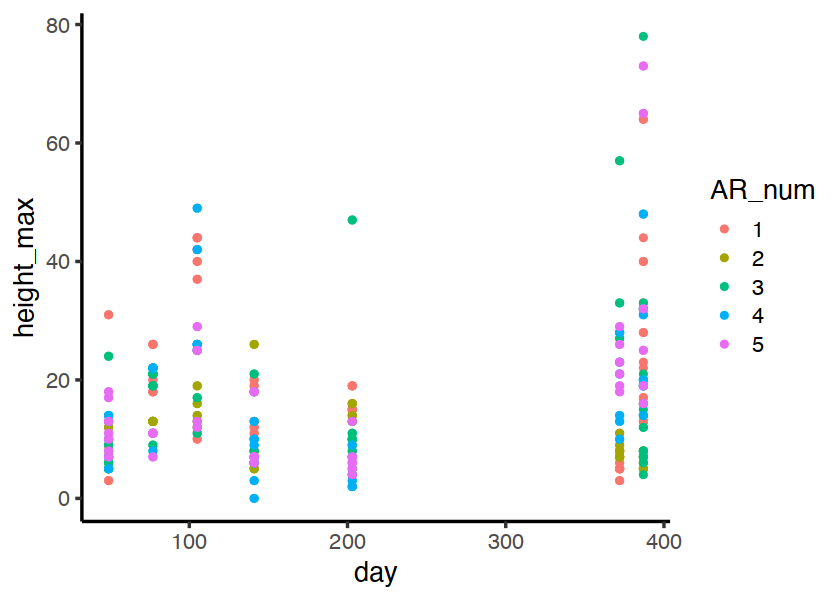

In [129]:
# as.Date(df_clsm$date, '%m%d%y')
arbf_clsm_nocontrol <- arbf_clsm %>% subset(AR_num != "control" & AR_num != "6") #%>% subset(assay != "cl_total" & assay != "ICC_gmean")
df <- arbf_clsm_nocontrol

options(repr.plot.width = 7, repr.plot.height = 5)
ggplot(df) +
geom_point(aes(x=day, y=height_max, color= AR_num))
# scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), labels = trans_format("log10", math_format(10^.x)))
               

Warning message:
“Removed 238 rows containing missing values (geom_point).”


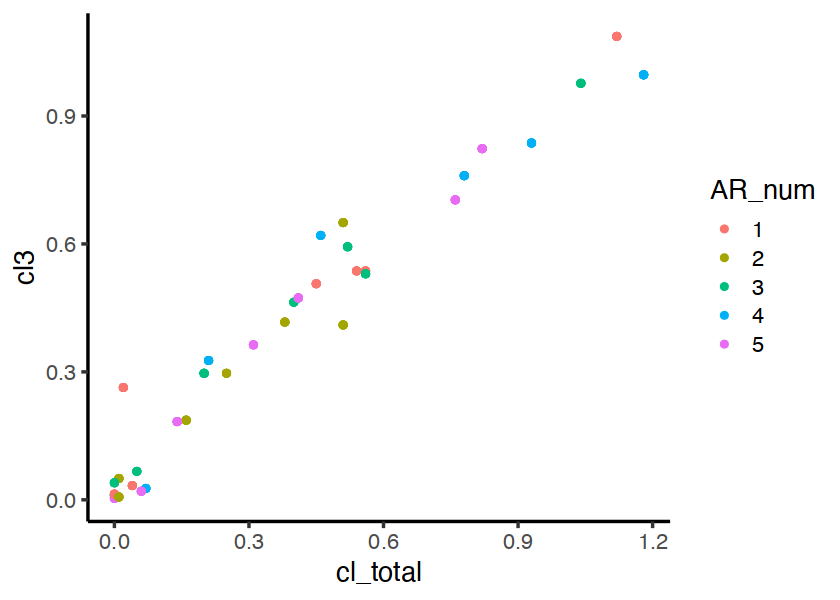

In [130]:
# as.Date(df_clsm$date, '%m%d%y')
df <- arbf_clsm3

options(repr.plot.width = 7, repr.plot.height = 5)
ggplot(df) +
geom_point(aes(x=cl_total, y=cl3, color= AR_num))

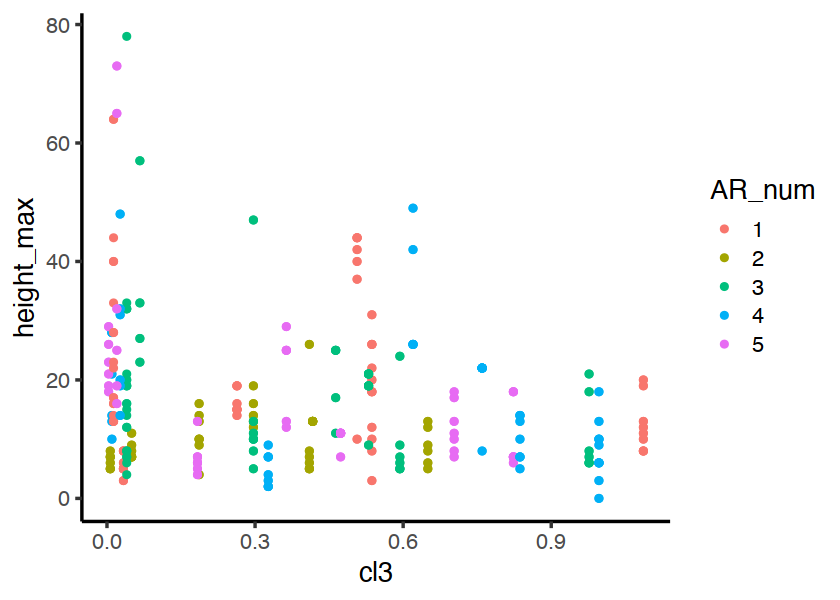

In [131]:
# as.Date(df_clsm$date, '%m%d%y')
df <- arbf_clsm3

options(repr.plot.width = 7, repr.plot.height = 5)
ggplot(df) +
geom_point(aes(x=cl3, y=height_max, color= AR_num))
# scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), labels = trans_format("log10", math_format(10^.x)))
               

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 220 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 220 rows containing missing values (geom_point).”


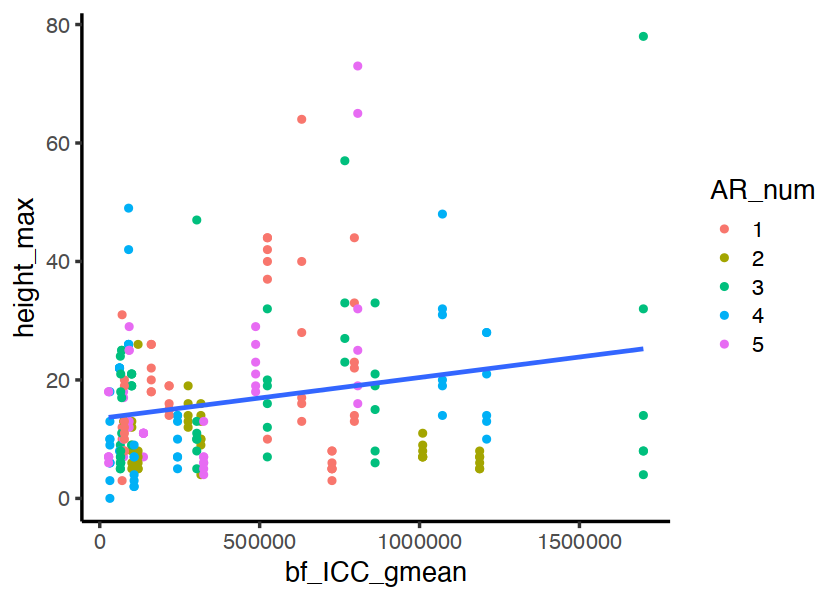

In [132]:
# as.Date(df_clsm$date, '%m%d%y')
arbf_clsm_nocontrol <- arbf_clsm %>% subset(AR_num != "control" & AR_num != "6") #%>% subset(assay != "cl_total" & assay != "ICC_gmean")
df <- arbf_clsm_nocontrol

options(repr.plot.width = 7, repr.plot.height = 5)
ggplot(df, aes(x=bf_ICC_gmean, y=height_max)) +
geom_point(aes(color= AR_num))+
geom_smooth(method= "lm", se=FALSE, lwd=1)
# scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), labels = trans_format("log10", math_format(10^.x)))



`summarise()` has grouped output by 'day'. You can override using the `.groups`
argument.


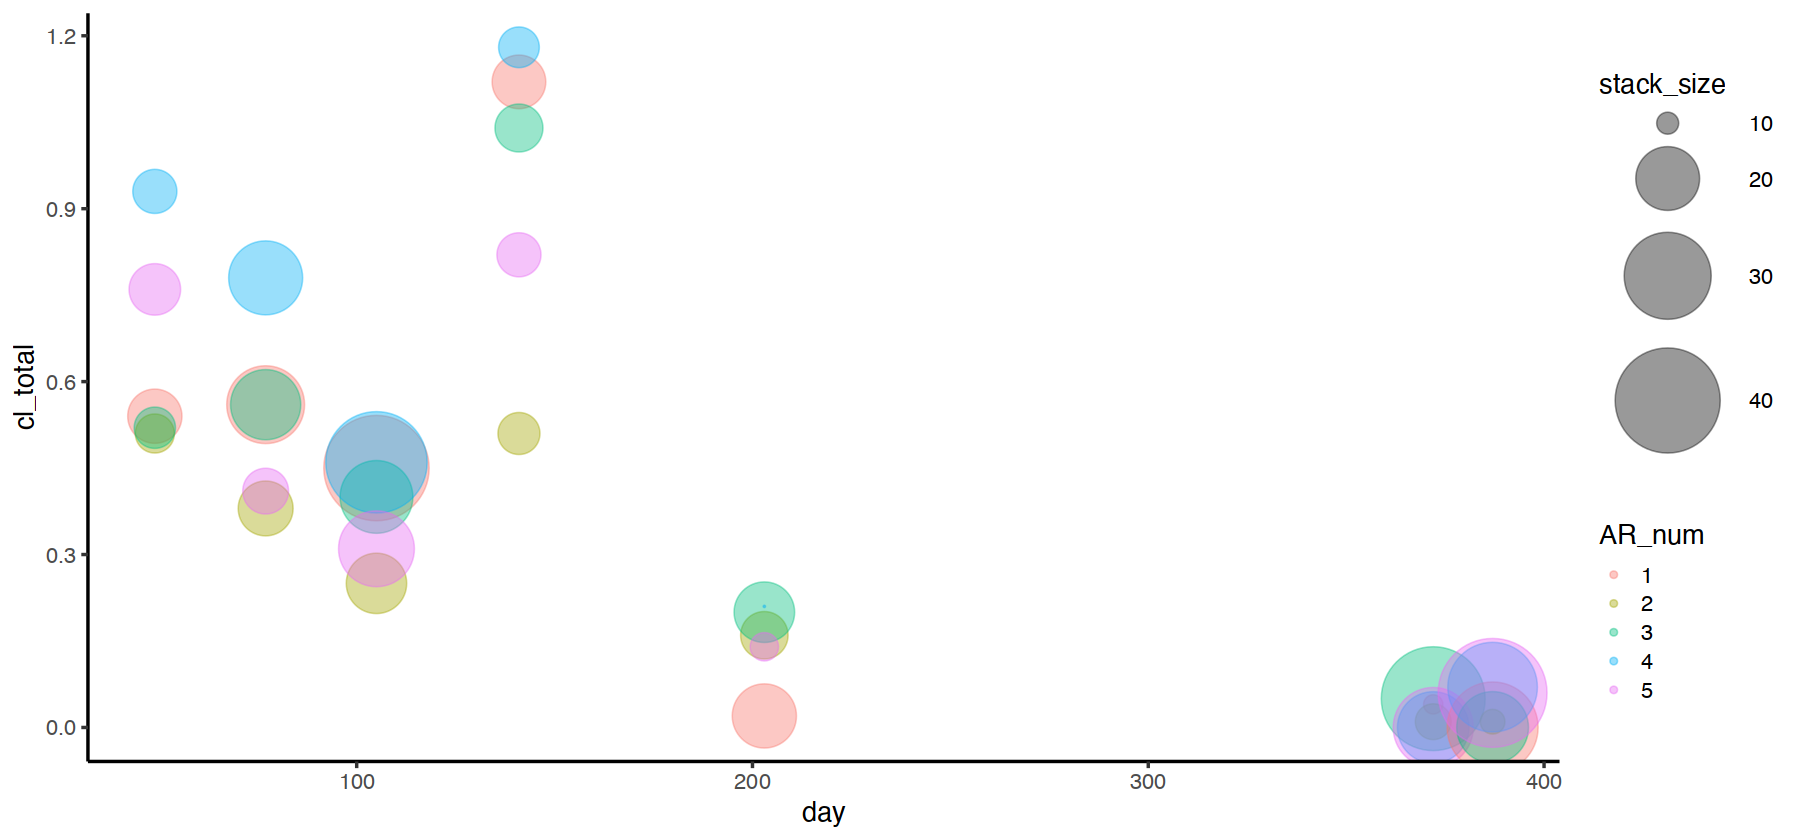

In [133]:
# as.Date(df_clsm$date, '%m%d%y')
arbf_clsm_nocontrol <- arbf_clsm %>% subset(AR_num != "control" & AR_num != "6") #%>% subset(assay != "cl_total" & assay != "ICC_gmean")
df <- arbf_clsm_nocontrol %>% group_by(day, AR_num) %>% dplyr::summarise(cl_total = mean(cl_total, na.rm= TRUE), stack_count_total= mean(stack_count_total))
# df
options(repr.plot.width = 15, repr.plot.height = 7)
ggplot(df) +
geom_point(alpha=0.4, aes(x=day, y=cl_total, size= stack_count_total, color= AR_num))+ #, position= 'jitter')+
scale_size(range = c(0.05, 30), name="stack_size")
# scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), labels = trans_format("log10", math_format(10^.x)))
               

`summarise()` has grouped output by 'day'. You can override using the `.groups`
argument.


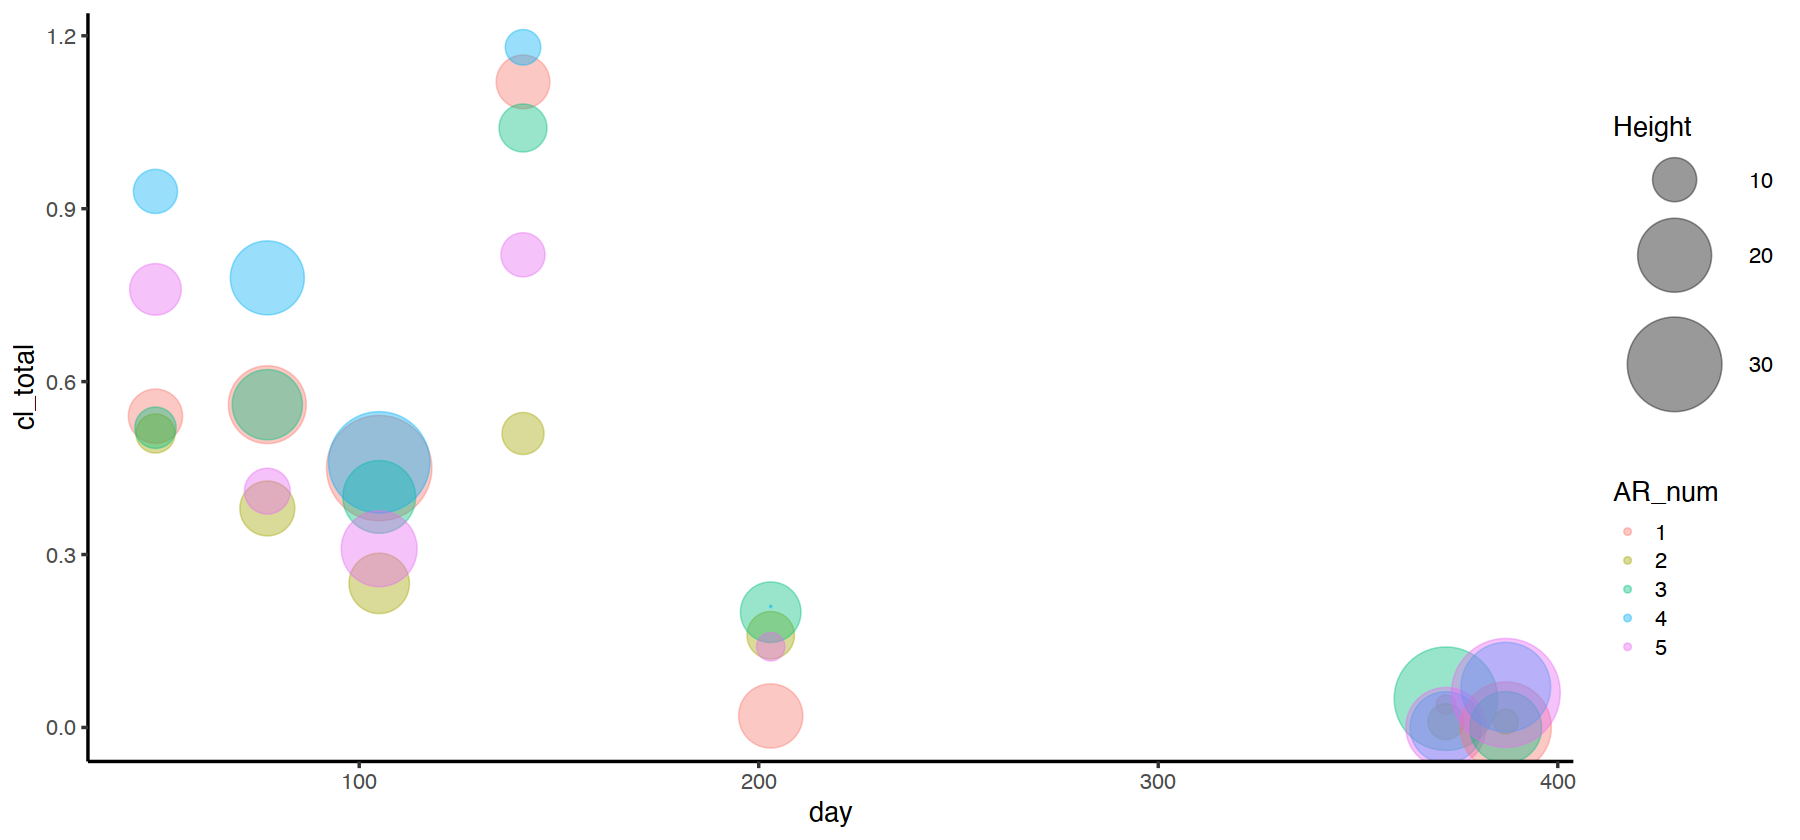

In [134]:
# as.Date(df_clsm$date, '%m%d%y')
arbf_clsm_nocontrol <- arbf_clsm %>% subset(AR_num != "control" & AR_num != "6") #%>% subset(assay != "cl_total" & assay != "ICC_gmean")
df <- arbf_clsm_nocontrol %>% group_by(day, AR_num) %>% dplyr::summarise(cl_total = mean(cl_total, na.rm= TRUE), height_max_total= mean(height_max, na.rm = TRUE))
# df
options(repr.plot.width = 15, repr.plot.height = 7)
ggplot(df) +
geom_point(alpha=0.4, aes(x=day, y=cl_total, size= height_max_total, color= AR_num))+ #, position= 'jitter')+
scale_size(range = c(0.05, 30), name="Height")
# scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), labels = trans_format("log10", math_format(10^.x)))
               

`summarise()` has grouped output by 'day'. You can override using the `.groups`
argument.


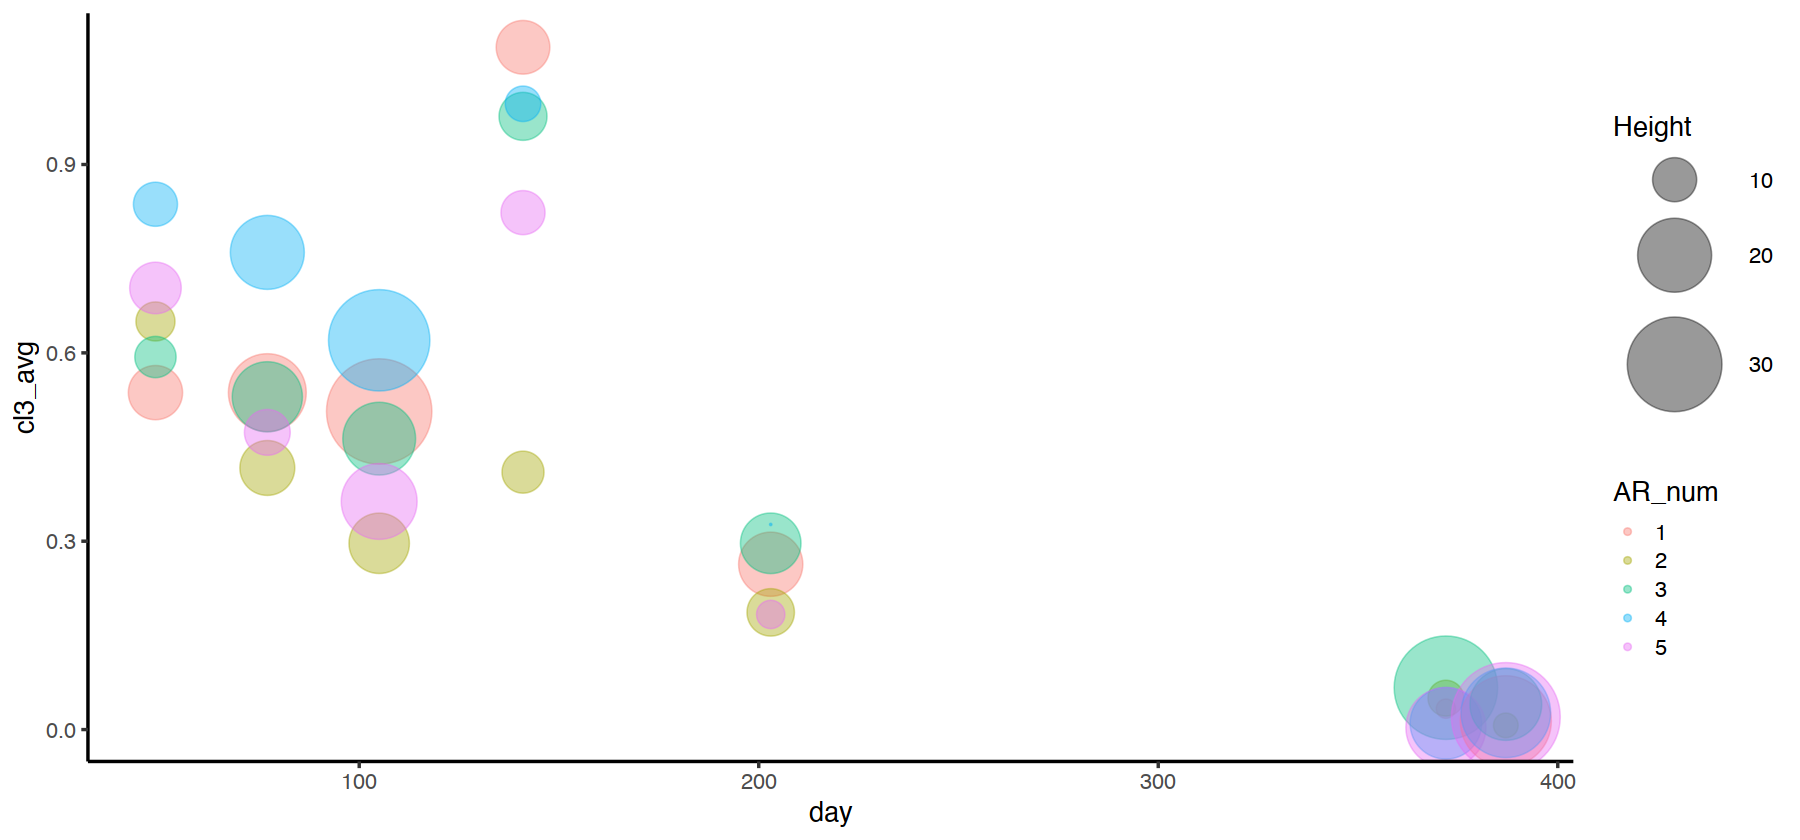

In [135]:
# as.Date(df_clsm$date, '%m%d%y')
arbf_clsm_nocontrol <- arbf_clsm3 %>% subset(AR_num != "control" & AR_num != "6") #%>% subset(assay != "cl_total" & assay != "ICC_gmean")
df <- arbf_clsm_nocontrol %>% group_by(day, AR_num) %>% dplyr::summarise(cl3_avg = mean(cl3, na.rm= TRUE), height_max_total= mean(height_max, na.rm = TRUE))
# df
options(repr.plot.width = 15, repr.plot.height = 7)
ggplot(df) +
geom_point(alpha=0.4, aes(x=day, y=cl3_avg, size= height_max_total, color= AR_num))+ #, position= 'jitter')+
scale_size(range = c(0.05, 30), name="Height")
# scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), labels = trans_format("log10", math_format(10^.x)))
               

In [136]:
# Test correlations of variables between biofilm
keep= c("ch1_height_0","ch2_height_0","ch3_height_0", "height_max", "bf_ICC_gmean", "bf_ATPi_avg_nmol.cm2", "day", "cl3")
df_corr <- arbf_clsm3  %>% select(all_of(keep))%>% drop_na() 
# df_corr$cl_total <- as.numeric(df_corr$cl_total)
M <-cor(df_corr, method="kendall")
M

res1 <- cor.mtest(df_corr, method ="kendall", conf.level = .95)
res1$p


ch1_height_0 ch2_height_0 ch3_height_0 height_max 
ch1_height_0          1.00000000   0.9487948    0.99878247   1.00000000
ch2_height_0          0.94879475   1.0000000    0.95053544   0.94879475
ch3_height_0          0.99878247   0.9505354    1.00000000   0.99878247
height_max            1.00000000   0.9487948    0.99878247   1.00000000
bf_ICC_gmean          0.12123295   0.1446541    0.12220744   0.12123295
bf_ATPi_avg_nmol.cm2  0.08317613   0.1185863    0.08452072   0.08317613
day                   0.07631695   0.1092707    0.07763832   0.07631695
cl3                  -0.12216817  -0.1424318   -0.12277864  -0.12216817
                     bf_ICC_gmean bf_ATPi_avg_nmol.cm2 day         cl3       
ch1_height_0          0.1212330    0.08317613           0.07631695 -0.1221682
ch2_height_0          0.1446541    0.11858634           0.10927067 -0.1424318
ch3_height_0          0.1222074    0.08452072           0.07763832 -0.1227786
height_max            0.1212330    0.08317613           0.07631695 -0.1221682
bf_ICC_gmean          1.0000000    0.68355349           0.56734098 -0.6756013
bf_ATPi_avg_nmol.cm2  0.6835535    1.00000000           0.60939210 -0.5974037
day                   0.5673410    0.60939210           1.00000000 -0.6289929
cl3                  -0.6756013   -0.59740370          -0.62899292  1.0000000

ch1_height_0  ch2_height_0 ch3_height_0  height_max   
ch1_height_0          0.000000e+00 7.887879e-98 2.567441e-108 1.483467e-108
ch2_height_0          7.887879e-98 0.000000e+00  3.354100e-98  7.887879e-98
ch3_height_0         2.567441e-108 3.354100e-98  0.000000e+00 2.567441e-108
height_max           1.483467e-108 7.887879e-98 2.567441e-108  0.000000e+00
bf_ICC_gmean          6.864776e-03 1.263548e-03  6.423625e-03  6.864776e-03
bf_ATPi_avg_nmol.cm2  6.363663e-02 8.214596e-03  5.944503e-02  6.363663e-02
day                   1.073015e-01 2.117861e-02  1.013197e-01  1.073015e-01
cl3                   6.622145e-03 1.555042e-03  6.350522e-03  6.622145e-03
                     bf_ICC_gmean bf_ATPi_avg_nmol.cm2 day         
ch1_height_0         6.864776e-03 6.363663e-02         1.073015e-01
ch2_height_0         1.263548e-03 8.214596e-03         2.117861e-02
ch3_height_0         6.423625e-03 5.944503e-02         1.013197e-01
height_max           6.864776e-03 6.363663e-02         1.073015e-01
bf_ICC_gmean         0.000000e+00 3.248237e-53         1.693319e-33
bf_ATPi_avg_nmol.cm2 3.248237e-53 0.000000e+00         2.196939e-38
day                  1.693319e-33 2.196939e-38         0.000000e+00
cl3                  1.069778e-51 8.307789e-41         1.590780e-40
                     cl3         
ch1_height_0         6.622145e-03
ch2_height_0         1.555042e-03
ch3_height_0         6.350522e-03
height_max           6.622145e-03
bf_ICC_gmean         1.069778e-51
bf_ATPi_avg_nmol.cm2 8.307789e-41
day                  1.590780e-40
cl3                  0.000000e+00

# 11. Replicate Comparison

In [144]:
#Geometric Coefficient of Variation of ICC and Arithmetic CV of Chlorine in reactors across all sampling days

arbf_sd <- arbf  %>% filter(AR_num != "control" & AR_num != 6) %>% filter(type== "AR") %>% group_by(day) %>% select(ICC_gmean, cl_total) %>% dplyr::summarise(ICC_gCV = Gsd(ICC_gmean)-1) #%>% filter(ICC_gCV < 500)
mean(arbf_sd$ICC_gCV, na.rm= TRUE)

# ggplot(arbf_sd) +
# geom_point( aes(x=day, y=ICC_gCV)) #, position= 'jit

arbf_sd <- arbf %>% filter(type== "AR") %>% group_by(day) %>% select(ICC_gmean, cl_total) %>% dplyr::summarise(cl_CV = sd(cl_total)/mean(cl_total)) #%>% filter(ICC_gCV < 500)
mean(arbf_sd$cl_CV, na.rm= TRUE)

Adding missing grouping variables: `day`


[1] 0.898971

Adding missing grouping variables: `day`


[1] 0.4891012

In [148]:
# see if ICC and cl and other parameters are statistically significant across AR_num

# AR1_ICC <- arbf %>% filter(AR== "AR1") %>% dplyr::select(ICC_gmean)
# AR2_ICC <- arbf %>% filter(AR== "AR2") %>% dplyr::select(ICC_gmean)
# AR3_ICC <- arbf %>% filter(AR== "AR3") %>% dplyr::select(ICC_gmean)
# AR4_ICC <- arbf %>% filter(AR== "AR4") %>% dplyr::select(ICC_gmean)
# AR5_ICC <- arbf %>% filter(AR== "AR5") %>% dplyr::select(ICC_gmean)
# wilcox.test(arbf$ICC_gmean[arbf$phase== "1"], arbf$ICC_gmean[arbf$phase== "2"], conf.level= 0.95) #not statistically the same

AR_ICC <- arbf %>% filter(type== "AR") %>% dplyr::select(AR_num, ICC_gmean) %>% drop_na()
kruskal.test(ICC_gmean ~ AR_num, data = AR_ICC)

AR_ICC <- arbf %>% filter(type== "AR") %>% dplyr::select(AR_num, cl_total) %>% drop_na()
kruskal.test(cl_total ~ AR_num, data = AR_ICC)

AR_ICC <- arbf %>% filter(type== "AR") %>% dplyr::select(AR_num, TCC_gmean) %>% drop_na()
kruskal.test(TCC_gmean ~ AR_num, data = AR_ICC)
# AR_ICC

BF_ICC <- arbf %>% filter(type== "BF") %>% dplyr::select(AR_num, bf_ICC_gmean) %>% drop_na()
kruskal.test(bf_ICC_gmean ~ AR_num, data = BF_ICC)


	Kruskal-Wallis rank sum test

data:  ICC_gmean by AR_num
Kruskal-Wallis chi-squared = 17.442, df = 4, p-value = 0.001586



	One-way analysis of means (not assuming equal variances)

data:  cl_total and AR_num
F = 3.4859, num df = 4.00, denom df = 89.21, p-value = 0.0108



	Kruskal-Wallis rank sum test

data:  TCC_gmean by AR_num
Kruskal-Wallis chi-squared = 16.81, df = 4, p-value = 0.002104



	Kruskal-Wallis rank sum test

data:  bf_ICC_gmean by AR_num
Kruskal-Wallis chi-squared = 1.0531, df = 4, p-value = 0.9016


In [140]:
# Coefficient of variation 
# Coefficients of variation (CV) were calculated as the arithmetic standard deviation divided by the mean, 
# while geometric coefficients of variation (gCV) were calculated as the geometric standard deviation minus one

#CV of microscopy replicate height
height_CV_clsmrep <- arbf_clsm_long %>% filter(AR_num != "control" & AR_num != 6) %>% filter(day == 387 & AR_num== 3) %>% filter(assay== 'height_max') %>% group_by(replicate, day, AR_num) %>% 
                    dplyr::summarise(height_sd = sd(value), height_mean = mean(value)) %>% mutate(height_CV = height_sd/height_mean)
mean(height_CV_clsmrep$height_CV, na.rm= TRUE)

#CV of slide replicate height (A, B, C)
height_CV_sliderep <- height_CV_clsmrep %>% group_by(day) %>%  
                 dplyr::summarise(height_sd = sd(height_mean), height_mean = mean(height_mean)) %>% mutate(height_CV = height_sd/height_mean)
height_CV_sliderep

#CV of reactor replicate height (1,2,3,4,5)
height_CV_ARrep <- arbf_clsm_long %>% filter(AR_num != "control" & AR_num != 6)  %>%filter(day == 387) %>% filter(assay== 'height_max') %>% group_by(day, AR_num) %>% 
                    dplyr::summarise(height_sd = sd(value), height_mean = mean(value)) %>% group_by(day) %>%  
                 dplyr::summarise(height_sd = sd(height_mean), height_mean = mean(height_mean)) %>% mutate(height_CV = height_sd/height_mean)
height_CV_ARrep

#height CV across the whole experiment 
height_CV_all <- arbf_clsm_long %>% filter(AR_num != "control" & AR_num != 6) %>% filter(assay== 'height_max')
sd(height_CV_all$value)/mean(height_CV_all$value)




`summarise()` has grouped output by 'replicate', 'day'. You can override using
the `.groups` argument.


[1] 0.7378922

day height_sd height_mean height_CV
1 387 3.863409  19.55556    0.1975607

`summarise()` has grouped output by 'day'. You can override using the `.groups`
argument.


day height_sd height_mean height_CV
1 387 11.92832  23.82778    0.5006057

[1] 0.7516684

In [160]:
#gCV of technical reps of slides A, B, and C from AR3 day 387
ICC_techrep <- arbf %>% filter(day == 387 & AR_num== 3) %>% dplyr::select(AR_num, day, bf_ICC_gstdv, replicate) %>% group_by(replicate) 
mean(unique(ICC_techrep$bf_ICC_gstdv), na.rm= TRUE) #106.3%

#gCV of ICC of slides A, B, and C from AR3 day 387
ICC_techrep <- arbf %>% filter(day == 387 & AR_num== 3) %>% dplyr::select(AR_num, day, bf_ICC_gmean, replicate) %>% group_by(replicate) 
Gsd(unique(ICC_techrep$bf_ICC_gmean), na.rm= TRUE) - 1 #80%

#CV of reactor replicate height (1,2,3,4,5)
ICC_CV_ARrep <- arbf_clsm_long %>% filter(AR_num != "control" & AR_num != 6)  %>%filter(day == 387) %>% filter(assay== 'bf_ICC_gmean') %>% group_by(day, AR_num) %>% 
                    dplyr::summarise(ICC_sd = Gsd(value, na.rm=TRUE), ICC_mean = Gmean(value, na.rm= TRUE)) %>% group_by(day) %>%  
                 dplyr::summarise(ICC_sd = Gsd(ICC_mean, na.rm= TRUE), ICC_mean = mean(ICC_mean, na.rm= TRUE)) %>% mutate(ICC_CV = ICC_sd -1)
ICC_CV_ARrep

#height CV across the whole experiment 
ICC_CV_all <- arbf_clsm_long %>% filter(AR_num != "control" & AR_num != 6) %>% filter(assay== 'bf_ICC_gmean')
Gsd(ICC_CV_all$value, na.rm= TRUE)-1



[1] 1.062837

[1] 0.8053207

`summarise()` has grouped output by 'day'. You can override using the `.groups`
argument.


day ICC_sd  ICC_mean ICC_CV 
1 387 1.23164 938158.1 0.23164

[1] 2.165246

In [158]:
arbf %>% filter(day == 387 & AR_num== 3) %>% dplyr::select(AR_num, day, bf_ICC_gmean, replicate) 

AR_num day bf_ICC_gmean replicate
1 3      387       NaN    A        
2 3      387  524073.5    A        
3 3      387  861001.3    B        
4 3      387 1699916.6    C

# 12. Exploratory Data Analysis

In [57]:
library(GGally)
# head(ar_vs_bf)

Warning message in eval(expr, envir, enclos):
“NaNs produced”
Warning message in eval(expr, envir, enclos):
“NaNs produced”
Warning message:
“Removed 10 rows containing non-finite values (stat_density).”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 10 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 23 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 18 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 28 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 23 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 166 rows containing missing values”
Warning message in gg

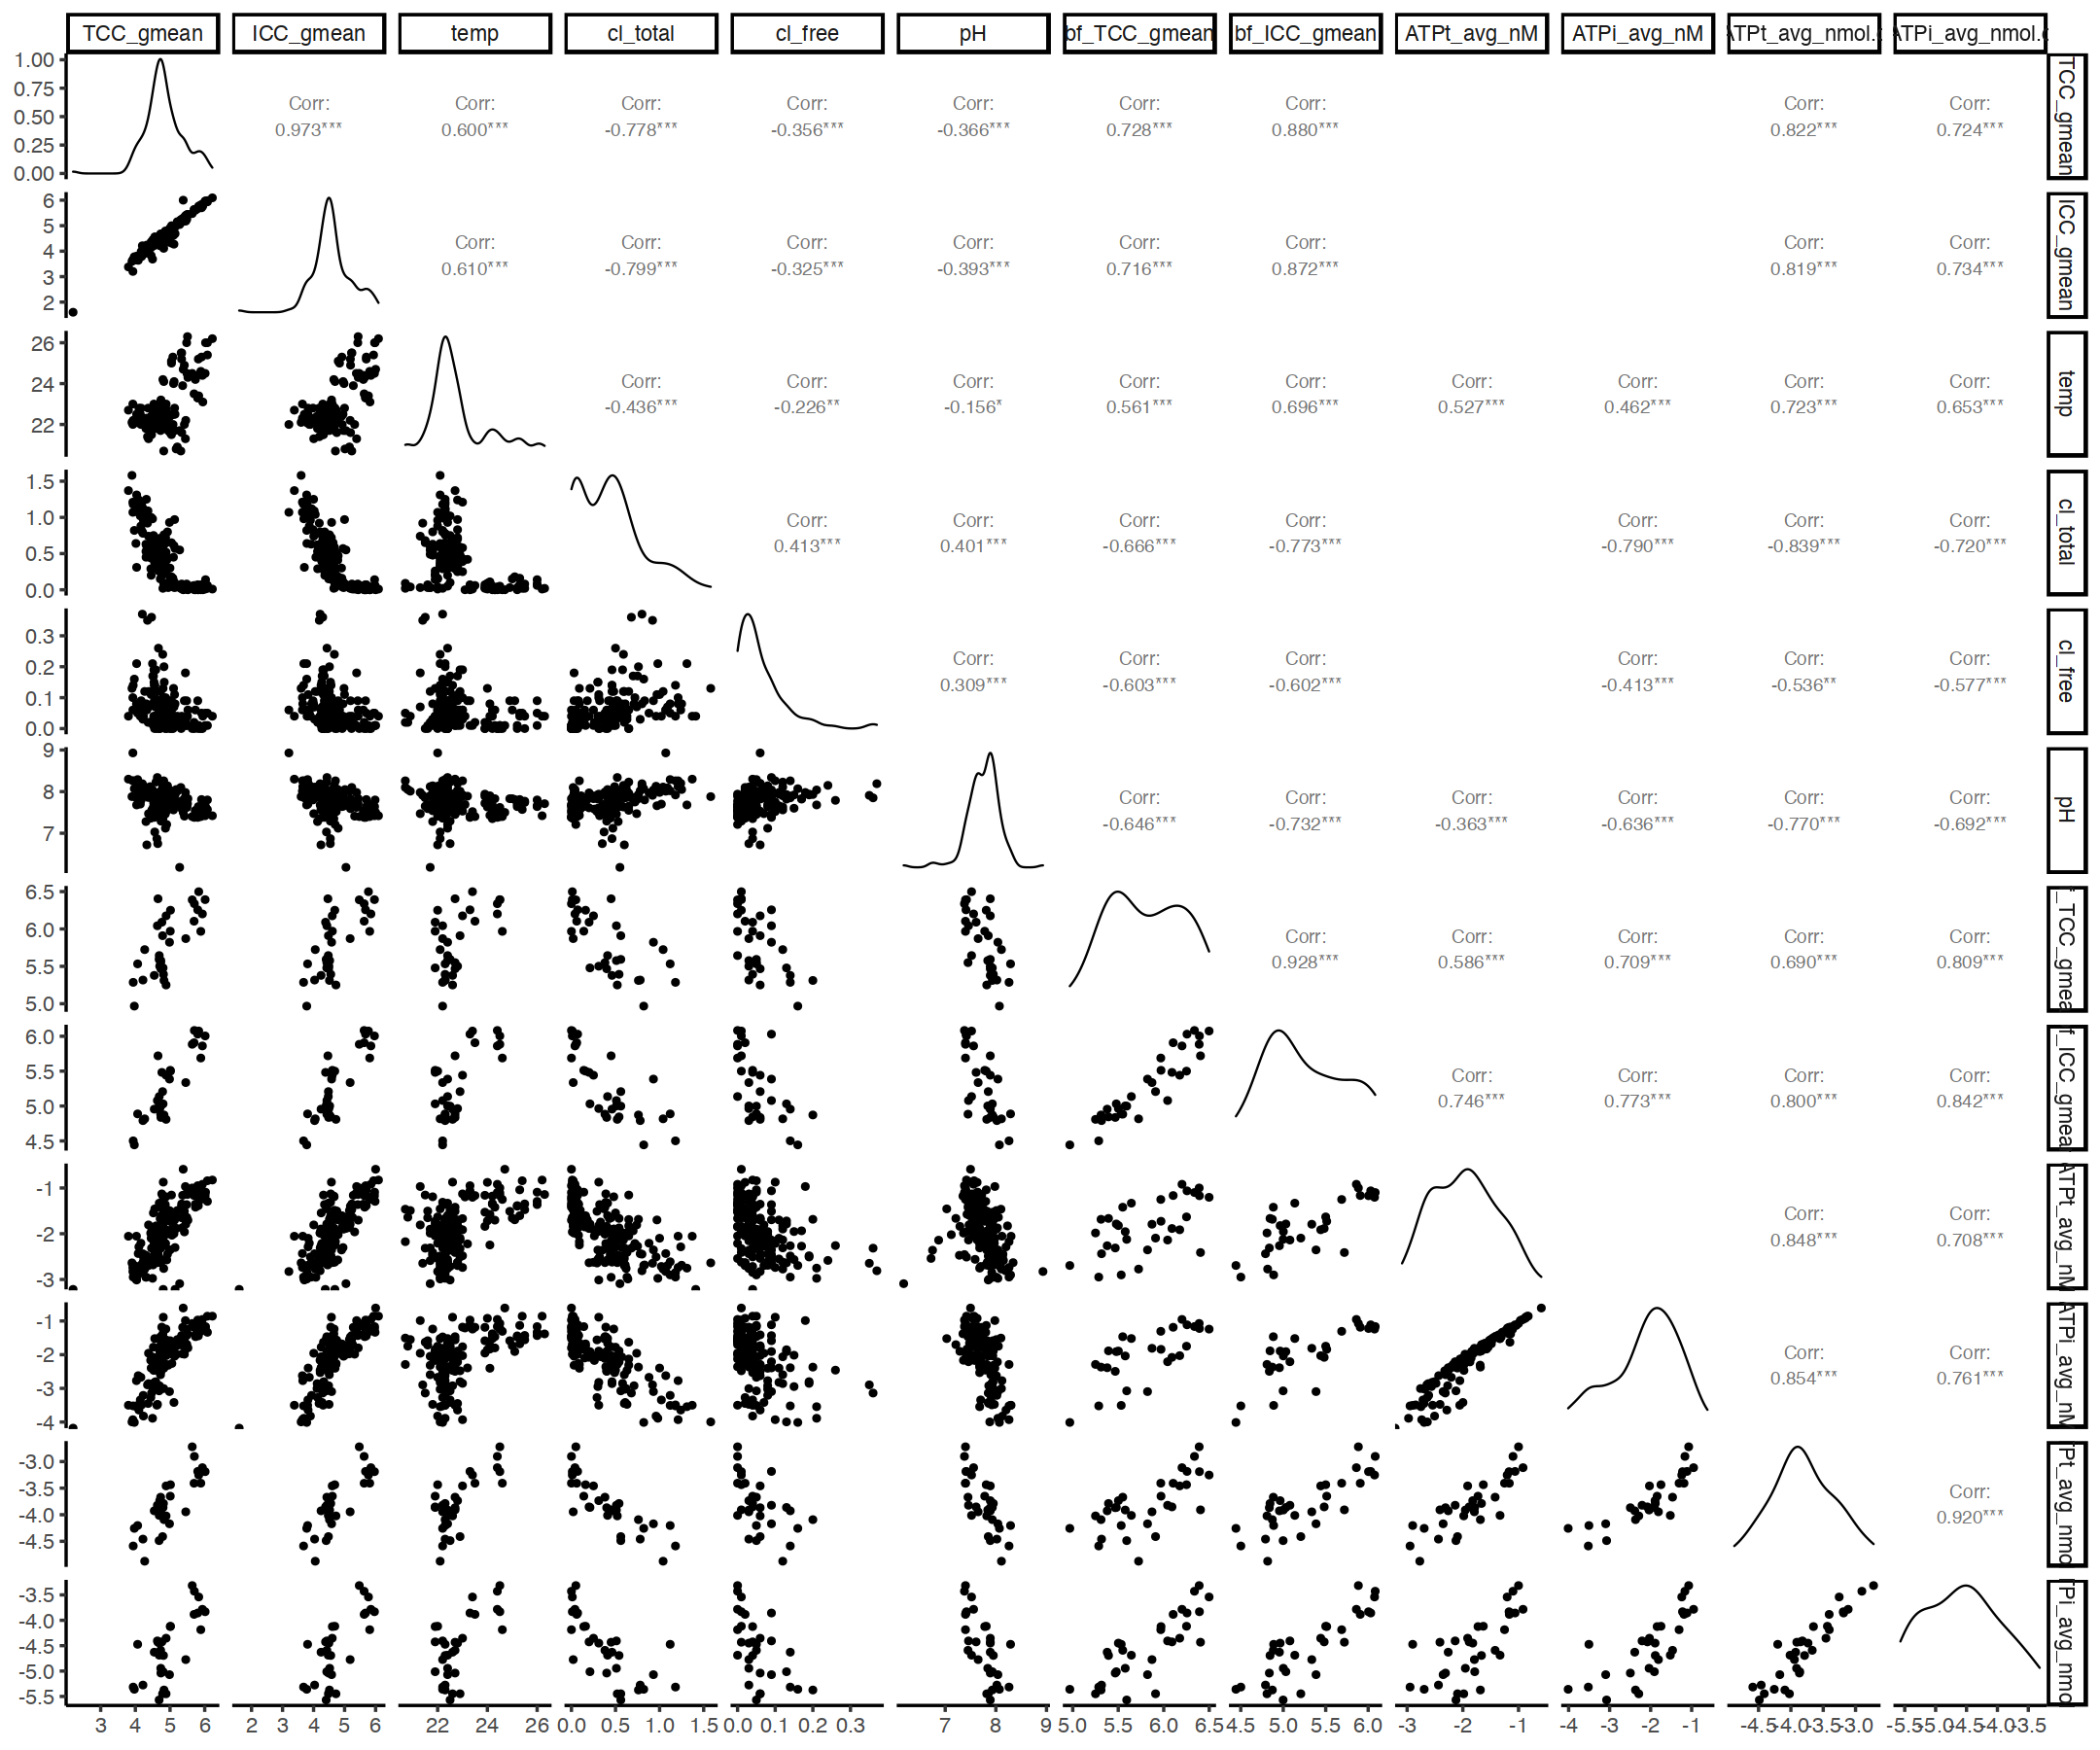

In [58]:
expl <- ar_vs_bf %>% select(c(TCC_gmean, ICC_gmean,temp, cl_total, cl_free, pH,bf_TCC_gmean, bf_ICC_gmean, ATPt_avg_nM, ATPi_avg_nM, bf_ATPt_avg_nmol.cm2,bf_ATPi_avg_nmol.cm2 ))
expl$TCC_gmean <- log10(expl$TCC_gmean)
expl$ICC_gmean <- log10(expl$ICC_gmean)
expl$bf_TCC_gmean <- log10(expl$bf_TCC_gmean)
expl$bf_ICC_gmean <- log10(expl$bf_ICC_gmean)
expl$ATPt_avg_nM <- log10(expl$ATPt_avg_nM)
expl$ATPi_avg_nM <- log10(expl$ATPi_avg_nM)
expl$bf_ATPt_avg_nmol.cm2 <- log10(expl$bf_ATPt_avg_nmol.cm2)
expl$bf_ATPi_avg_nmol.cm2 <- log10(expl$bf_ATPi_avg_nmol.cm2)

options(repr.plot.width = 18, repr.plot.height = 15)
ggpairs(expl)

Warning message in eval(expr, envir, enclos):
“NaNs produced”
Warning message in eval(expr, envir, enclos):
“NaNs produced”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 221 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 221 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 221 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 221 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 221 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 221 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 20

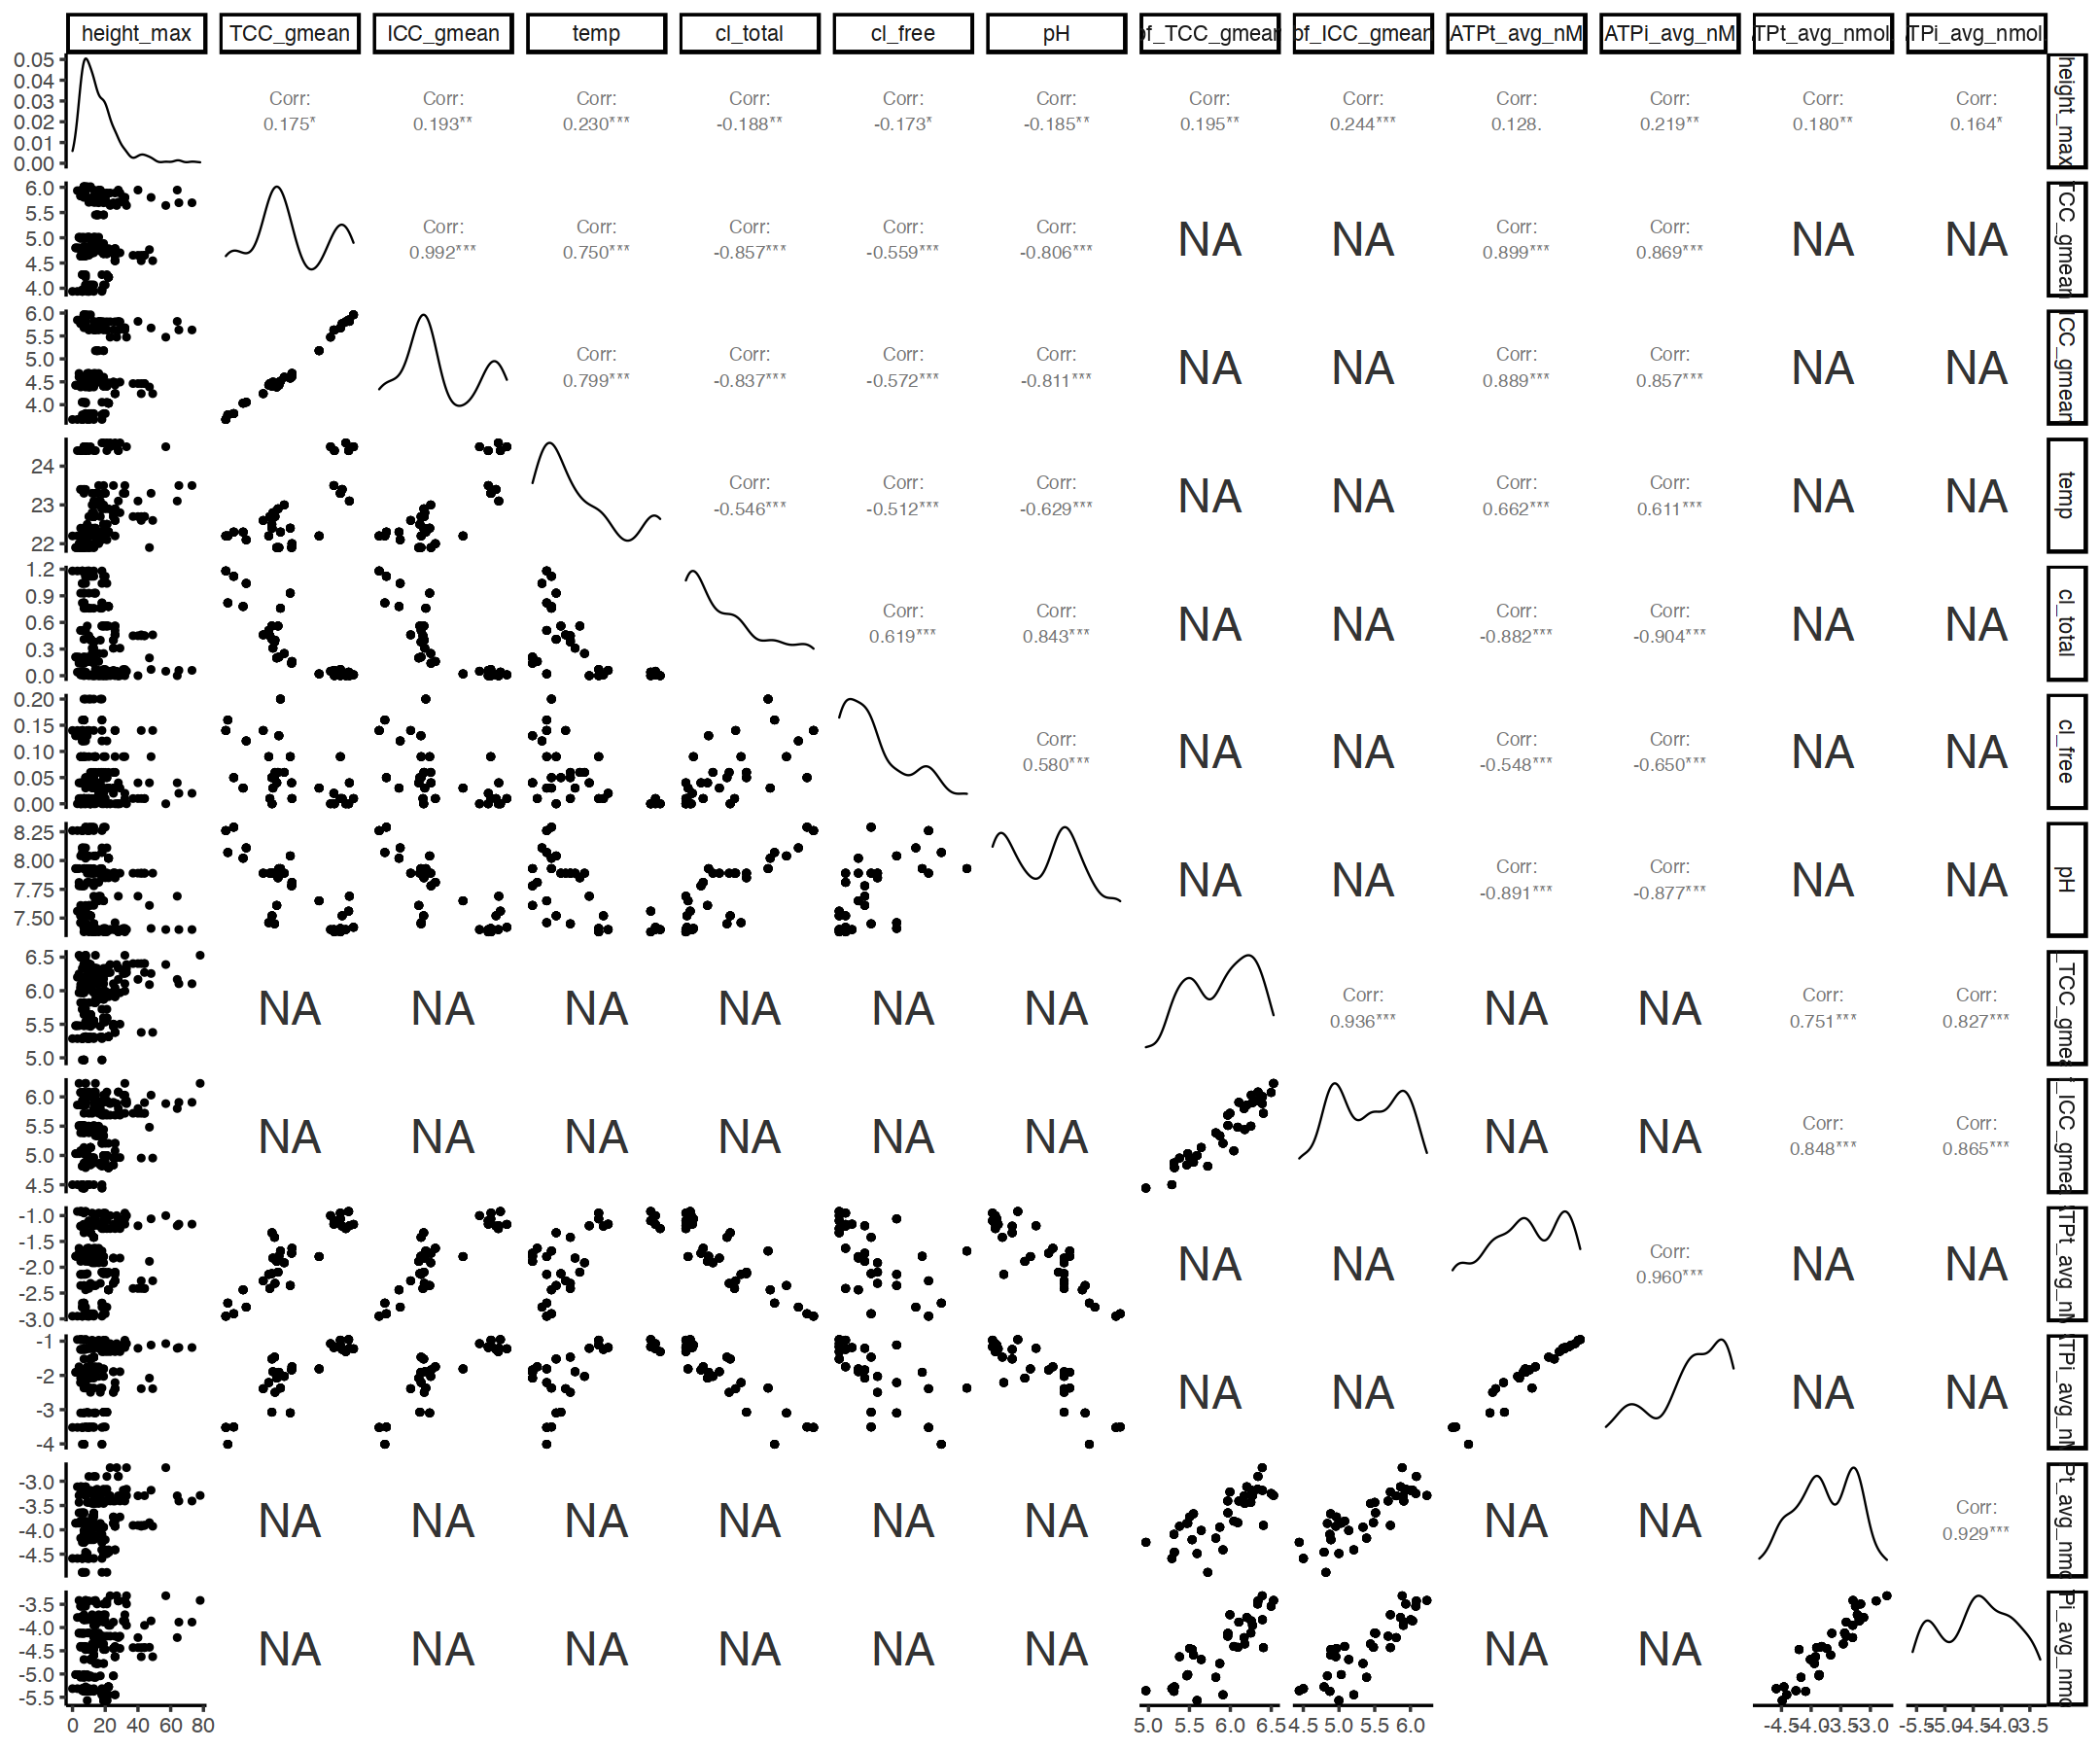

In [59]:
expl <- arbf_clsm_nocontrol %>% select(c(height_max, TCC_gmean, ICC_gmean,temp, cl_total, cl_free, pH,bf_TCC_gmean, bf_ICC_gmean, ATPt_avg_nM, ATPi_avg_nM, bf_ATPt_avg_nmol.cm2,bf_ATPi_avg_nmol.cm2 ))
expl$TCC_gmean <- log10(expl$TCC_gmean)
expl$ICC_gmean <- log10(expl$ICC_gmean)
expl$bf_TCC_gmean <- log10(expl$bf_TCC_gmean)
expl$bf_ICC_gmean <- log10(expl$bf_ICC_gmean)
expl$ATPt_avg_nM <- log10(expl$ATPt_avg_nM)
expl$ATPi_avg_nM <- log10(expl$ATPi_avg_nM)
expl$bf_ATPt_avg_nmol.cm2 <- log10(expl$bf_ATPt_avg_nmol.cm2)
expl$bf_ATPi_avg_nmol.cm2 <- log10(expl$bf_ATPi_avg_nmol.cm2)

options(repr.plot.width = 18, repr.plot.height = 15)
ggpairs(expl)

